In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import os, pickle
from pose_class import Trajectory
import pdb
import pandas as pd

import random
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import pearsonr,spearmanr
from scipy.stats import f_oneway,levene
from scipy.stats import ttest_ind

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')
print('ready set go!')

ready set go!


In [2]:
### My python environment was taking too long to solve, so lmer stats are done seperately
## I could probably put this together into a manuscript environment later....

## What this means is I need to save some pandas databases and run it in the other scripts


## Load Data

Data is a series of Sequence objects (generated by poseclass) and a bunch of playback data

In [3]:
## Load the hand annotated info on postures
test_3 = pd.read_csv('/data/birds/postures/presentation_info5.csv',delimiter=',')

song_list = ['BDY','BOD','ND','LB','2M','DBR','GRG','WG','LNR','DMG']
#song_list.extend(['BDY-','BOD-','LB-','DMG-']) ## Curtailed songs excluded for now
bird_list = ['CB-White','CB-Orange','CB-Yellow','CB-Red','CB-LB2','CB-Y2','CB-R2'] #2019 Birds
bird_list.extend(['P1','Y1','PINK2']) ## 2018 Birds
song_dict = dict(zip(song_list,range(10)))
bird_dict = dict(zip(bird_list,range(len(bird_list))))

duration_dict = {}
duration_list0 = []
latency_dict = {}
latency_list0 = []

seq_dir = './SeqClasses/'
bird_duration_dict = dict(zip(bird_list,[[] for x in range(len(bird_list))]))
bird_latency_dict = dict(zip(bird_list,[[] for x in range(len(bird_list))]))

for index,row in test_3.iterrows():
    if '2019' not in row['SeqName'] and '2018' not in row['SeqName']:
        print('skipping',row['SeqName'])
        continue 
    try:
        s = row['SeqName']
        seq = pickle.load(open(seq_dir + s + '.obj','rb'))
        bird = row['Bird']
    except:
        print(row['SeqName'],'is missing')
        s = row['SeqName']
        bird = row['Bird']
        seq = 0
    if bird not in bird_list:
        print('skipping all',bird)
        continue
    if row['Song'] not in song_list:
        song = row['SeqName'].split('_')[-1]
        if song in song_list:
            test_3.at[index,'Song'] = song
        else:
            continue
    else:
        song=row['Song']
    if not pd.isnull(row['PostureDuration']):
        if song not in duration_dict.keys():
            duration_dict[song] = []
        if row['PostureDuration'] == 'R':
            continue
        seq_duration = float(row['PostureDuration'])
        #test_3.at[index,'Duration by My Method'] = seq_duration
        duration_dict[song].append(seq_duration)
        duration_list0.append(seq_duration)
        bird_duration_dict[bird].append(seq_duration)
        
    ## If we have both latency and offset info, store it

    if not pd.isnull(row['PostureStamp']) and seq != 0:
        if song not in latency_dict.keys():
            latency_dict[song] = []
        seq_latency = float(row['PostureStamp']) + seq.ts[0]
        if seq.ts[0] == 0:
            #print('unknown offset...')
            #print(row['SeqName'])
            #print(seq_latency)
            seq_latency = np.nan
            continue
        test_3.at[index, 'Latency minus offset'] = seq_latency

        latency_dict[song].append(seq_latency)
        latency_list0.append(seq_latency)
        bird_latency_dict[bird].append(seq_latency)
                                       

skipping 2017_05_25_no_bird
skipping 2017-05-26-10-15-30
skipping 2017-05-30-15-57-34
skipping 2017-05-30-16-04-48
skipping 2017-05-31-09-52-19
skipping 2017-05-31-10-00-21
skipping 2017-05-31-11-39-51
skipping 2017-05-31-11-48-24
skipping 2017-05-31-11-57-48
skipping 2017-05-31-13-02-21
skipping 2017-05-31-13-05-59
skipping 2017-05-31-13-37-34
skipping 2017-05-31-13-40-42
skipping 2017-05-31-14-07-36
skipping 2017-05-31-14-45-50
skipping 2017-05-31-15-49-20
skipping 2017-05-31-17-03-16
skipping 2017-06-01-08-47-39
skipping 2017-06-01-08-55-11
skipping 2017-06-01-10-21-39
skipping 2017-06-01-11-17-22
skipping 2017-06-01-12-41-06
skipping 2017-06-01-13-48-11
skipping 2017-06-01-14-22-59
skipping 2017-06-01-14-54-44
skipping 2017-06-01-15-41-32
skipping 2017-06-01-17-04-28
skipping 2017-06-02-09-24-31
skipping 2017-06-02-09-41-24
skipping 2017-06-02-09-44-03
skipping 2017-06-02-09-52-08
skipping 2017-06-02-10-25-08
skipping 2017-06-02-10-56-17
skipping 2017-06-02-11-21-13
skipping 2017-0

2019-06-20-07-15-33_WG is missing
2019-06-20-08-45-23_DBR is missing
2019-06-20-10-15-23_BOD is missing
2019-06-20-11-45-23_BDY is missing
2019-06-20-13-15-23_LNR is missing
2019-07-02-11-05-18 is missing
skipping all males
2019-07-02-11-15-17 is missing
skipping all males
2019-07-02-11-47-06 is missing
skipping all males
2019-07-03-09-20-47 is missing
skipping all males
2019-07-03-09-55-34 is missing
skipping all males
2019-07-03-11-20-00 is missing
skipping all males
2019-07-03-15-16-10 is missing
skipping all males
2019-07-05-10-58-33 is missing
skipping all males
2019-07-09-14-18-33 is missing
skipping all males
2019-07-09-15-00-15 is missing
skipping all males
2019-07-10-14-31-28BDY_test is missing
skipping all males
2019-07-10-16-11-50DMG_test is missing
skipping all males
2019-05-18-17-36-18_CB0 is missing
skipping all no bird
2019-05-20-10-57-30_CB0 is missing
skipping all no bird
2019-05-20-11-09-34_CB0 is missing
skipping all no bird
2019-05-20-11-18-01_CB0 is missing
skippin

In [4]:
pd.unique(test_3['Posture'])

array([ 0.,  1.,  2., nan])

In [5]:
## Plot above peaks, probably don't need this either. 

partial_peaks = np.array(partial_peaks)
full_peaks = np.array(full_peaks)
partial_peaks = partial_peaks[~np.isnan(partial_peaks)]
full_peaks = full_peaks[~np.isnan(full_peaks)]
print(ttest_ind(partial_peaks,full_peaks))
fig,ax = plt.subplots()
ax.hist(partial_peaks,alpha=.7)
ax.hist(full_peaks,alpha=.5)
fig.show()

NameError: name 'partial_peaks' is not defined

In [8]:
## Define a little meta package for playback arrays

class Playback_meta():
    def __init__(self,n_birds,n_songs,n_blocks,bird_list,bird_dict,song_list,song_dict,name):
        self.n_birds = n_birds
        self.n_songs = n_songs
        self.n_blocks = n_blocks
        self.bird_list = bird_list
        self.bird_dict = bird_dict
        self.song_list = song_list
        self.song_dict = song_dict
        self.name = name
    
    def read_me(self):
        print('Reaout for group:',self.name)
        print('n_birds:',self.n_birds)
        print('n_songs:',self.n_songs)
        print('n_blocks:',self.n_blocks)
        print('birds:',self.bird_list)
        print('songs:',self.song_list)
 

In [9]:
print(bird_list)
print(bird_dict)

['CB-White', 'CB-Orange', 'CB-Yellow', 'CB-Red', 'CB-LB2', 'CB-Y2', 'CB-R2', 'P1', 'Y1', 'PINK2']
{'CB-White': 0, 'CB-Orange': 1, 'CB-Yellow': 2, 'CB-Red': 3, 'CB-LB2': 4, 'CB-Y2': 5, 'CB-R2': 6, 'P1': 7, 'Y1': 8, 'PINK2': 9}


In [10]:
## Import and process sequence data: [Bird, Block, Song, [Posture,Latency,Duration,Movement]]
## This also builds birdview_array

n_birds = len(bird_list)
data_array = np.empty([n_birds,20,10,4])
data_key = np.empty([n_birds,20,10,3],dtype=object)
data_array.fill(np.nan)

count = 0 
t_count = 0
p_count = 0
good_list = sorted(os.listdir('./SeqClasses/'))
crap_list = sorted(os.listdir('./CrapSeqs/'))


#file_list = sorted(os.listdir('./SeqClasses/'))
file_lists = [good_list,crap_list]
dir_list = ['./SeqClasses/','./CrapSeqs/']
for f in range(1):
    file_list = file_lists[f]
    seq_dir = dir_list[f]
    for s in file_list:

        seq = pickle.load(open(seq_dir + s,'rb'))
        if '2019' not in seq.seq_name and '2018' not in seq.seq_name:
            #print('still skipping 2018 for now')
            continue
        if seq.clean == False:
            print('**Dirty rotten floor posture, still going to try my best')
        try:
            block = seq.block
            if block > 19:
                print(block,seq.machine)
                print('block out of range,moving on')
                continue

        except:
            print(seq.seq_name,'has no block somehow...')
            import pdb
            pdb.set_trace()
        if block < 0:
            try: 
                manual_block = manual_row['Block'].item()
                if ~np.isnan(manual_block):
                    block = int(manual_block)
                    if block < 0:
                        print('negative block, moving on')
                        continue
                else:
                    print('negative block, moving on')
                    continue
            except:
                print('negative block, moving on')
                continue
        if seq.bird == 'Y1':
            print(seq.seq_name,seq.bird,seq.posture)
        if seq.bird=='no bird' or seq.bird=='males':
            continue
        if seq.bird=='unknown' or seq.song == 'unknown':
            continue
        try:
            if seq.bird == 'CB0':
                seq.bird = 'Y1'
            song_index = song_dict[seq.song]
            bird_index = bird_dict[seq.bird]
        except:
            print(seq.seq_name,'broke something! moving on',seq.song,seq.bird)
            continue
        try:
            manual_row = test_3[test_3['SeqName'] == seq.seq_name]
            manual_posture = manual_row['Posture'].item()
            #print(manual_posture)
            if not pd.isna(manual_posture):
                posture_value = int(manual_posture)
            else:
                posture_value = seq.posture
            data_array[bird_index,int(block),song_index,0] = posture_value
            print(seq.bird,seq.seq_name,bird_index,posture_value,'posture value stored')
        except:
            import pdb
            pdb.set_trace()
            print('posture failed for',seq.seq_name)

        try:
            data_key[bird_index,int(block),song_index,0] = seq.seq_name
            data_key[bird_index,int(block),song_index,1] = seq.machine
            data_key[bird_index,int(block),song_index,2] = 1 ## This means it doesn't suck
            if 'Crap' in seq_dir:
                data_key[bird_index,int(block),song_index,2] = 0  ## This means it sucks
        except:
            print("Something Failed!")

        try:
            if seq.ts[0] == 0:
                ## No timing data, grab a likely 5s 
                response_window = (seq.ts > 5) & (seq.ts < 10)
            else:
                response_window = (seq.ts > 0) & (seq.ts < 5)
            ## A bunch of them have a mismatch between ts and data. I need to fix this
            if len(response_window) != len(seq.data):
                #print('data mismatch :(')
                if len(response_window) > len(seq.data):
                    #print('fixing it...')
                    response_window = response_window[:len(seq.data)]
                elif len(response_window) < len(seq.data):
                    print('we are in trouble.')
                    pdb.set_trace()
            movement = np.sum(abs(seq.smooth_data[response_window]))
            data_array[bird_index,int(block),song_index,3] = movement
            #print('added posture')
            p_count +=1
        except:
            #pdb.set_trace()
            print('Movement failed...')
            movement = np.nan
            pass
        try:
            if seq.ts[0] != 0:
                manual_latency = manual_row['PostureStamp'].item() + seq.ts[0]
            else:
                manual_latency = np.nan
            manual_duration = manual_row['PostureDuration'].item()

            if not pd.isna(manual_latency):
                latency_value = float(manual_latency)
            else:
                latency_value = seq.t_vmax
            if not pd.isna(manual_duration):
                duration_value = float(manual_duration)
            else:
                duration_value = seq.duration
            t_count += 1
        except:
            print('no timing information for',seq.seq_name)
            latency_value = np.nan
            duration_value = np.nan
            

        data_array[bird_index,int(block),song_index] = [posture_value,latency_value,duration_value,movement]
            #print('Found a posture : ',seq.seq_name,seq.posture)
        if seq.seq_name == '2018-05-26-14-18-03':
            pass
            #pdb.set_trace()

birdview_array = data_array[:,:,:,:3]
birdview_meta = Playback_meta(data_array.shape[0],data_array.shape[2],data_array.shape[1],
                          bird_list,bird_dict,song_list,song_dict,'Birdview')
birdview_binary = np.copy(birdview_array)
print('unique values',np.unique(birdview_binary[:,:,:,0]))
birdview_binary[:,:,:,0][birdview_binary[:,:,:,0] == 2] = 0
print('binary values',np.unique(birdview_binary[:,:,:,0]))
print(p_count,t_count)    

## Split data array into two smaller arrays
bv2019_dict = {}
bv2018_dict = {}
for b in bird_list[:7]:
    bv2019_dict[b] = bird_dict[b]
for b in bird_list[7:]:
    bv2018_dict[b] = bird_dict[b] - 7
    
bv2019_array = data_array[:7,:,:,:3]
bv2019_meta = Playback_meta(bv2019_array.shape[0],bv2019_array.shape[2],bv2019_array.shape[1],
                          bird_list[:7],bv2019_dict,song_list,song_dict,'Birdview19')
bv2019_binary = birdview_binary[:7]

bv2018_array = data_array[7:,:,:,:3]
bv2018_meta = Playback_meta(bv2018_array.shape[0],bv2018_array.shape[2],bv2018_array.shape[1],
                          bird_list[7:],bv2018_dict,song_list,song_dict,'Birdview18')
bv2018_binary = birdview_binary[7:]

P1 2018-05-16-15-47-58 7 1 posture value stored
P1 2018-05-23-11-18-00 7 1 posture value stored
P1 2018-05-23-12-48-02 7 1 posture value stored
**Dirty rotten floor posture, still going to try my best
P1 2018-05-24-11-46-16 7 1 posture value stored
**Dirty rotten floor posture, still going to try my best
P1 2018-05-24-15-48-01 7 1 posture value stored
no timing information for 2018-05-24-15-48-01
P1 2018-05-26-08-17-58 7 1 posture value stored
**Dirty rotten floor posture, still going to try my best
P1 2018-05-26-14-18-03 7 1 posture value stored
P1 2018-05-28-08-18-02 7 1 posture value stored
P1 2018-05-28-14-18-02 7 0 posture value stored
no timing information for 2018-05-28-14-18-02
**Dirty rotten floor posture, still going to try my best
2018-05-29-17-17-56 Y1 1.0
Y1 2018-05-29-17-17-56 8 1 posture value stored
2018-05-30-06-47-56 Y1 1.0
2018-05-30-06-47-56 broke something! moving on LB- Y1
2018-05-30-08-17-56 Y1 1.0
Y1 2018-05-30-08-17-56 8 1 posture value stored
2018-05-30-09-47-

23.0 birdview
block out of range,moving on
2018-06-20-06-46-29 broke something! moving on DMG WH2
23.0 birdview
block out of range,moving on
2018-06-20-08-16-32 broke something! moving on BOD WH2
23.0 birdview
block out of range,moving on
2018-06-20-09-46-52 broke something! moving on BDY WH2
23.0 birdview
block out of range,moving on
2018-06-20-11-16-52 broke something! moving on BOD WH2
23.0 birdview
block out of range,moving on
2018-06-20-12-46-32 broke something! moving on LB WH2
**Dirty rotten floor posture, still going to try my best
24.0 birdview
block out of range,moving on
2018-06-20-14-16-33 broke something! moving on DMG WH2
24.0 birdview
block out of range,moving on
2018-06-20-15-46-30 broke something! moving on BDY- WH2
24.0 birdview
block out of range,moving on
2018-06-20-17-16-51 broke something! moving on LB- WH2
**Dirty rotten floor posture, still going to try my best
24.0 birdview
block out of range,moving on
2018-06-21-06-46-32 broke something! moving on LB WH2
**Dir

no timing information for 2019-05-29-07-08-15_GRG
CB-Red 2019-05-29-08-38-24_2M 3 0 posture value stored
no timing information for 2019-05-29-08-38-24_2M
CB-Red 2019-05-29-10-08-58_LB 3 0 posture value stored
no timing information for 2019-05-29-10-08-58_LB
CB-Red 2019-05-29-11-39-56_WG 3 0 posture value stored
no timing information for 2019-05-29-11-39-56_WG
CB-Red 2019-05-29-13-17-43_DMG 3 0 posture value stored
no timing information for 2019-05-29-13-17-43_DMG
CB-Red 2019-05-29-15-47-42_LNR 3 0 posture value stored
no timing information for 2019-05-29-15-47-42_LNR
CB-Red 2019-05-29-17-07-51_BDY 3 2 posture value stored
CB-Red 2019-05-29-18-37-53_BOD 3 0 posture value stored
no timing information for 2019-05-29-18-37-53_BOD
CB-Yellow 2019-05-30-07-07-56_GRG 2 1 posture value stored
CB-Yellow 2019-05-30-08-34-17_BOD 2 1 posture value stored
CB-Yellow 2019-05-30-10-02-55_BDY 2 1 posture value stored
CB-Yellow 2019-05-30-11-32-53_LNR 2 1 posture value stored
CB-Yellow 2019-05-30-13-04-1

CB-LB2 2019-06-10-10-16-11_GRG 4 2 posture value stored
no timing information for 2019-06-10-10-16-11_GRG
CB-Yellow 2019-06-10-11-33-10_LB 2 0 posture value stored
no timing information for 2019-06-10-11-33-10_LB
CB-LB2 2019-06-10-11-46-12_ND 4 1 posture value stored
CB-Yellow 2019-06-10-13-02-52_DBR 2 0 posture value stored
no timing information for 2019-06-10-13-02-52_DBR
**Dirty rotten floor posture, still going to try my best
CB-LB2 2019-06-10-13-16-12_LNR 4 1 posture value stored
no timing information for 2019-06-10-13-16-12_LNR
CB-Yellow 2019-06-10-15-41-10_ND 2 0 posture value stored
no timing information for 2019-06-10-15-41-10_ND
CB-LB2 2019-06-10-15-46-15_DMG 4 2 posture value stored
CB-Yellow 2019-06-10-17-10-25_LB 2 0 posture value stored
no timing information for 2019-06-10-17-10-25_LB
CB-LB2 2019-06-10-17-16-15_LB 4 0 posture value stored
no timing information for 2019-06-10-17-16-15_LB
CB-Yellow 2019-06-10-18-33-28_LNR 2 0 posture value stored
no timing information for 2

CB-Y2 2019-06-19-15-46-14_BOD 5 1 posture value stored
CB-Orange 2019-06-19-17-05-00_BOD 1 0 posture value stored
no timing information for 2019-06-19-17-05-00_BOD
CB-Y2 2019-06-19-17-16-15_LNR 5 1 posture value stored
CB-Orange 2019-06-19-18-42-43_LNR 1 0 posture value stored
no timing information for 2019-06-19-18-42-43_LNR
CB-Y2 2019-06-19-18-46-15_2M 5 1 posture value stored
CB-Orange 2019-06-20-07-04-33_2M 1 1 posture value stored
CB-Orange 2019-06-20-08-33-01_WG 1 1 posture value stored
CB-Orange 2019-06-20-10-04-11_DBR 1 1 posture value stored
CB-Orange 2019-06-20-11-33-23_BOD 1 1 posture value stored
CB-Orange 2019-06-20-13-03-04_BDY 1 1 posture value stored
CB-Y2 2019-06-20-13-45-53_GRG 5 0 posture value stored
CB-Orange 2019-06-20-15-32-52_LNR 1 2 posture value stored
CB-Y2 2019-06-20-15-46-13_2M 5 0 posture value stored
CB-Orange 2019-06-20-17-07-04_GRG 1 0 posture value stored
CB-Y2 2019-06-20-17-16-14_ND 5 0 posture value stored
no timing information for 2019-06-20-17-16-1

CB-Orange 2019-06-28-08-33-40_BDY 1 1 posture value stored
CB-Y2 2019-06-28-08-46-13_DBR 5 2 posture value stored
CB-Orange 2019-06-28-10-05-33_2M 1 1 posture value stored
CB-Y2 2019-06-28-10-16-13_LNR 5 0 posture value stored
CB-Orange 2019-06-28-11-33-12_DBR 1 1 posture value stored
**Dirty rotten floor posture, still going to try my best
CB-Y2 2019-06-28-11-46-14_WG 5 1 posture value stored
CB-Orange 2019-06-28-13-03-15_LNR 1 0 posture value stored
CB-Y2 2019-06-28-13-16-24_ND 5 1 posture value stored
CB-Orange 2019-06-28-15-33-13_WG 1 0 posture value stored
CB-Y2 2019-06-28-15-46-13_LB 5 0 posture value stored
no timing information for 2019-06-28-15-46-13_LB
CB-Orange 2019-06-28-17-03-15_ND 1 0 posture value stored
CB-Y2 2019-06-28-17-16-16_DBR 5 0 posture value stored
no timing information for 2019-06-28-17-16-16_DBR
CB-Orange 2019-06-28-18-33-25_LB 1 0 posture value stored
CB-Y2 2019-06-28-18-46-14_ND 5 1 posture value stored
CB-Orange 2019-06-29-07-03-05_DBR 1 1 posture value st

In [11]:
print(np.nansum(bv2018_array[0,:,:,0]))
print(np.nansum(bv2018_array[1,:,:,0]))
print(np.nansum(bv2018_binary[1,:,:,0]))
print(np.nansum(bv2018_array[2,:,:,0]))
print(bv2018_meta.bird_list)


8.0
46.0
40.0
27.0
['P1', 'Y1', 'PINK2']


BOD 0.9239999294281006
BOD nan
BDY 0.9499999160766599
BDY 1.0809997196197516
BDY 3.549999820709229
LB- 0.3059999103546147
BDY 0.16399989128112757
BDY- 0.13900003433227504
DMG 0.727000045776367
LB 0.44199986457824725
LB- 0.4499999771118164
BOD 0.3339999790191648
BDY- 0.47099988746643096
DMG 0.4280000686645504
BDY 0.4260001831054687
LB 0.3689998741149907
BDY- 0.1290000095367425
BOD 0.29799995422363246
LB- 0.43500022888183576
LB 0.5030002117156984
DMG 0.374000078201294
BDY 0.5850000381469727
LB- 0.22900006675720164
BDY 0.10600013160705579
DMG 0.35299998474121175
BDY- 0.37199997901916504
DMG 1.7110001087188724
BOD 0.25299979400634776
BDY 0.18799983215332006
LB- 0.49800009727478045
LB 0.2669998645782474
BDY- 0.43200001716613734
BOD 0.44500017166137695
BDY 0.2879998207092287
DMG 0.7129999752044673
BDY- 0.7410002231597899
LB 0.2829999561309813
BDY 0.4629997730255129
BOD 0.4899999618530275
LB 0.7249998683929446
DMG 0.37500021362304636
LB- 0.6290001506805423
BDY- 0.43799993896484324
LB- 0.51200

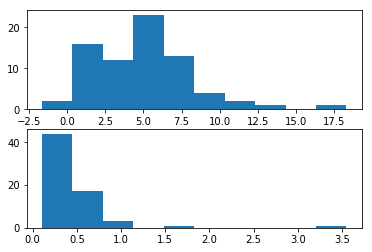

In [12]:
### Check the new latencies from 2018, don't need this I don't think

durations_new,latencies_new = [],[]
for s in sorted(os.listdir('./SeqClasses/')):

    seq = pickle.load(open(seq_dir + s,'rb'))
    if '2018' not in seq.seq_name or not seq.clean:
        #print('still skipping 2018 for now')
        continue
    if seq.machine != 'birdview':
        continue
    if seq.ts[0] != 0 and seq.posture == 1:
        #print(seq.duration,seq.t_vmax[0])
        durations_new.append(seq.duration)
        #latencies_new.append(seq.t_vmax[0])
        true_latency = (test_3[test_3['SeqName'] == seq.seq_name]['PostureStamp'] + seq.ts[0])
        try:
            print(seq.song,true_latency.item())
            if not np.isnan(true_latency.item()):
                
                latencies_new.append(true_latency.item())
        except:
            print(seq.seq_name,'failed')
            pass
fig,(ax,ax1) = plt.subplots(2)

ax.hist(durations_new)
ax1.hist(latencies_new)

fig.show()

In [13]:
## Reshape Birdview 3 data into similar array
## What if I drop the lesioned birds? 

group1_file = '/data/birds/postures/2019_playbacks_1.csv'
group2_file = '/data/birds/postures/2019_playbacks_2.csv'

group1_df = pd.read_csv(group1_file)
group2_df = pd.read_csv(group2_file)

group1_df = group1_df.fillna(0)
group2_df = group2_df.fillna(0)

p_array1 = np.array(group1_df.iloc[:,6:15])
p_array2 = np.array(group2_df.iloc[:,6:15])

group1_list = list(group1_df.columns[6:15])
group2_list = list(group2_df.columns[6:15])
bird_list3 = []
bird_list3.extend(group1_list)
bird_list3.extend(group2_list)

print(bird_list3)
## [Bird, Block, Song, [Posture,Latency,Duration]]
bv3_array = np.empty([18,11,10,3])
bv3_array.fill(np.nan)

group1_dates = group1_df
# for each song
for s in range(10):
    song_name = song_list[s] + '.wav'
    #print(s,song_name)
    bv3_array[:9,:,s,0] = np.transpose(group1_df.loc[group1_df['SongFile'] == song_name].iloc[:,6:15])
    bv3_array[9:,:,s,0] = np.transpose(group2_df.loc[group2_df['SongFile'] == song_name].iloc[:,6:15])

sham_birds = [0,3,5,6,10,12,14,16]   
sham_list = [bird_list3[i] for i in sham_birds]

binary_array3 = np.array(bv3_array)
binary_array3[binary_array3 == .5] = 0

## Remove lesioned birds
if True:
    bv3_array = bv3_array[sham_birds]
    bird_list3 = sham_list
    binary_array3 = binary_array3[sham_birds]
    
bv3_array[:,:,:,0][bv3_array[:,:,:,0] == .5] = 2

bv3_meta = Playback_meta(len(bird_list3),10,11,bird_list3,dict(zip(bird_list3,range(len(bird_list3)))),song_list,song_dict,'Birdracks')
print(np.shape(binary_array3))

['WH20', 'WH18', 'WH13', 'Wh14', 'WH17', 'GR11', 'WH15', 'WH23', 'WH12 (22)', 'BK24', 'WH19', 'WH16', 'WH24', 'BK21', 'LB20', 'BK17', 'GR13', 'WH22']
(8, 11, 10, 3)


In [14]:
## Deal with David's playback data: dave_array07,meta_d07 

skips = 0
def parse_dave_data(playback_df,name='?',plot_me=False,sort_me=True,add_song = 0):
    song_list = pd.unique(playback_df[3])
    bird_list = pd.unique(playback_df[4])
    n_songs = len(song_list)
    if add_song is not 0:
        n_songs = n_songs + add_song
        song_list = np.append(song_list,'?')
    n_birds = len(bird_list)
    last_block = np.max(pd.unique(playback_df[0]))
    n_blocks = (last_block + n_songs - 1) // n_songs +1
    song_dict = dict(zip(song_list,range(n_songs)))
    bird_dict = dict(zip(bird_list,range(n_birds)))

    playback_array = np.zeros([n_birds,n_blocks,n_songs,3])

    for i,row in playback_df.iterrows():
        bird_index = bird_dict[row[4]]
        song_index = song_dict[row[3]]
        block_index = (row[0] - 1) // n_songs
        if playback_array[bird_index,block_index,song_index,0] != 0:
            #print(playback_array[bird_index,song_index,block_index],(bird_index,song_index,block_index))
            #print('I already did this one!',row[0])
            global skips
            skips += 1 

        if row[5].upper() == 'R':
            playback_array[bird_index,block_index,song_index,0] = 2 # label as partial
            playback_array[bird_index,block_index,song_index,2] = 0 # remove old durations
            
        else:
            playback_array[bird_index,block_index,song_index,0] = 1 # label as posture
            playback_array[bird_index,block_index,song_index,2] = int(row[5]) #set duration


  
    reorder = np.argsort(np.mean(playback_array[:,:,:,0],axis=(0,2)))[::-1]
    if sort_me:
        playback_array = playback_array[:,reorder]
    
    if plot_me:
        fig,ax = plt.subplots()
        ax.imshow(np.mean(playback_array[:,:,:,0],0),cmap='viridis',vmax=1)
        ax.set_xlabel('Blocks')
        ax.set_ylabel('Song id')
        fig.show()
    meta_data = Playback_meta(n_birds,n_songs,n_blocks,bird_list,bird_dict,song_list,song_dict,name)
    return playback_array,meta_data

playbacks07 = './DavidPlaybacks/PB2007.txt'
playbacks09 = './DavidPlaybacks/PB2009.txt'
playbacks10 = './DavidPlaybacks/PB2010.txt'
playbacks11 = './DavidPlaybacks/PB2011.txt'

dave_df07 = pd.read_csv(playbacks07,delimiter=',',header=None)
dave_df09 = pd.read_csv(playbacks09,delimiter=',',header=None)
dave_df10 = pd.read_csv(playbacks10,delimiter=',',header=None)
dave_df11 = pd.read_csv(playbacks11,delimiter=',',header=None)

dave_array07,meta_d07 = parse_dave_data(dave_df07,name='Dave_07',plot_me=False)
dave_array09,meta_d09 = parse_dave_data(dave_df09,name='Dave_09',plot_me=False)
dave_array10,meta_d10 = parse_dave_data(dave_df10,name='Dave_10',plot_me=False)
dave_array11,meta_d11 = parse_dave_data(dave_df11,name='Dave_11',plot_me=False)
print('total skips=',skips)

daviaries = [dave_array07,dave_array09,dave_array10,dave_array11]
dmetas = [meta_d07,meta_d09,meta_d10,meta_d11]

all_aviaries = [bv2018_array,bv2019_array,bv3_array,dave_array07,dave_array09,dave_array10,dave_array11]
all_metas = [bv2018_meta,bv2019_meta,bv3_meta, meta_d07,meta_d09,meta_d10,meta_d11]

all_binary = []

## For some reason, doing np.array(a) here breaks everything...
for a in all_aviaries:
    binary_a = np.copy(a)
    binary_a[:,:,:,0][binary_a[:,:,:,0] == 2] = 0
    all_binary.append(binary_a)

total skips= 24


In [15]:
print(np.unique(bv3_array[:,:,:,0]))
print(np.unique(all_aviaries[2][:,:,:,0]))


[0. 1. 2.]
[0. 1. 2.]


In [16]:
## Load in hand labeled latencies from spread sheet 
# I decided calculating poo latency was too much work for now, but if I ever do it, the framework is here
test_3.infer_objects()
bird_list = birdview_meta.bird_list
song_list = birdview_meta.song_list
bird_dict = birdview_meta.bird_dict
song_dict = birdview_meta.song_dict
startle_latencies = []
look_latencies = []
depuff_latencies = []
depuff_birds,depuff_songs = [],[]
wingstroke_latencies = []
wingstroke_birds,wingstroke_songs = [],[]
leg_latencies = []
poo_latencies = []
csd_latencies,csd_offsets = [],[]
partial_latencies,partial_offsets = [],[]
s_count,d_count,w_count,c_count,p_count,l_count,g_count,o_count,poo_count = 0,0,0,0,0,0,0,0,0
total_count,other_count = 0,0
chi_counts = {
    'CSD/WS':0,
    'CSD/DP':0,
    'WS/DP':0,
    'PSD/WS':0,
    'PSD/DP':0
}

bird_count_dict = dict(zip(bird_list,[[0,0,0,0,0,0,0,0,0,0] for f in bird_list]))

key_behaviors = ['Depuff','Wingstroke','CSD','Partial CSD']
## Build an array to get song rates for any behavior of interest
bird_song_counts = np.zeros([len(key_behaviors),len(bird_list),len(song_list),2])
## Big hard coded loop to parse values

old_df = pd.read_csv('./data_dir/presentation_info3.csv')
#old_df.infer_objects()

for i,row in test_3.iterrows():
    if '2019' not in row['SeqName']:# and '2018' not in row['SeqName']:
        continue
    ## Need the seq for offset, if it doesn't exist just count it but no time
    try:
        seq = pickle.load(open('./SeqClasses/' + row['SeqName'] + '.obj','rb'))
        if seq.ts[0] == 0:
            TIME = False
        else:
            TIME = True
    except:
        TIME = False
        ## This also means you can't use seqs. Duh.
    ## Need a good offset, if that doesn't exist, count it, but no time
    old_row = old_df[old_df['SeqName'] == row['SeqName']]
    
    notes = str(row['Notes']).lower()
    response = False
    bird_name = row['Bird']
    song = row['Song']
    if bird_name not in bird_list:
        continue
    if song not in song_list:
        continue
    f = bird_dict[bird_name]
    s = song_dict[song]

    if 'startle' in notes:
        response=True
        s_count += 1
        bird_count_dict[bird_name][6] += 1
    if 'look' in notes:
        response=True
        l_count += 1
        bird_count_dict[bird_name][2] += 1
    if 'depress' in notes:
        if 'wingstroke' in notes:
            chi_counts['WS/DP'] += 1
        response=True
        d_count += 1
        bird_count_dict[bird_name][5] += 1
        bird_song_counts[0,f,s,0] += 1
        if TIME: 
            depuff_latencies.append(row['PuffStamp'] + seq.ts[0])
            depuff_birds.append(bird_name)
            depuff_songs.append(song)
    if 'leg' in notes:
        response=True
        g_count += 1
        bird_count_dict[bird_name][4] += 1
    if 'wingstroke' in notes:
        response=True
        w_count += 1
        bird_count_dict[bird_name][3] += 1
        bird_song_counts[1,f,s,0] += 1
        if TIME: 
            #pdb.set_trace()
            wingstroke_latencies.append(row['WingStamp'] + seq.ts[0])
            wingstroke_birds.append(bird_name)
            wingstroke_songs.append(song)
    if 'poop' in notes:
        response=True
        poo_count += 1
        bird_count_dict[bird_name][7] += 1
    if not pd.isnull(row['Posture']) and int(row['Posture']) == 1:
        if 'wingstroke' in notes:
            chi_counts['CSD/WS'] += 1
        if 'depress' in notes:
            chi_counts['CSD/DP'] += 1
        response=True
        c_count += 1
        bird_count_dict[bird_name][0] += 1
        bird_song_counts[2,f,s,0] += 1
        if TIME:
            #csd_latencies.append(row['PostureStamp'] + seq.ts[0])
            #csd_offsets.append(row['PostureStamp'] + seq.ts[0] + row['PostureDuration'])
            csd_latencies.append(old_row['Latency by Eye Frame'].item() + seq.ts[0])

            csd_offsets.append(old_row['Latency by Eye Frame'].item() + seq.ts[0] + float(old_row['Duration by eye'].item()))
            if csd_latencies[-1] < 0:
                pass
                #pdb.set_trace()
    if not pd.isnull(row['Posture']) and int(row['Posture']) == 2:
        if 'wingstroke' in notes:
            chi_counts['PSD/WS'] += 1
        if 'depress' in notes:
            chi_counts['PSD/DP'] += 1
        response=True
        p_count += 1
        bird_count_dict[bird_name][1] += 1
        bird_song_counts[3,f,s,0] += 1
        if TIME:
            #partial_latencies.append(row['PartialStamp'] + seq.ts[0])
            #partial_offsets.append(row['PartialStamp'] + seq.ts[0] + row['PartialDuration'])
            partial_latencies.append(old_row['Latency by Eye Frame'].item() + seq.ts[0])
            partial_offsets.append(old_row['Latency by Eye Frame'].item() + seq.ts[0] + float(old_row['Duration by eye'].item()))

    if not response:
        other_count +=1
        bird_count_dict[bird_name][8] += 1
    if 'missing' not in notes:
        bird_song_counts[:,f,s,1] += 1
        total_count +=1

all_counts = [s_count,d_count,w_count,c_count,p_count,l_count,g_count,o_count,poo_count]
all_latencies = [startle_latencies,depuff_latencies,wingstroke_latencies,csd_latencies,partial_latencies,
              look_latencies,leg_latencies,[np.nan],poo_latencies]

all_labels = ['Startle','Depuff','Wingstroke','CSD','Partial-CSD','Look Around','Leg Adjustment',
              'Other/None','Poop']
count_dict = dict(zip(all_labels,all_counts))
latency_dict = dict(zip(all_labels,all_latencies))

# Figures Start here!

### Figure 8:
What other behaviors do females produce in response to song? 

45
Depuff : 36 36 0.13652777300940627 0.022360456114114493 47 0.08918406072106262
36
Wingstroke : 30 30 0.0059666748682657795 0.15948428686481833 41 0.0777988614800759
161
CSD : 159 159 0.7424339652031472 0.015190155885364803 179 0.3396584440227704
45
Partial-CSD : 40 40 1.0433249883651734 0.03693903657947957 50 0.09487666034155598
527
Startle 16 0.030360531309297913
Depuff 47 0.08918406072106262
Wingstroke 41 0.0777988614800759
CSD 179 0.3396584440227704
Partial-CSD 50 0.09487666034155598
Look Around 38 0.07210626185958255
Leg Adjustment 26 0.04933586337760911
Other/None 0 0.0
Poop 3 0.0056925996204933585


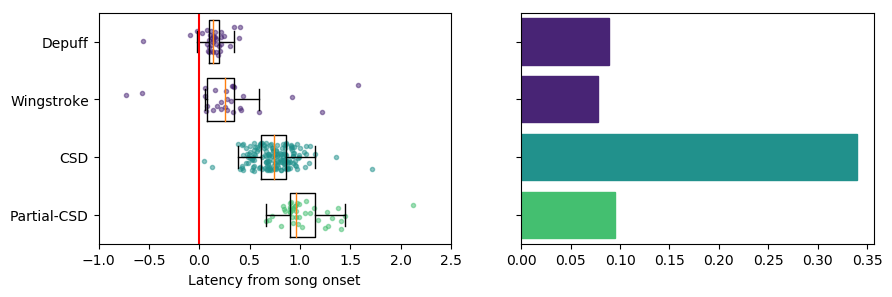

In [18]:
## Plot Figure 8a using above values
plt.style.use('default')
fig,(ax,ax1) = plt.subplots(1,2,sharey=True)
paper_cmap = cm.viridis
good_labels = ['Depuff','Wingstroke','CSD','Partial-CSD']
color_values = [.1,.1,.5,.7]
group_colors = [paper_cmap(c) for c in color_values]
for l in range(len(good_labels)):
    label = good_labels[l]
    xs = np.array(latency_dict[label])
    print(len(xs))
    xs = xs[~np.isnan(xs)]
    ys = [len(good_labels) - l] * len(xs)
    jitter = np.random.rand(len(xs)) - .5 
    ys = np.array(ys) + jitter * .5
    ax.scatter(xs,ys,alpha=.5,marker='.',color=group_colors[l])
    ax.boxplot(xs,positions=[len(good_labels) - l],vert=False,showfliers=False,widths=[.75])
    print(label,':',len(xs),np.sum(~np.isnan(xs)),np.nanmean(xs),np.nanstd(xs) / np.sqrt(count_dict[label]),count_dict[label],count_dict[label] / total_count)
ax.axvline(0,color='red')
ax.set_yticks(range(1,len(good_labels)+1))
ax.set_yticklabels(good_labels[::-1])

ax.set_xlabel('Latency from song onset')
ax.set_xlim([-1,2.5])
ax.set_ylim([0.5,4.5])

print(total_count)
bars = ax1.barh([1,2,3,4],[count_dict[l] / total_count for l in good_labels[::-1]])
for b in range(len(bars)):
    bars[b].set_color(group_colors[::-1][b])
#ax1.set_xlim([0,1])
fig.set_size_inches(10,3)
fig.show()

for k in count_dict.keys():
    print(k,count_dict[k],count_dict[k]/total_count)
    
    
    

In [23]:
print('Wingstrokes:')
ws_latency_array = np.array(latency_dict['Wingstroke'])
ws_bird_array = np.array(wingstroke_birds)
ws_bird_array = ws_bird_array[~np.isnan(ws_latency_array)]
ws_latency_array = ws_latency_array[~np.isnan(ws_latency_array)]

dp_latency_array = np.array(latency_dict['Depuff'])
dp_bird_array = np.array(depuff_birds)
dp_bird_array = dp_bird_array[~np.isnan(dp_latency_array)]
dp_latency_array = dp_latency_array[~np.isnan(dp_latency_array)]

pre_counts,post_counts = [],[]

for b in np.unique(ws_bird_array):
    ws_latency_bird = ws_latency_array[ws_bird_array == b]
    pre_counts.append(np.sum((ws_latency_bird <= 0) & (ws_latency_bird >-1)))
    post_counts.append(np.sum((ws_latency_bird > 0) & (ws_latency_bird < 1)))

print(ws_latency_array)
print('Mean,std:',np.mean(ws_latency_array[ws_latency_array>0]),np.std(ws_latency_array[ws_latency_array>0]))
print('SEM:',np.std(ws_latency_array[ws_latency_array>0] / np.sqrt(np.sum(ws_latency_array>0))))
print(ttest_ind(pre_counts,post_counts))
print(pre_counts,post_counts)
print(np.sum(np.array(latency_dict['Wingstroke'])<=0))
print(np.sum(~np.isnan(np.array(latency_dict['Wingstroke']))))
print(len(wingstroke_birds),len(latency_dict['Wingstroke']))
print(5/30)

print('Depuffs')

pre_counts,post_counts = [],[]
for b in np.unique(ws_bird_array):
    dp_latency_bird = dp_latency_array[dp_bird_array == b]
    pre_counts.append(np.sum((dp_latency_bird <= 0) & (dp_latency_bird >-1)))
    post_counts.append(np.sum((dp_latency_bird > 0) & (dp_latency_bird < 1)))

print('Mean,std:',np.mean(dp_latency_array[dp_latency_array>0]),np.std(dp_latency_array[dp_latency_array>0]))
print('SEM',np.std(dp_latency_array[dp_latency_array>0]/np.sqrt(np.sum(dp_latency_array>0))))
print(ttest_ind(pre_counts,post_counts))
print(pre_counts,post_counts)

print(np.sum(np.array(latency_dict['Depuff'])<=0))
print(np.sum(~np.isnan(np.array(latency_dict['Depuff']))))
print(3/36)

print(np.nanmean(np.array(latency_dict['CSD'])[np.array(latency_dict['CSD']) > 0]))
print(np.nanstd(np.array(latency_dict['CSD'])[np.array(latency_dict['CSD']) > 0]))

Wingstrokes:
[ 0.40799998  0.41499997  0.33399992  0.33699998  0.59700018  1.57899981
  1.21599992  0.25900011  0.32499991  0.17899993  0.26099996  0.21499989
  0.43699989  0.3460001   0.314       0.91800008  0.27999996 -3.88499984
  0.05899981  0.05700007  0.13700006  0.08200004  0.06999999 -1.75999995
 -0.72600019 -2.34899985  0.15200022  0.27200031 -0.57099985  0.22099983]
Mean,std: 0.3787999972534179 0.3542560402869051
SEM: 0.07085120805738103
Ttest_indResult(statistic=-1.6619278490251448, pvalue=0.14759040120619854)
[0, 2, 0, 0] [15, 4, 2, 2]
5
30
36 36
0.16666666666666666
Depuffs
Mean,std: 0.16933332980762833 0.08684981007488364
SEM 0.015118611358033293
Ttest_indResult(statistic=-1.4732338600612154, pvalue=0.1911174894123984)
[0, 1, 1, 1] [3, 1, 2, 12]
3
36
0.08333333333333333
0.7424339652031472
0.2032304347583827


In [19]:
print(np.sum(ws_latency_array <= 0))
print(np.sum(ws_latency_array > 0))
print(total_count)
before_ws = np.zeros(527)
after_ws = np.zeros_like(before_ws)
before_ws[:5] = 1/5
after_ws[:25] = 1/5
print('ws/s before',5/527/5)
print('ws/s after',25/527/5)
print(ttest_ind(before_ws/5,after_ws/5))

print(np.sum(dp_latency_array <= 0))
print(np.sum(dp_latency_array > 0))
before_dp = np.zeros(527)
after_dp = np.zeros_like(before_ws)
before_dp[:3] = 1/5
after_dp[:33] = 1/5
print('dp/s before',3/527/5)
print('dp/s after',33/527/5)
print(ttest_ind(before_dp,after_dp))

NameError: name 'ws_latency_array' is not defined

['Depuff', 'Wingstroke', 'CSD', 'Partial CSD']
(4, 10, 10, 2)
CSD:
F_onewayResult(statistic=1.4002420727282283, pvalue=0.20850097050676789)
pearsons r: (0.89651993192637, 0.00044200736505186445)
Depuffs
F_onewayResult(statistic=0.5772030895621383, pvalue=0.8104810213697783)
pearsons r: (0.646152022732653, 0.04354084918671517)
Wingstroke
F_onewayResult(statistic=0.5889385400260347, pvalue=0.8010122601282175)
pearson's r: (0.00390252860380908, 0.9914633486908582)


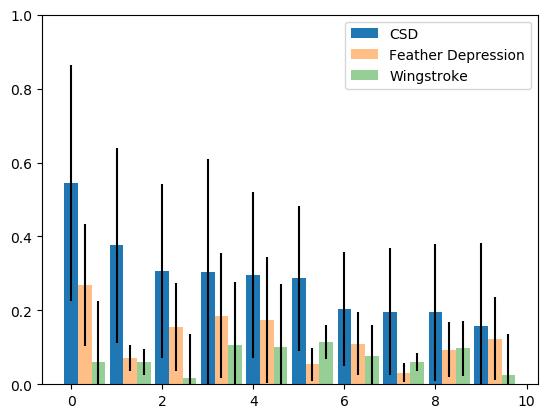

In [12]:
print(key_behaviors)
print(bird_song_counts.shape) # Behavior, female, song, count, total count
depuff_means = np.nanmean(bird_song_counts[0,:,:,0] / bird_song_counts[0,:,:,1],0)
depuff_sem = np.nanstd(bird_song_counts[0,:,:,0] / bird_song_counts[0,:,:,1],0) / np.sqrt(4)

wingstroke_means = np.nanmean(bird_song_counts[1,:,:,0] / bird_song_counts[1,:,:,1],0)
wingstroke_sem = np.nanstd(bird_song_counts[1,:,:,0] / bird_song_counts[1,:,:,1],0) / np.sqrt(4)

csd_means = np.nanmean(bird_song_counts[2,:,:,0] / bird_song_counts[2,:,:,1],0)
csd_sem = np.nanstd(bird_song_counts[2,:,:,0] / bird_song_counts[2,:,:,1],0)

verified_means = np.nanmean(binary_array3[:,:,:,0],axis=(0,1))
verified_order = np.argsort(verified_means)[::-1]
self_order = np.argsort(csd_means)[::-1]
fig,ax = plt.subplots()
ax.bar(np.arange(10),csd_means[self_order],
       yerr=csd_sem[self_order],alpha=1,width=.3,label='CSD')
ax.bar(np.arange(10)+.3,depuff_means[self_order],
       yerr=depuff_sem[self_order],alpha=.5,width=.3,label='Feather Depression')
ax.bar(np.arange(10)+.6,wingstroke_means[self_order],
       yerr=depuff_sem[self_order],alpha=.5,width=.3,label='Wingstroke')
ax.set_ylim([0,1])
ax.legend()
fig.show()



ws_bird_song_ratio = bird_song_counts[0,:,:,0]/bird_song_counts[0,:,:,1]
dp_bird_song_ratio = bird_song_counts[1,:,:,0]/bird_song_counts[1,:,:,1]
csd_bird_song_ratio = bird_song_counts[2,:,:,0]/bird_song_counts[2,:,:,1]

print('CSD:')
print(f_oneway(*np.transpose(csd_bird_song_ratio[:7])))
print('pearsons r:',pearsonr(csd_means,verified_means))
print('Depuffs')
print(f_oneway(*(np.transpose(dp_bird_song_ratio[:7]))))
print('pearsons r:',pearsonr(depuff_means,csd_means))
#print('baseline r:',pearsonr(depuff_means,np.nanmean(binary_array3[:,:,:,0],axis=(0,1))))
print("Wingstroke")
print(f_oneway(*(np.transpose(ws_bird_song_ratio[:7]))))
print("pearson's r:",pearsonr(wingstroke_means,csd_means))

#ax.scatter(depuff_means,csd_means)

In [14]:
from scipy.stats import norm
def r_to_z(r):
    return np.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = np.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / np.sqrt(n - 3)
    z_crit = norm.ppf(1 - alpha/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

r_confidence_interval(0.159,0.05,10)

(-0.5229823696668093, 0.7168609351301791)

In [16]:
## Stats for different groups:

## R2 has no postures

## Get numbers of songs per bird (or rate per bird...rate per bird)
#print(bird_song_counts[:,0,:,:])
song_rates_by_bird = np.zeros([birdview_meta.n_birds,birdview_meta.n_songs])
for f in range(birdview_meta.n_birds):
    for s in range(birdview_meta.n_songs):
        song_rates_by_bird[f,s] = np.nanmean(birdview_binary[f,:,s,0])
#print(song_rates_by_bird)
song_rates_by_song = np.transpose(song_rates_by_bird[:-1])
#print(song_rates_by_song)
#print(f_oneway(*song_rates_by_song))
for b in range(len(key_behaviors)):
    print('-Is there song bias in ',key_behaviors[b],':')
    bird_song_rates = np.empty([birdview_meta.n_birds,birdview_meta.n_songs])
    bird_song_rates.fill(np.nan)
    for f in range(birdview_meta.n_birds):  
        if np.sum(bird_song_counts[b,f,:,0]) == 0:
            continue
        bird_song_rates[f,:] = np.divide(bird_song_counts[b,f,:,0],bird_song_counts[b,f,:,1])
        #print(bird_song_rates[f,:])
    song_rates_list = [list(bird_song_rates[:,s][~np.isnan(bird_song_rates[:,s])]) for s in range(birdview_meta.n_songs)]

    f_stat,p_value = f_oneway(*song_rates_list)
    print('  f_oneway:',np.round(f_stat,3),p_value)
    #print(bird_song_rates,np.nanmean(bird_song_rates,0))
    
    xs = np.nanmean(bird_song_rates,0).flatten()
    ys = np.nanmean(birdview_binary[:,:,:,0],axis=(0,1)).flatten()
    xs_clean = np.copy(xs)[~np.isnan(xs) & ~np.isnan(ys)]
    ys_clean = np.copy(ys)[~np.isnan(xs) & ~np.isnan(ys)]
    r_stat,P_value = pearsonr(xs_clean,ys_clean)

    r_stat,P_value = pearsonr(np.nanmean(birdview_binary[:,:,:,0],axis=(0,1)),np.nanmean(bird_song_rates,0))
    print('  pearsons correlation with potency:',np.round(r_stat,3),P_value)
    print('CI:',r_confidence_interval(r_stat,0.05,len(xs_clean)))
    print(len(xs_clean))
    if False:
        fig,ax = plt.subplots()
        ax.bar(np.arange(10),np.nanmean(bird_song_rates,0)[sorted_order],yerr=np.nanstd(bird_song_rates,0)[sorted_order] / np.sqrt(len(bird_list)))
        ax.set_ylim([0,1])
        ax.set_title(key_behaviors[b])
        fig.show()



-Is there song bias in  Depuff :
  f_oneway: 0.589 0.8010122601282175
  pearsons correlation with potency: 0.536 0.11049374389422578
CI: (-0.14172331269996818, 0.8714101298408569)
10
-Is there song bias in  Wingstroke :
  f_oneway: 0.681 0.7210128706508944
  pearsons correlation with potency: 0.159 0.6618184675881686
CI: (-0.5233392393730018, 0.7166220000741164)
10
-Is there song bias in  CSD :
  f_oneway: 1.901 0.07333612528187666
  pearsons correlation with potency: 0.815 0.004110925511980953
CI: (0.37957678047352633, 0.9545950511384486)
10
-Is there song bias in  Partial CSD :
  f_oneway: 0.396 0.931162816995719
  pearsons correlation with potency: -0.038 0.915976814587069
CI: (-0.6522950981440988, 0.6058321642777533)
10


In [31]:
print(birdview_meta.n_birds)

10


In [17]:
print(bird_song_rates.shape)
print(np.nanmean(birdview_binary[:,:,:,0],1).shape)
xs = bird_song_rates.flatten()
ys = np.nanmean(birdview_binary[:,:,:,0],1).flatten()
xs_clean = np.copy(xs)[~np.isnan(xs) & ~np.isnan(ys)]
ys_clean = np.copy(ys)[~np.isnan(xs) & ~np.isnan(ys)]
r,p = pearsonr(xs_clean,ys_clean)

old_dp_r = 0.646152022732653
old_ws_r = 0.00390252860380908
print('dp:',r_confidence_interval(old_dp_r,0.05,10))
print('ws:',r_confidence_interval(old_ws_r,0.05,10))

(10, 10)
(10, 10)
dp: (0.027860212677488453, 0.9068433405865918)
ws: (-0.6272650464630215, 0.6319759789182818)


In [18]:
## Stats for above figures

## Difference in latencies: 
## a bit clunky to do all these in one line, but this removes nan values
latency_lists = [np.array(latency_dict[l])[~np.isnan(np.array(latency_dict[l]))] for l in good_labels]
## Remove non-positive values as well
latency_lists = [latency_lists[i][latency_lists[i]> 0] for i in range(len(latency_lists))]
groups = [[good_labels[l]] * len(latency_lists[l]) for l in range(len(good_labels))]

from statsmodels.stats.libqsturng import psturng

flat_list = [item for sublist in latency_lists for item in sublist]
flat_groups = [item for sublist in groups for item in sublist]
#print(flat_groups)
f_stat, p_value =f_oneway(*latency_lists)
print(np.round(f_stat,5),p_value)
#print(pairwise_tukeyhsd(flat_list,flat_groups))
res2 = pairwise_tukeyhsd(flat_list,flat_groups)
print("summary:", res2.summary())
#print("mean diffs:", res2.meandiffs)
#print("std pairs:",res2.std_pairs)
#print("groups unique: ", res2.groupsunique)
#print("df total:", res2.df_total)
p_values = psturng(np.abs(res2.meandiffs / res2.std_pairs), len(res2.groupsunique), res2.df_total)
print()
print("p values:", p_values)

## We can do this as t-test too, but the result is the same
for l in range(len(good_labels) - 1):
    continue
    print(good_labels[l],'vs',good_labels[l+1])
    print(ttest_ind(latency_lists[l],latency_lists[l+1]))
    
chi_expected = {
    'CSD/WS':count_dict['CSD'] * count_dict['Wingstroke'] / total_count**2,
    'CSD/DP':count_dict['CSD'] * count_dict['Depuff'] / total_count**2,
    'WS/DP':count_dict['Wingstroke'] * count_dict['Depuff'] / total_count**2,
    'PSD/WS':count_dict['Partial-CSD'] * count_dict['Wingstroke'] / total_count**2,
    'PSD/DP':count_dict['Partial-CSD'] * count_dict['Depuff'] / total_count**2,
}
from scipy.stats import chisquare

print(chisquare(np.array(list(chi_counts.values()))/total_count,np.array(list(chi_expected.values()))))
"""
## We might want to use a two sided anova, but hopefully they'll let that slide, the code is much harder
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, latency_df).fit()
aov_table = anova_lm(model, typ=2)

eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table.round(4))
"""
pass

111.5389 4.876772440622647e-46
summary:    Multiple Comparison of Means - Tukey HSD,FWER=0.05  
   group1      group2   meandiff  lower   upper  reject
-------------------------------------------------------
    CSD        Depuff   -0.5731  -0.6839 -0.4623  True 
    CSD     Partial-CSD  0.3009   0.1985  0.4033  True 
    CSD      Wingstroke -0.3636  -0.4882 -0.2391  True 
   Depuff   Partial-CSD  0.874    0.7378  1.0102  True 
   Depuff    Wingstroke  0.2095   0.0559  0.363   True 
Partial-CSD  Wingstroke -0.6645  -0.8122 -0.5169  True 
-------------------------------------------------------

p values: [0.001      0.001      0.001      0.001      0.00278092 0.001     ]
Power_divergenceResult(statistic=0.007415390753471172, pvalue=0.9999931434637997)


In [14]:
print(np.array(list(chi_counts.values()))/total_count,np.array(list(chi_expected.values())))

[0.02656546 0.03036053 0.         0.0056926  0.0056926 ] [0.02642504 0.02964761 0.00679079 0.0073813  0.00828145]


In [15]:
### I don't think I need this anymore...
bv3_binary = np.array(bv3_array)
bv3_binary[bv3_binary == 2] = 0

all_binary = np.empty([25,14,10])
all_binary.fill(np.nan)
all_binary[:7] = birdview_binary[:,:,:,0]
all_binary[7:,:11] = bv3_binary[:,:,:,0]

all_means = np.nanmean(all_binary,axis=(0,1))
all_sorted = all_means.argsort()[::-1]

all_std = np.nanstd(all_binary,axis=(0,1))
all_sem = all_std / np.sqrt(25)

fig,ax = plt.subplots()
ax.bar(range(len(all_means)),all_means[all_sorted],yerr=all_sem[all_sorted],color='darkgray')
ax.set_xticks(range(10))
ax.set_xticklabels(['Song A','Song B','Song C','Song D','Song E','Song F','Song G','Song H','Song I','Song J'],rotation=45)
ax.set_ylim([0,1])
ax.set_ylabel('Mean Response Rate')
fig.show()

all_by_bird = np.nanmean(all_binary,axis=1)

schmidt_bird_means = [list(all_by_bird[:,s][~np.isnan(all_by_bird[:,s])]) for s in range(10)]
print(f_oneway(*schmidt_bird_means))

ValueError: could not broadcast input array from shape (10,20,10) into shape (7,14,10)

['BDY' 'ND' 'LB' 'WG' 'BOD' '2M' 'GRG' 'DMG' 'LNR' 'DBR']


TypeError: f_oneway() argument after ** must be a mapping, not numpy.ndarray

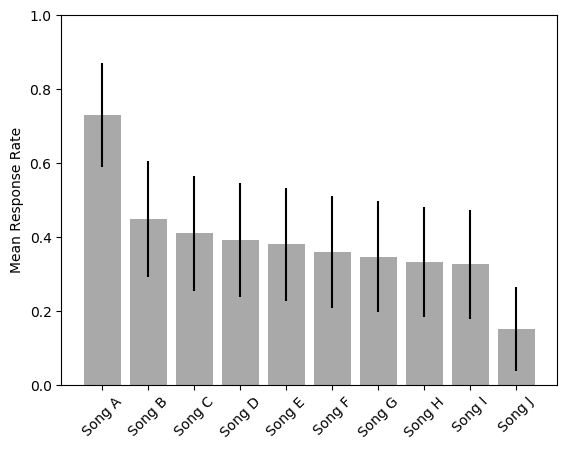

In [75]:
## Plot Fig 2b Don't think I need this anymore either
birdview_binary = np.array(birdview_array)
birdview_binary[birdview_binary == 2] = 0

bv3_binary = np.array(bv3_array)
bv3_binary[bv3_binary == 2] = 0


means_birdview = np.nanmean(birdview_binary[:,:,:,0],axis=(0,1))
sorted_order = means_birdview.argsort()[::-1]


std_birdview = np.nanstd(birdview_binary[:,:,:,0],axis=(0,1))
sem_birdview = std_birdview / np.sqrt(birdview_meta.n_birds)
fig,ax = plt.subplots()
ax.bar(range(len(means_birdview)),means_birdview[sorted_order],yerr=sem_birdview[sorted_order],color='darkgray')

ax.set_ylim([0,1])
ax.set_xticks(range(10))
ax.set_xticklabels(['Song A','Song B','Song C','Song D','Song E','Song F','Song G','Song H','Song I','Song J'],rotation=45)

ax.set_ylabel('Mean Response Rate')

#print(spearmanr(means_birdview,range(10)))
print(np.array(birdview_meta.song_list)[sorted_order])
print(f_oneway(**birdview_binary[:,:,:,0]))
fig.show()

F_onewayResult(statistic=12.143292511604777, pvalue=5.065699664363167e-09)
['BDY', 'BOD', 'ND', 'LB', '2M', 'DBR', 'GRG', 'WG', 'LNR', 'DMG']
(7, 20, 10)
[0 2 7 4 6 8 3 9 1 5] [7 5 9 2 6 8 0 3 1 4]
5
['BDY', 'ND', 'WG', '2M', 'GRG', 'LNR', 'LB', 'DMG', 'BOD', 'DBR']
0.7619047619047619
0.49986477349313185


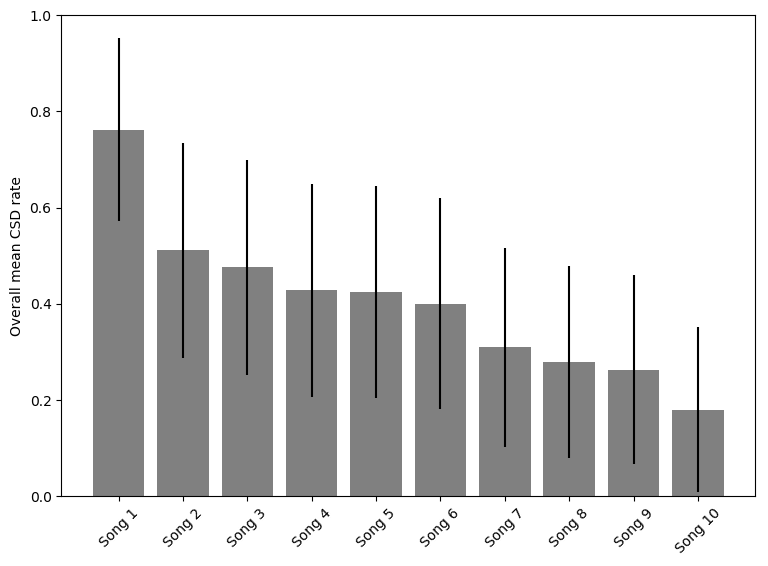

In [19]:
## Plot new Figure 1, giving an overview of the playback rankings
a = 1 #aviary 2 is the birdracks 
daviary = all_aviaries[a]
meta = all_metas[a]


#daviary_binary = np.array(daviary[:,:,:,0])
#daviary_binary[daviary_binary != 1] = 0

daviary_binary = all_binary[a][:,:,:,0]
print(f_oneway(*np.nanmean(daviary_binary,1)))
print(meta.song_list)
print(daviary_binary.shape)
fig,ax2 = plt.subplots()

## Plot individual mean responses
good_birds = np.nanmean(daviary_binary,axis=(1,2)) > .05

shuffled_s = np.random.permutation(np.arange(10))
sorted_s = np.argsort(np.nanmean(daviary_binary[good_birds],axis=(0,1)))[::-1]

print(sorted_s,shuffled_s)
sorted_b = np.argsort(np.nanmean(daviary_binary,axis=(1,2)))[::-1]

for b in range(len(daviary_binary)):
    i = sorted_b[b]
    bar_means = np.nanmean(daviary_binary[i][:,shuffled_s],0)
    bar_std = np.nanstd(daviary_binary[i][:,shuffled_s],0)
    xs = np.arange(0,10) + .8*b/len(meta.bird_list)
    #ax1.bar(xs,bar_means,width=.8/len(meta.bird_list),color=cm.viridis(b/len(meta.bird_list)))

alphabet = 'ABCDEFGHIJ'
song_names = []
song_ranks = []
i_dict = {}
for i in range(10):
    song_names.append('Song ' + alphabet[i])
    i_dict[shuffled_s[i]]=alphabet[i]
for i in range(10):
    song_ranks.append('Song ' + str(i + 1))# + ' ('+i_dict[sorted_s[i]]+')')

#ax1.set_xticks(range(10))
#ax1.set_xticklabels(song_names,rotation=45)
#ax1.set_ylabel('Mean bird CSD rate')
#good_birds = np.nanmean(daviary_binary,axis=(1,2)) > .05

print(np.sum(good_birds))
## Plot overall mean bird responses
bar_means = np.nanmean(daviary_binary[good_birds],axis=(0,1))
bar_sem = np.nanstd(daviary_binary[good_birds],axis=(0,1)) / np.sqrt(len(daviary_binary[good_birds]))



ax2.bar(np.arange(0,10),bar_means[sorted_s],yerr=bar_sem[sorted_s],color='gray')

#print(spearmanr(bar_means,np.arange(10)[::-1]))

ax2.set_xticks(range(10))
ax2.set_xticklabels(song_ranks,rotation=45)
ax2.set_ylabel('Overall mean CSD rate')




fig.tight_layout()

fig.set_size_inches([8,6])
print([meta.song_list[i] for i in sorted_s])
print(np.max(np.nanmean(daviary_binary[good_birds],axis=(0,1))))
print(np.max(np.nanstd(daviary_binary[good_birds],axis=(0,1))))

7
20 51
nan
0
0
0
0
1
0
0
0
1
0
0
0
0
0


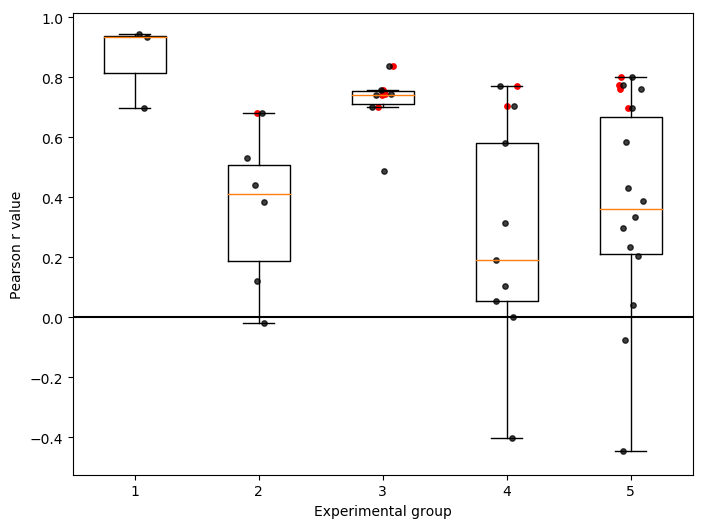

In [236]:
# How much do birds agree? 

fig,ax = plt.subplots()
count,p_count = 0,0
all_std,random_stds = [],[]
iterations = 1000
boxes_concs = []
sig_count = 0
print(len(all_aviaries))
skip = 0
for a in range(len(all_aviaries)):

    #responsive_birds = []
    bird_concs = []
    bird_ps = []
    daviary = all_aviaries[a][:,:,:,0]
    n_birds = daviary.shape[0]
    n_blocks = daviary.shape[1]
    responsive_birds = np.nanmean(daviary,axis=(1,2)) > .05
    for f in range(n_birds):
        this_bird = daviary[f,:,:]
        if np.nanmean(this_bird) <= .05:
            #print('non_responsive!',a,f)
            continue
        not_f = np.arange(n_birds) != f
        good_songs = ~np.isnan(np.nanmean(daviary[f,:,:],axis=0))
        good_songs_all = ~np.isnan(np.nanmean(daviary[not_f,:,:],axis=(0,1)))
        gsi = good_songs & good_songs_all
        #bird_conc,p_value = pearsonr(np.nanmean(daviary[f,:,gsi],axis=0),np.nanmean(daviary[not_f,:,gsi],axis=(0,1)))
        bird_conc,p_value = pearsonr(np.nanmean(daviary[f,:][:,gsi],axis=0),
                             np.nanmean(daviary[not_f,:][:,:,gsi],axis=(0,1)))
        #random_birds = np.shuffle(np.nanmean(daviary[f,:,:],axis=0))
        #random_conc,_ = pearsonr(random_birds,np.nanmean(daviary[not_f,:,:],axis=(0,1)))
        #bird_concs.append(1 - p_value)
        if ~np.isnan(bird_conc):
            bird_concs.append(bird_conc)
            bird_ps.append(p_value)
        else:    
            print('no correlation',a,f,bird_conc,np.nanmean(daviary[f,:,:,],0),np.nanmean(daviary[not_f,:,:],axis=(0,1)))
            continue
            
        #rand_concs.append(random_conc)
        #print(bird_conc,p_value)
        if p_value <= .05:
            p_count += 1
        count += 1
    xs = np.ones(len(bird_concs)) * a + np.random.uniform(low=-.1,high=.1,size=len(bird_concs))
    bird_concs = np.array(bird_concs)
    bird_ps = np.array(bird_ps)
    
    bird_concs_sig = bird_concs[bird_ps < .05]
    bird_concs_non = bird_concs[bird_ps >- .05]
    boxes_concs.append(bird_concs)
    sig_count += len(bird_concs_sig)
    
    if a not in same_songs:
        skip += 1
    else:
        xs_sig = np.ones(len(bird_concs_sig)) * (a-skip) + np.random.uniform(low=-.1,high=.1,size=len(bird_concs_sig))
        xs_non = np.ones(len(bird_concs_non)) * (a-skip) + np.random.uniform(low=-.1,high=.1,size=len(bird_concs_non))

        ax.scatter(xs_sig,bird_concs_sig,color='red',marker='.',s=60)
        ax.scatter(xs_non,bird_concs_non,color='black',marker='.',alpha=.75,s=60)
    #ax.scatter(xs,bird_concs)

ax.boxplot([boxes_concs[s] for s in same_songs],positions=range(len(same_songs)),showfliers=False)

#ax.axhline(.95,color='red',linestyle=':')
#ax.set_title('Most birds correlate strongly with group')
ax.set_xlabel('Experimental group')
ax.set_ylabel('Pearson r value')
ax.axhline(0,color='black')
ax.set_xticklabels(range(1,8))
#ax.set_ylim(-.25,1.05)
fig.set_size_inches(8,6)
fig.show()
print(p_count,count)
print(np.nanmean(all_std))

for c in bird_concs:
    print(np.sum(np.array(c) <= 0))



0.5021370268292478 0.526534417172781 0.24854131824676023


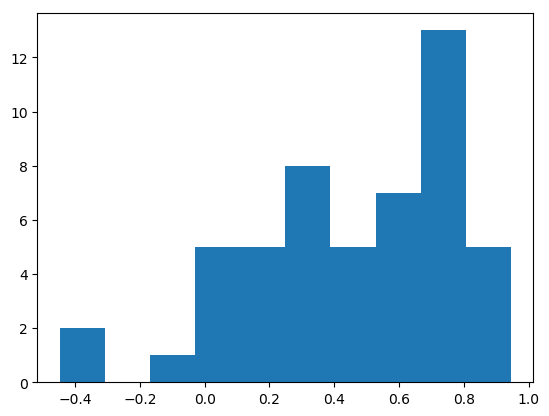

In [253]:
all_concs = np.array([])
for c in boxes_concs:
    all_concs = np.hstack([all_concs,c])
    
print(np.median(all_concs),np.mean(all_concs[all_concs > 0]), np.std(all_concs[all_concs > 0]))

fig,ax = plt.subplots()
ax.hist(all_concs)
fig.show()

In [ ]:
## Old Plots
"""
fig2,ax2 = plt.subplots()

plotted_boots = random.sample(random_stds,200)
ax2.hist(plotted_boots,bins=20)
ax2.hist(all_std)
fig2.show()
"""
""" 
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()


daviary = all_aviaries[1][:,:,:,0]
n_songs = daviary.shape[2]
n_birds = daviary.shape[0]

daviary_r = np.array(daviary)
bird_means = np.nanmean(daviary,axis=(1,2))
daviary_r = daviary[bird_means > .05]
mean_bar = np.nanmean(np.nanmean(daviary_r,1),0)
std_bar = np.nanstd(np.nanmean(daviary_r,axis=1),0)
song_order = np.argsort(mean_bar)[::-1]
mean_bar = mean_bar[song_order]
std_bar = std_bar[song_order]

for s in range(n_songs):
    ax2.fill_between([1+s-.2,1+s+.2],mean_bar[s] + std_bar[s],mean_bar[s] - std_bar[s],color='gray',alpha=.9)
ax2.hlines(mean_bar,1+np.arange(n_songs)-.2,1+np.arange(n_songs) + .2,color='black')
ax2.set_ylim([0,1])

bird_map = ax1.imshow(np.nanmean(daviary_r,1),interpolation='nearest',aspect='auto')
ax1.set_xlabel('Song')
ax1.set_ylabel('Bird id')
ax1.set_title('Mean response Rate')

fig1.colorbar(bird_map,ax=ax1)
fig1.set_size_inches(4,3)
fig1.show()


ax2.set_xlabel('Song')
ax2.set_ylabel('Response Rate')
fig2.set_size_inches(4,3)
fig.tight_layout()
fig2.show()
"""
pass

['BDY', 'BOD', 'ND', 'LB', '2M', 'DBR', 'GRG', 'WG', 'LNR', 'DMG'] ['2M', 'BDY', 'BOD', 'DBR', 'DMG', 'GRG', 'LB', 'LNR', 'ND', 'WG'] [4, 0, 1, 5, 9, 6, 3, 8, 2, 7]
['BDY', 'BOD', 'ND', 'LB', '2M', 'DBR', 'GRG', 'WG', 'LNR', 'DMG'] ['2M', 'BDY', 'BOD', 'DBR', 'DMG', 'GRG', 'LB', 'LNR', 'ND', 'WG'] [4, 0, 1, 5, 9, 6, 3, 8, 2, 7]
['BDY', 'BOD', 'ND', 'LB', '2M', 'DBR', 'GRG', 'WG', 'LNR', 'DMG'] ['2M', 'BDY', 'BOD', 'DBR', 'DMG', 'GRG', 'LB', 'LNR', 'ND', 'WG'] [4, 0, 1, 5, 9, 6, 3, 8, 2, 7]
['MDMG' 'MDBR' 'MBOD' 'MBDY' 'M2M' 'MGRG' 'MLB' 'MLNR' 'MWG' 'MND'] ['M2M', 'MBDY', 'MBOD', 'MDBR', 'MDMG', 'MGRG', 'MLB', 'MLNR', 'MND', 'MWG'] [4, 3, 2, 1, 0, 5, 6, 7, 9, 8]
['M2M' 'MBDY' 'MBOD' 'MDBR' 'MDMG' 'MGRG' 'MWG' 'MND' 'MLNR' 'MLB'] ['M2M', 'MBDY', 'MBOD', 'MDBR', 'MDMG', 'MGRG', 'MLB', 'MLNR', 'MND', 'MWG'] [0, 1, 2, 3, 4, 5, 9, 8, 7, 6]
0 1 (0.8222503703140592, 0.1777496296859408)
0 2 (0.8914602219886318, 0.10853977801136819)
0 3 (0.8577550062273679, 0.14224499377263214)
0 4 (0.709266717

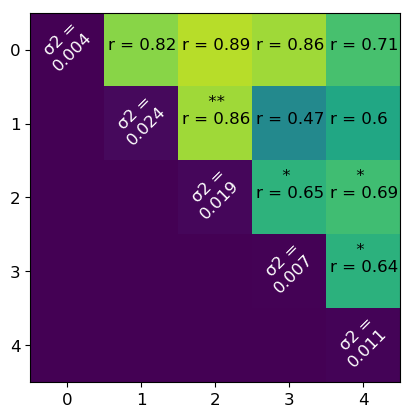

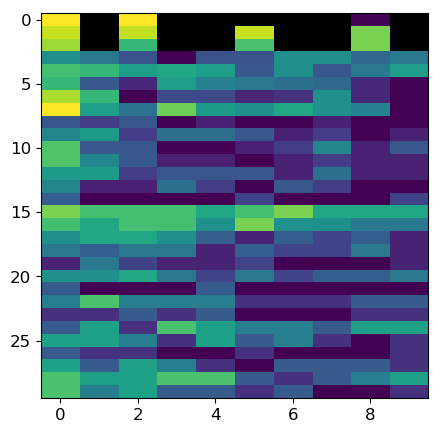

In [56]:
## CAlculate Pairwise corr for Supplemental Figure1
same_songs = [0,1,2,5,6]
aviary_rankings = np.zeros([5,10])

## Clean this up, exclude non-responsive birds, correlate even with missing songs for aviary A

bird_song_means = np.empty([0,10])
for i in range(len(same_songs)):
    a = same_songs[i]
    song_list_sorted = sorted(all_metas[a].song_list)
    sorted_song_indices = [all_metas[a].song_dict[s] for s in song_list_sorted]
    #print(sorted_song_indices,np.array(all_metas[a].song_list)[sorted_song_indices])
    binary_dave = all_binary[a][:,:,:,0]
    #binary_dave[binary_dave == 2] = 0
    binary_dave = binary_dave[:,:,sorted_song_indices]
    print(all_metas[a].song_list,song_list_sorted,sorted_song_indices)
    bird_means = np.nanmean(binary_dave,axis=(1,2))
    #print(bird_means.shape)
    responsive_birds = [bird_means > .05]
    local_rankings = np.nanmean(binary_dave[responsive_birds],axis=(0,1))
    resp_bird_song_means = np.nanmean(binary_dave[responsive_birds],axis=(1))
    bird_song_means =  np.vstack([bird_song_means,resp_bird_song_means])
    #print(local_rankings)
    aviary_rankings[i,:] =local_rankings

#print(aviary_rankings)

pairwise_t = np.zeros([len(same_songs),len(same_songs)])
fig,ax = plt.subplots()
for i in range(len(pairwise_t)):
    for j in range(1,len(pairwise_t)-i):
        k = i+j
        ranks_i = aviary_rankings[i]
        ranks_k = aviary_rankings[k]
        if i == 0:
            ranks_i = aviary_rankings[i][~np.isnan(aviary_rankings[i])]
            ranks_k = aviary_rankings[k][~np.isnan(aviary_rankings[i])]
        r_stat,p_val = pearsonr(ranks_i,ranks_k)
        pairwise_t[i,k] = 1 / p_val
        pairwise_t[i,k] = r_stat
        print(i,k,pearsonr(ranks_i,ranks_k))
        if p_val < .01:
            sig ='**'
        elif p_val < .05:
            sig = '*'
        else:
            sig=''
            
        #print(i,k,spearmanr(ranks_i,ranks_k))
        #ax.text(k-.35,i,'p = ' + str(np.round(p_val,3)))
        ax.text(k-.45,i,'     ' + sig + '\n' + 'r = ' + str(np.round(r_stat,2)))
print('mean correlation:',np.mean(pairwise_t[pairwise_t > 0]))

if True:
    for i in range(len(pairwise_t)):
        pairwise_t[i,i] = np.var(aviary_rankings[i][~np.isnan(aviary_rankings[i])])
        print(pairwise_t[i,i])
        ax.text(i-.40,i-.05,' σ2 =\n' + str(np.round(pairwise_t[i,i],3)),color='white',rotation=45)
ax.imshow(pairwise_t,vmax = 1,vmin=0)
fig.show()

fig,ax = plt.subplots()

cmap = cm.viridis
cmap.set_bad(color='black')
ax.imshow(bird_song_means[:,np.argsort(np.nanmean(bird_song_means[:],0))[::-1]],aspect='auto',cmap=cmap)

fig.set_size_inches([5,5])
fig.show()

## Figure 3

waveforms are done in illustrator, I'm not a massochist

In [41]:
print(song_list)
print(seq.smooth_data.shape)


['BDY', 'BOD', 'ND', 'LB', '2M', 'DBR', 'GRG', 'WG', 'LNR', 'DMG']
(946, 17, 3)


-6.822999954223633
7.55
Y1
latency 0.727000045776367
-3.9469997882843018
4.45
Y1
latency 0.5030002117156984
-5.177000045776367
5.625
CB0
latency 0.4479999542236328


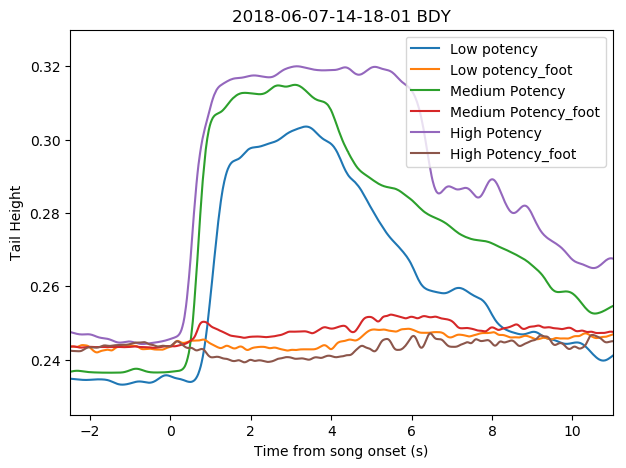

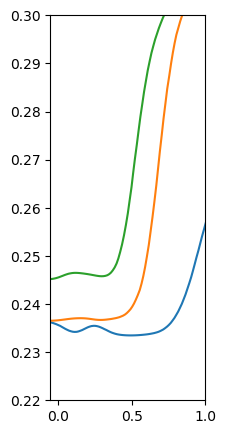

In [182]:
#exemplars = ['2019-06-10-11-46-12_ND','2019-06-18-08-46-14_2M','2019-06-18-17-16-14_WG']
#exemplars = ['2018-06-08-08-18-01','2018-05-30-12-48-01','2018-06-01-12-48-01']
from scipy.ndimage import gaussian_filter1d

exemplars = ['2019-06-18-15-32-52_GRG','2019-06-12-13-16-14_BDY','2019-06-13-15-32-53_LB',
             ]
exemplars = ['2018-05-30-11-17-56','2018-06-07-14-18-01','2018-05-31-15-48-05']
labels = ['Low potency','High Potency','Medium Potency']
label_dict = dict(zip(exemplars,labels))
fig,ax = plt.subplots()
fig1,ax1 = plt.subplots()
for i,row in test_3.iterrows():
    if '2018' not in row['SeqName']:# and '2018' not in row['SeqName']:
        continue
    ## Need the seq for offset, if it doesn't exist just count it but no time
    try:
        seq = pickle.load(open('./SeqClasses/' + row['SeqName'] + '.obj','rb'))
    except:
        continue
       
    if seq.posture and seq.clean:
        if len(seq.ts) != seq.smooth_data.shape[0]:
            continue
        if seq.ts[0] == 0:
            continue
        if seq.seq_name not in exemplars:
            pass
            continue
        #fig,ax = plt.subplots()
        extra_smooth = gaussian_filter1d(seq.smooth_data[:,10,2],sigma=10)
        foot_height = (seq.smooth_data[:,12,2] + seq.smooth_data[:,11,2]) / 2
        #extra_smooth = seq.smooth_data[:,10,2]
        #ax.plot(seq.ts,extra_smooth)
        #ax.plot(seq.ts,seq.rough_data[:,10,2],alpha=.2,color='gray')
        ax.plot(seq.ts,extra_smooth,label=label_dict[seq.seq_name])
        ax.plot(seq.ts,foot_height,label=label_dict[seq.seq_name] + '_foot')
        #ax.plot(seq.ts,)
        #ax1.plot(seq.ts,seq.rough_data[:,10,2],alpha=.2,color='gray')
        ax1.plot(seq.ts,seq.smooth_data[:,10,2])
        #ax1.plot(seq.ts,extra_smooth)
        print(seq.ts[0])
        print(row['PostureStamp'])
        print(seq.bird)
        print('latency',row['PostureStamp'] + seq.ts[0])
        ax.set_xlim([-.5,10])
        ax.set_title(seq.seq_name + ' ' + seq.song)
        #fig.savefig('./PlottedPostures/' + seq.seq_name + '_' + seq.song + '.png',dpi=300)

        #fig.show()
if True:
    ax.set_xlim([-2.5,11])
    ax.set_ylim([0.225,0.33])
    ax1.set_xlim([-0.05,1])
    ax1.set_ylim([0.22,0.30])

    ax.set_ylabel('Tail Height')
    ax.set_xlabel('Time from song onset (s)')

    ax.legend()
    #fig.legend()
    fig.set_size_inches([7,5])
    fig.show()
    fig1.set_size_inches([2,5])
    fig1.show()
    if False:
        fig.savefig('./figures/ExemplarFiga.png',dpi=300)
        fig1.savefig('./figures/ExemplarFigb.png',dpi=300)
        fig.savefig('./figures/ExemplarFiga.svg')
        fig1.savefig('./figures/ExemplarFigb.svg')


In [139]:
print('high', -3.7790000438690186 + 4.560)

print('low',-3.803999900817871 + 4.540)

high 0.780999956130981
low 0.7360000991821289


['Y1', 'PINK2', 'CB-Orange', 'CB-LB2', 'P1', 'CB-Y2', 'CB-Yellow']
neg latencies: 2
Latencies: 0.8253596057703931 0.45674342443042965
Durations: 4.962107316459098 2.679311351268721


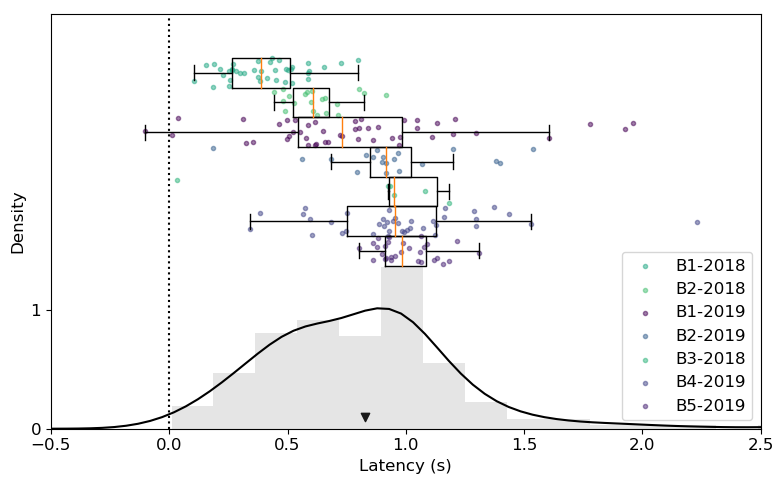

In [41]:
## Make data and plot figure3, Get durations,latencies by bird: 
song_list = ['BDY','BOD','ND','LB','2M','DBR','GRG','WG','LNR','DMG']
plot_bird_list = ['Y1','PINK2','CB-Orange','CB-LB2','P1','CB-Y2','CB-Yellow']
simple_bird_list = ['B1-2018','B2-2018','B1-2019','B2-2019','B3-2018','B4-2019','B5-2019']
plot_bird_indices = [8,9,1,2,7,4,5]

bird_color_values = [0.6,0.7,0.0,.3,.65,.2,.1,0,0,0]
bird_colors = [paper_cmap(v) for v in bird_color_values]
base_h = 1.50
top_h = 3.0

print(plot_bird_list)
n_birds = len(plot_bird_list)


durations = np.array(data_array[:,:,:,2])

durations[data_key[:,:,:,2] == 0] = np.nan
durations[data_array[:,:,:,0] != 1] = np.nan
good_durations = durations[~np.isnan(durations)]

latencies = np.array(data_array[:,:,:,1])
latencies[data_key[:,:,:,2] == 0] = np.nan
latencies[data_array[:,:,:,0] != 1] = np.nan
good_latencies = latencies[~np.isnan(latencies)]
print('neg latencies:',np.sum(good_latencies <= 0))
good_latencies = good_latencies[good_latencies > 0]

bird_durations = [np.nan] * n_birds
bird_latencies = [np.nan] * n_birds

## Get durations and latencies by bird
for i in range(n_birds):
    bird_name = plot_bird_list[i]
    n = bird_dict[bird_name]
    p_indices = np.logical_and(~np.isnan(data_array[n,:,:,2]),data_array[n,:,:,0] == 1)
    crap_indices = data_key[n,:,:,2] == 0
    bird_durations[i] = data_array[n,:,:,2][np.logical_and(p_indices,~crap_indices)]
    bird_latencies[i] = data_array[n,:,:,1][np.logical_and(p_indices,~crap_indices)]

#print('****',bird_latencies)
#print('**',bird_durations)

#fig,(ax1,ax2) = plt.subplots(1,2)
fig,ax1 = plt.subplots()

## base_h defined above
dur_heights = np.linspace(base_h,top_h,n_birds)[::-1]
lat_heights = np.linspace(base_h,top_h,n_birds)[::-1]
dur_widths = [.25] * n_birds

for s in range(n_birds):
    i = plot_bird_indices[s]
    ys_dur = np.array([dur_heights[s]] * len(bird_durations[s]))
    ys_lat = np.array([lat_heights[s]] * len(bird_durations[s]))
                      
    jitter_dur = (np.random.rand(len(ys_dur)) - .5) * .25
    jitter_lat = (np.random.rand(len(ys_lat)) - .5) * .25

    ys_dur = ys_dur + jitter_dur
    ys_lat = ys_lat + jitter_lat
    ax2.scatter(bird_durations[s],ys_dur,alpha=.5,marker='.',color=bird_colors[s])
    ax1.scatter(bird_latencies[s],ys_lat,alpha=.5,marker='.',color=bird_colors[s],label=simple_bird_list[s])

    mark_h = .5
    #ax1.scatter(np.nanmean(bird_latencies[s]),mark_h,marker='v',color=bird_colors[i])
    #ax2.scatter(np.nanmean(bird_durations[s]),mark_h,marker='v',color=bird_colors[i])


#ax2.boxplot(bird_durations,positions=dur_heights,vert=False,widths=dur_widths,showfliers=False)
ax1.boxplot(bird_latencies,positions=lat_heights,vert=False,widths=dur_widths,showfliers=False)

dur_xs = np.linspace(-5,25,100)    
lat_xs = np.linspace(-2,3,100)
#ax1.scatter(np.nanmean(good_latencies),mark_h *3,marker='v',color='red',s=60)
#ax2.scatter(np.nanmean(good_durations),mark_h *3,marker='v',color='red',s=60)

ax1.hist(good_latencies,bins=20,color='gray',alpha=.2,normed=True)
#ax2.hist(good_durations,bins=10,color='gray',alpha=.2,normed=True)

ax1.scatter(np.mean(good_latencies),.1,marker='v',color='black')
lat_curve =  gaussian_kde(good_latencies)

ax1.plot(lat_xs,lat_curve(lat_xs),color='black')
"""
for b in range(n_birds):
    #y,x,_ = plt.hist(bird_durations[b],bins=10,alpha=.2)
    #lat_y,lat_x,_ = plt.hist(bird_latencies[b],bins=20,alpha=.2)
    i = plot_bird_indices[b]
    if len(bird_latencies[b]) > 1:
        dur_curve = gaussian_kde(bird_durations[b],bw_method=.3)
        #ax2.plot(dur_xs,dur_curve(dur_xs) * max(y) / max(dur_curve(dur_xs)),color=bird_colors[i],label=plot_bird_list[b])
        lat_curve = gaussian_kde(bird_latencies[b],bw_method=.3)
        #ax1.plot(lat_xs,lat_curve(lat_xs) * max(lat_y) / max(lat_curve(lat_xs)),color=bird_colors[i])
"""
ax1.set_xlim([-.5,2.5])       
ax1.set_ylim([0,3.5])  



ax1.set_yticks(np.arange(0,2))
ax1.set_yticklabels([0,1])
#ax1.set_yticklabels(np.arange(0,10))
"""
ax2.set_xlim([-1,15])
ax2.set_ylim(0,4)
ax2.set_yticks(np.arange(0,2))
ax2.set_yticklabels([0,1])
ax2.set_ylabel('   ')
ax2.set_xlabel('Duration (s)')
ax2.axvline(0,linestyle=':',color='black')
"""
ax1.set_ylabel('Density')

ax1.set_xlabel('Latency (s)')

ax1.axvline(0,linestyle=':',color='black')

#fig.legend()

ax1.legend(loc='lower right')
#fig.set_size_inches(10,5)
fig.set_size_inches(8,5)
fig.tight_layout()
fig.show()


print('Latencies:',np.mean(good_latencies),np.std(good_latencies))
print('Durations:',np.mean(good_durations),np.std(good_durations))
if False:
    fig.savefig('/home/ammon/Desktop/PaperFigs/5ab.png')
    fig.savefig('/home/ammon/Desktop/PaperFigs/5ab.svg')

In [43]:
print(len(good_latencies))

203


In [ ]:
## Might not need these anymore
print('Latency:',np.nanmean(good_latencies),np.nanstd(good_latencies))
print('Duration:',np.nanmean(good_durations),np.nanstd(good_durations))

print(ttest_ind(bird_latencies[0],bird_latencies[-1]))
print(np.mean(bird_latencies[0]),np.mean(bird_latencies[-1]))
print(np.std(bird_latencies[0]),np.std(bird_latencies[-1]))

print('duration:')
print(ttest_ind(bird_durations[1],bird_durations[-2]))
print(np.mean(bird_durations[0]),np.mean(bird_durations[-1]))

print(np.std(bird_durations[0]),np.std(bird_durations[-1]))

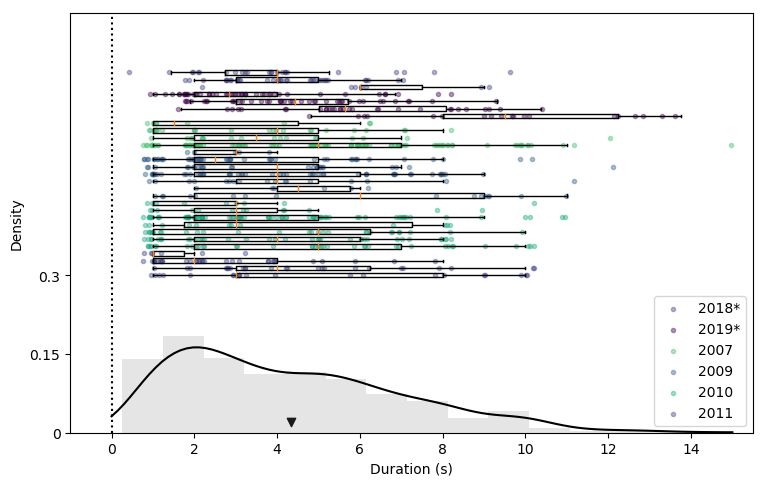

In [126]:
## Plot Durations figure for all birds

durations_df = pd.read_csv('./durations_df2.csv')

aviary_dict = dict(zip(pd.unique(durations_df['Aviary']),range(len(pd.unique(durations_df['Aviary'])))))
aviary_colors = paper_cmap([0.2,0.0,0.7,.3,.6,.2])

fig,ax = plt.subplots()
duration_list_all = []
duration_list_flat = []
mean_durations = []
aviary_list = []

for b_i,b in enumerate(pd.unique(durations_df['Bird'])):
    #ax.hist(durations_df.loc[durations_df['Bird'] == b]['Duration'],alpha=.5)
    one_bird_df = durations_df.loc[durations_df['Bird'] == b]
    if len(one_bird_df) < 5 or np.nanmean(one_bird_df['ResponseRate']) < .05:
        #print(b)
        continue
    duration_list_all.append(durations_df.loc[durations_df['Bird'] == b]['Duration'])
    duration_list_flat.extend(durations_df.loc[durations_df['Bird'] == b]['Duration'])
    aviary_list.append(aviary_dict[one_bird_df['Aviary'].iloc[0]])
    mean_durations.append(np.mean(duration_list_all[-1]))

running_count = 0
block_sort = []
for i in range(max(aviary_list)+1):
    subset = np.array(mean_durations)[np.array(aviary_list) == i]

    sub_order = np.argsort(subset) + running_count
    block_sort.extend(sub_order)
    running_count += len(subset)

#duration_list_all = [duration_list_all[i] for i in np.argsort(mean_durations)[::-1]]
duration_list_all = [duration_list_all[i] for i in block_sort]
pos_ys = np.arange(.3,.7,.4/len(duration_list_all))[::-1]

aviaries_plotted = []
aviary_plot_list = ['2018*','2019*','2007','2009','2010','2011']
for b in range(len(duration_list_all)):
    aviary_i = aviary_list[b]

    jitter_dur = (np.random.rand(len(duration_list_all[b])) - .5) * .5
    ax.scatter(duration_list_all[b] + jitter_dur,[pos_ys[b]] * len(duration_list_all[b]),
               alpha=.4,marker='.',color=aviary_colors[aviary_list[b]],label=aviary_plot_list[aviary_i] if aviary_i not in aviaries_plotted else "")
    aviaries_plotted.append(aviary_i)
ax.boxplot(duration_list_all,positions=pos_ys,widths=[.25/len(duration_list_all)] * len(duration_list_all),vert=False,showfliers=False)
ax.hist(duration_list_flat,normed=True,bins=int(max(duration_list_flat)),color='gray',alpha=.2)
ax.scatter(np.mean(duration_list_flat),.02,marker='v',color='black')

dur_density = gaussian_kde(duration_list_flat)
dur_xs = np.linspace(0,15,100)
ax.legend(loc='lower right')
ax.plot(dur_xs,dur_density(dur_xs),color='black')
#ax.get_yaxis().set_visible(False)
ax.set_yticks((0,.15,.3))
ax.set_yticklabels([0,.15,.3])
#ax2.boxplot(bird_durations,positions=dur_heights,vert=False,widths=dur_widths,showfliers=False)    
ax.set_ylim(0,0.8)
ax.axvline(0,linestyle=':',color='black')
ax.set_xlim(-1,15.5)
ax.set_ylabel('Density')
ax.set_xlabel('Duration (s)')

fig.tight_layout()
fig.set_size_inches(8,5)

if False:
    fig.savefig('/home/ammon/Desktop/PaperFigs/5b_full.png')
    fig.savefig('/home/ammon/Desktop/PaperFigs/5b_full.svg')

fig.show()

In [198]:
print(f_oneway(*duration_list_all))
print(len(duration_list_flat))
print(np.nanmean(duration_list_flat),np.nanstd(duration_list_flat))

F_onewayResult(statistic=6.193460461163851, pvalue=2.50456676221765e-20)
821
4.337101096212501 2.711781620524243


In [128]:
##Test for whether birds are different. 

lats = []
durs = []
bird_ids = []
print('mean values: (latency +-std, duration +-std)')
for b in range(len(bird_latencies)):
    print(b,np.nanmean(bird_latencies[b]),np.nanstd(bird_latencies[b]),np.nanmean(bird_durations[b]),np.nanstd(bird_durations[b]))
    lats.extend(bird_latencies[b])
    durs.extend(bird_durations[b])
    bird_ids.extend([b] * len(bird_latencies[b]))
    
print('\nSignificant variation in latency (std is similar)')

print(f_oneway(*bird_latencies))
res2 = pairwise_tukeyhsd(lats,bird_ids)
print("summary:", res2.summary())
p_values = psturng(np.abs(res2.meandiffs / res2.std_pairs), len(res2.groupsunique), res2.df_total)
print()
print("p values:", p_values)

#print(pairwise_tukeyhsd(lats,bird_ids))
print(levene(*bird_latencies))

print('\n\nSignificant variation in duration ')
print(f_oneway(*bird_durations))
res2 = pairwise_tukeyhsd(durs,bird_ids)
print("summary:", res2.summary())
p_values = psturng(np.abs(res2.meandiffs / res2.std_pairs), len(res2.groupsunique), res2.df_total)
print()
print("p values:", p_values)

print(levene(*bird_durations))




mean values: (latency +-std, duration +-std)
0 0.3378800284576416 0.28442887949994616 4.04 1.28
1 0.5997777890099419 0.1472215873860209 4.040333324008518 2.8657889327862085
2 0.7933191554698538 0.43356389540829904 3.268893617264768 1.752824356108297
3 0.9422104748173761 0.29678690313346606 9.5942105368564 2.6360776267036323
4 1.2359999329703195 1.007174504140315 6.285714285714286 2.1852940772540506
5 0.9713902415298834 0.5275446960487131 4.503365848122574 1.7540539826214485
6 1.066800026257833 0.36192957205977694 6.016166671117147 2.15077884737707

Significant variation in latency (std is similar)
F_onewayResult(statistic=8.486712191032705, pvalue=4.512143266565624e-08)
summary: Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     0.2619  -0.2641 0.7879 False 
  0      2     0.4554   0.1205 0.7904  True 
  0      3     0.6043   0.1925 1.0162  True 
  0      4     0.8981   0.3195 1.476

In [63]:
print(np.nanmean(birdview_binary[:,:,:,0],axis=(0,1)))
print(np.nanmean(bv2019_binary[:,:,:,0],axis=(0,1)))
print(np.nanmean(bv2018_binary[:,:,:,0],axis=(0,1)))

[0.285 0.135 0.11  0.15  0.09  0.035 0.085 0.1   0.08  0.12 ]
[0.23571429 0.07857143 0.15714286 0.09285714 0.12857143 0.05
 0.12142857 0.14285714 0.11428571 0.08571429]
[0.4        0.26666667 0.         0.28333333 0.         0.
 0.         0.         0.         0.2       ]


In [18]:
## Build posture_df to do duration latency mixed linear regression
old_df = pd.read_csv('./data_dir/presentation_info3.csv')

file_list = good_list
seq_dir = dir_list[0]

binary_array = birdview_binary
#binary_array[binary_array[:,:,:,0] == 2] = 0

song_list = birdview_meta.song_list
bird_list = birdview_meta.bird_list
posture_df = pd.DataFrame(columns=['Bird','Song','Block','RelPotency','AvgPotency','Latency',
                            'Duration','AutoLatency','AutoDuration','Year','ResponseRate'],index=range(146))
song_list_i = range(len(song_list))
bird_list_i = range(len(bird_list))

song_potency_2019 = dict(zip(song_list,np.nanmean(bv2019_binary[:,:,:,0],axis=(0,1))))
song_potency_2018 = dict(zip(song_list,np.nanmean(bv2018_binary[:,:,:,0],axis=(0,1))))

relative_potency = {}
for b in range(len(bird_list)):
    relative_potency[bird_list[b]] = dict(zip(song_list,np.nanmean(binary_array[b,:,:,0],axis=0)))

count = 0
for s in file_list:

    seq = pickle.load(open(seq_dir + s,'rb'))
    if seq.offset == 0 or seq.posture != 1:
        continue
    if not seq.clean:
        continue
    if seq.bird not in bird_list:
        continue
    manual_row = test_3[test_3['SeqName'] == seq.seq_name]
    old_row = old_df[old_df['SeqName'] == seq.seq_name]

    if '2018' in seq.seq_name:
        if '-' in seq.song:
            continue
        year = 2018
        true_duration = manual_row['PostureDuration'].item()
        true_latency = manual_row['PostureStamp'].item() + seq.ts[0]
        song_potency = song_potency_2018
    else:
        year = 2019
        song_potency = song_potency_2019
        true_duration = old_row['Duration by eye'].item()
        if true_duration == 'R':
            continue
        true_latency = old_row['Latency by Eye Frame'].item() + seq.ts[0]
    if seq.t_latency_index == 0:
        auto_latency = np.nan
        auto_duration = np.nan
    else:
        auto_latency = seq.t_latency
        auto_duration = seq.duration
    #print(true_duration,true_latency)
    #print(true_duration,true_latency)

    posture_df.loc[count] = [bird_dict[seq.bird],song_dict[seq.song],seq.block,
                             relative_potency[seq.bird][seq.song],song_potency[seq.song],
                             true_latency,true_duration,auto_latency,auto_duration,year,0.0]
    count += 1
    

In [19]:
#print(count)
#posture_df = posture_df.dropna()
#posture_df = posture_df.infer_objects()
#print(posture_df)
for i,row in posture_df.iterrows():
    bird = row['Bird']
    block = row['Block']
    bird_df = posture_df[posture_df['Bird'] == bird]
    bird_row_df = bird_df[bird_df['Block'] == block]
    #print(row)
    #print(bird,block)
    response_rate = np.nanmean(birdview_binary[int(bird),int(block),:,0])
    #print(response_rate,i)
    #row['ResponseRate'] = response_rate
    #posture_df.iat[i,7] = response_rate
    posture_df.set_value(i,'ResponseRate',response_rate)
    posture_df.iat[i,-1] = response_rate
    #print('change?',posture_df.iat[i,-1])
    #print(posture_df.iloc[i])

posture_df.infer_objects()
#posture_df.to_csv('./posture_df2.csv',index=False)

#posture_df = posture_df.dropna()
#posture_df = posture_df.infer_objects()

,Bird,Song,Block,RelPotency,AvgPotency,Latency,Duration,AutoLatency,AutoDuration,Year,ResponseRate
0,7.0,1.0,0.0,1.000000,0.640000,0.924,9.0,NaN,NaN,2018.0,1.000000
1,7.0,1.0,2.0,1.000000,0.640000,NaN,2.0,0.058,0.126,2018.0,1.000000
2,7.0,0.0,2.0,1.000000,0.888889,0.950,6.0,NaN,NaN,2018.0,1.000000
3,7.0,0.0,4.0,1.000000,0.888889,1.081,6.0,NaN,NaN,2018.0,1.000000
4,7.0,0.0,6.0,1.000000,0.888889,3.550,6.0,0.888,8.875,2018.0,0.500000
5,8.0,0.0,7.0,0.916667,0.888889,0.164,7.0,0.350,7.051,2018.0,1.000000
6,8.0,9.0,7.0,0.636364,0.600000,0.727,4.0,0.915,4.151,2018.0,1.000000
7,8.0,3.0,7.0,0.846154,0.739130,0.442,5.0,0.530,5.515,2018.0,1.000000
8,8.0,1.0,8.0,0.636364,0.640000,0.334,7.0,0.349,7.050,2018.0,1.000000
9,8.0,9.0,8.0,0.636364,0.600000,0.428,6.0,0.515,6.001,2018.0,1.000000


In [186]:
counts = posture_df['Bird'].value_counts()
df = posture_df.loc[posture_df['Bird'].isin(counts[counts > 5].index), :]
print(df[df['Bird'] == 5])
df = df.dropna(subset=['Latency','Duration','ResponseRate','AvgPotency','Bird','Song'])
print(df['Bird'].value_counts())

    Bird Song Block RelPotency AvgPotency Latency Duration AutoLatency  \
112    5    0     1          1   0.647059   0.605        4       0.766   
113    5    8     1        0.5   0.326531   0.693        4       1.114   
115    5    2     1   0.555556    0.44898   0.554        5       0.395   
116    5    4     1   0.545455       0.36   0.692        6       0.693   
118    5    3     1        0.5       0.26   0.627        6       0.989   
119    5    9     1   0.444444   0.230769   1.052        4       1.513   
121    5    6     1        0.6   0.346939   0.766        4       0.827   
124    5    7     1   0.777778   0.392157   0.675        4       0.657   
128    5    0     2          1   0.647059    0.62        4         NaN   
131    5    1     2      0.375    0.23913   0.852        3       0.834   
132    5    8     2        0.5   0.326531   0.868        3       0.189   
133    5    4     2   0.545455       0.36   0.915        3       1.137   
140    5    4     3   0.545455       0

In [270]:
latency_df = posture_df.dropna(subset=['Block','Latency'])
print(np.nanmean(posture_df.loc[posture_df['Block'] == 0]['Latency']))
print(np.nanstd(posture_df.loc[posture_df['Block'] == 0]['Latency']))

lat_list = []
for i in pd.unique(latency_df['Block']):
    i_array = np.array(latency_df.loc[posture_df['Block'] == i]['Latency'])
    #i_array = i_array[~np.isnan(i_array)]
    lat_list.append(i_array)                  

print(f_oneway(*lat_list))
print(len(latency_df),len(latency_df['Bird'].unique()))
print(pairwise_tukeyhsd(np.array(latency_df['Latency']).astype(float),np.array(latency_df['Block'])))
print(ttest_ind(latency_df.loc[posture_df['Block'] == 0]['Latency'],
                latency_df.loc[posture_df['Block'] > 0]['Latency']))

0.8308333867390952
0.3117144508803728
F_onewayResult(statistic=1.832132228096667, pvalue=0.03721265458056932)
190 8
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  -1    0.0    0.2183   -0.163  0.5996 False 
  -1    1.0    0.1331   -0.292  0.5582 False 
  -1    2.0    0.1151  -0.2776  0.5078 False 
  -1    3.0    0.1038  -0.3325  0.5401 False 
  -1    4.0    0.1892  -0.2262  0.6047 False 
  -1    5.0    0.1103   -0.326  0.5466 False 
  -1    6.0    0.5463   0.0629  1.0298  True 
  -1    7.0    0.1247  -0.2747  0.5241 False 
  -1    8.0   -0.0337  -0.4491  0.3817 False 
  -1    9.0    0.0276  -0.3793  0.4345 False 
  -1    10.0   0.2095  -0.1974  0.6165 False 
  -1    11.0   0.1522  -0.3125  0.617  False 
  -1    12.0   0.049   -0.3579  0.4559 False 
  -1    13.0  -0.0769  -0.6505  0.4967 False 
 0.0    1.0   -0.0852  -0.5054  0.335  False 
 0.0    2.0   -0.1032  -0.4906  0.2842 False 
 0.0 

In [20]:
## Trim df and run mixed regression on duration and latency
#trimmed_df = posture_df
#print(trimmed_df)

#print(posture_df)
#trimmed_df = posture_df[['AutoLatency','AvgPotency','Bird']].dropna()
trimmed_df = posture_df.dropna(subset=['Latency','Duration','ResponseRate','AvgPotency','Bird','Song','Year'])
trimmed_df = trimmed_df.reset_index(drop=True)
trimmed_df.infer_objects()
"""
print(trimmed_df['Bird'],pd.unique(trimmed_df['Bird']))
#trimmed_df = trimmed_df[trimmed_df['Bird'] != 3]
md_lat = smf.mixedlm("AutoLatency ~ AvgPotency",data=trimmed_df,groups=trimmed_df["Bird"])
mdf_lat = md_lat.fit()
print(mdf_lat.summary())

trimmed_df = posture_df[['AutoDuration','AvgPotency','Bird']].dropna()
trimmed_df = trimmed_df.reset_index(drop=True)
md_dur = smf.mixedlm("AutoDuration ~ AvgPotency",data=trimmed_df,groups=trimmed_df["Bird"])
mdf_dur = md_dur.fit()
print(mdf_dur.summary())

trimmed_df = posture_df[['AutoLatency','AvgDuration','Bird']].dropna()
trimmed_df = trimmed_df.reset_index(drop=True)
md = smf.mixedlm("AutoLatency ~ AutoDuration",data=trimmed_df,groups=trimmed_df["Bird"])
mdf = md.fit()
print(mdf.summary())
"""
## Save trimmed_df to use elsewhere: 

#trimmed_df.to_csv('./posture_df.csv',index=False)
pass

183


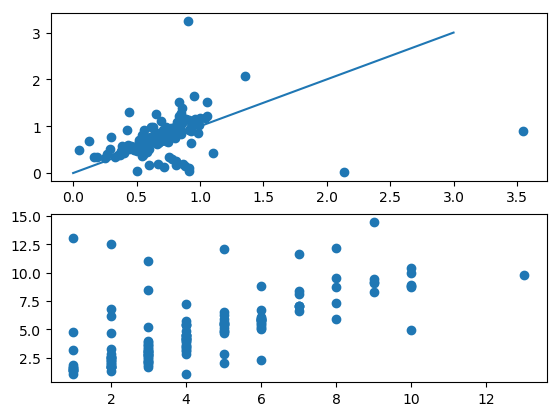

In [89]:
fig,(ax,ax1) = plt.subplots(2)

print(len(trimmed_df['Latency']))
ax.scatter(trimmed_df['Latency'],trimmed_df['AutoLatency'])
ax1.scatter(trimmed_df['Duration'],trimmed_df['AutoDuration'])

ax.plot([0,3],[0,3])
fig.show()

['CB-LB2' 'CB-Orange' 'CB-Red' 'CB-Y2' 'CB-Yellow' 'F2B' 'F2MB' 'F2NL'
 'F2PO' 'FDMW' 'FGBD' 'FGHB' 'FGNP' 'FGOG' 'FGRN' 'FGWL' 'FGWO' 'FLG'
 'FLN' 'FLOL' 'FLPD' 'FLWD' 'FM2N' 'FNM' 'FNMO' 'FNO' 'FNWD' 'FO2P' 'FO2R'
 'FOGO' 'FPG/M' 'FR2D' 'FR2M' 'FRM' 'FROY' 'FWGP' 'FWMW' 'FWRW' 'FYGN'
 'FYR' 'P1' 'PINK2' 'Y1']
F_onewayResult(statistic=4.7861937084600985, pvalue=9.594594392625661e-20)
 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1    group2  meandiff  lower    upper  reject
----------------------------------------------------
  CB-LB2  CB-Orange -6.0862  -8.5935  -3.5789  True 
  CB-LB2    CB-Red  -3.6756   -9.743   2.3919 False 
  CB-LB2    CB-Y2   -4.9055  -7.4356  -2.3755  True 
  CB-LB2  CB-Yellow -3.4527  -6.1206  -0.7849  True 
  CB-LB2     F2B    -4.5359  -9.8945   0.8227 False 
  CB-LB2     F2MB   -5.1727   -7.673  -2.6724  True 
  CB-LB2     F2NL   -6.7859  -14.0668  0.495  False 
  CB-LB2     F2PO   -3.5984  -6.8375  -0.3593  True 
  CB-LB2     FDMW   -6.5359  

3.9105450393477454 1.692447368847251


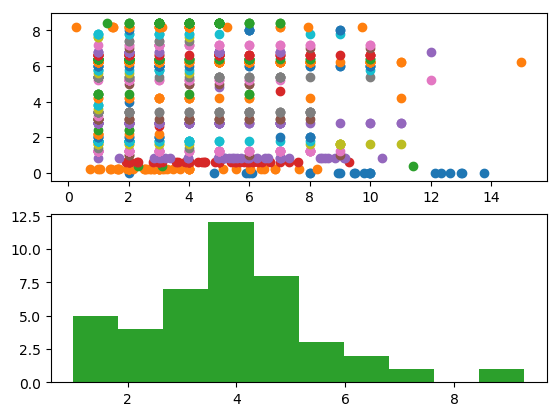

In [21]:
durations_df = pd.read_csv('./durations_df2.csv')
all_bird_list = np.unique(durations_df['Bird'])
duration_lists = []
duration_means = []
print(all_bird_list)
for f in all_bird_list:
    durations_b = durations_df['Duration'][durations_df['Bird'] == f]
    #print(durations_b)
    duration_lists.append(durations_b)
    duration_means.append(np.mean(durations_b))
print(f_oneway(*duration_lists))
print(pairwise_tukeyhsd(durations_df['Duration'],groups=durations_df['Bird']))

fig,(ax,ax1) = plt.subplots(2)
for f in range(len(all_bird_list)):
    ax.scatter(duration_lists[f],[f/5]*len(duration_lists[f]))
    ax1.hist(duration_means)
fig.show()

print(np.nanmean(duration_means),np.nanstd(duration_means))

In [22]:
## Get some values, I should be able to pull these out from the object but I don't know how.
#intercept_l,effect_l,variance_l =  mdf_lat.params
intercept_l,effect_l,variance_l = 0.948,-0.344,0.121
il_low,il_high = 0.754,1.143
el_low,el_high = -0.582,-0.106

## Pulled from full duration set
#intercept_d,effect_d,variance_d =  mdf_dur.params
intercept_d,effect_d,variance_d = 2.857,2.960,1.179
id_high,id_low = 1.876,3.839
ed_high,ed_low = 0.649,5.271

dur_line = np.poly1d([effect_d,intercept_d])
low_dur = np.poly1d([ed_low,id_low])
high_dur = np.poly1d([ed_high,id_high])

lat_line = np.poly1d([effect_l,intercept_l])
low_lat = np.poly1d([el_low,il_low])
high_lat = np.poly1d([el_high,il_high])
"""
fig,(ax,ax1) = plt.subplots(2)
ax.plot([0,1],lat_line([0,1]),color='black',linestyle=':')
ax.plot([0,1],low_lat([0,1]),color='black')
ax.plot([0,1],high_lat([0,1]),color='black')
ax.fill_between([0,1],high_lat([0,1]),low_lat([0,1]),color='gray',alpha=.3)

ax1.plot([0,1],dur_line([0,1]),color='black',linestyle=':')
ax1.plot([0,1],low_dur([0,1]),color='black')
ax1.plot([0,1],high_dur([0,1]),color='black')
ax1.fill_between([0,1],high_dur([0,1]),low_dur([0,1]),color='gray',alpha=.3)
fig.show()"""
pass

In [ ]:
## Plot by individual and overall
fig,(ax,ax1) = plt.subplots(1,2)
bird_list = birdview_meta.bird_list
song_list = birdview_meta.song_list
print(bird_list)
birds_to_plot = [1,2,4,5,6,7,8,9]
xs_bird_all, ys_bird_all,ys_lat_bird_all = [],[],[]
label_birds_all,label_songs_all = [],[]
for f in birds_to_plot:
    bird_df = trimmed_df[trimmed_df['Bird'] == f]
    xs = np.array(bird_df['AvgPotency']).astype(float)
    ys = np.array(bird_df['Duration']).astype(float)
    xs_resp = np.array(bird_df['ResponseRate']).astype(float)
    xs_lat = np.array(bird_df['AvgPotency']).astype(float)
    ys_lat = np.array(bird_df['Latency']).astype(float)

    #xs = xs[~np.isnan(ys)]
    #ys = ys[~np.isnan(ys)]
    #xs_lat = xs_lat[~np.isnan(ys_lat)]
    #ys_lat = ys_lat[~np.isnan(ys_lat)]
    ax1.scatter(xs,ys,marker='.',alpha=.5,color=bird_colors[f])
    ax.scatter(xs_lat,ys_lat,marker='.',alpha=.5,color=bird_colors[f])
    if len(xs) > 0:
        fit_line = np.poly1d(np.polyfit(xs,ys,1))
        #ax1.plot([0,1],fit_line([0,1]),linestyle=':',label='Bird ' + str(f),color=bird_colors[f])
        
    if len(xs_lat) > 0:
        fit_line = np.poly1d(np.polyfit(xs_lat,ys_lat,1))
        #ax.plot([0,1],fit_line([0,1]),linestyle=':',color=bird_colors[f])
    xs_bird, ys_bird,ys_lat_bird = [],[],[]
    resp_bird = []
    label_birds,label_songs = [],[]
    for song in song_list:
        s = birdview_meta.song_dict[song]
        #print(bird_df['Song'])
        bird_song = bird_df[bird_df['Song'] == s]
        if len(bird_song) > 0:
            mean_song_duration = np.nanmean(np.array(bird_song['Duration']).astype(float))
            mean_song_latency = np.nanmean(np.array(bird_song['Latency']).astype(float))
            song_potency = bird_song['AvgPotency'].iloc[0]
            block_response = bird_song['ResponseRate'].iloc[0]
            xs_bird.append(song_potency)
            ys_bird.append(mean_song_duration)
            resp_bird.append(block_response)
            ys_lat_bird.append(mean_song_latency)
            label_birds.append(f)
            label_songs.append(s)
    #print('Duration:',pearsonr(xs_bird,ys_bird))
    #print('Latency:',pearsonr(xs_bird,ys_lat_bird))
    #print('ResponseRate & Duration:',pearsonr(resp_bird,ys_bird))
    #print('ResponseRate & Latency:',pearsonr(resp_bird,ys_lat_bird))
    xs_bird_all.extend(xs_bird)
    ys_bird_all.extend(ys_bird)
    ys_lat_bird_all.extend(ys_lat_bird)
    label_birds_all.extend(label_birds)
    label_songs_all.extend(label_songs)
        
    # I'm plotting duration with respect to relative potency
ax.plot([0,1],lat_line([0,1]),color='black')
#ax.plot([0,1],low_lat([0,1]),color='black')
#ax.plot([0,1],high_lat([0,1]),color='black')
ax.fill_between([0,1],high_lat([0,1]),low_lat([0,1]),color='gray',alpha=.3)

ax1.plot([0,1],dur_line([0,1]),color='black')
#ax1.plot([0,1],low_dur([0,1]),color='black')
#ax1.plot([0,1],high_dur([0,1]),color='black')
ax1.fill_between([0,1],high_dur([0,1]),low_dur([0,1]),color='gray',alpha=.3)

ax.set_xlabel('Song potency (% Response)')
ax.set_ylabel('Latency (s)')
ax.set_ylim([0,1.5])

ax1.set_xlabel('Song Potency')
ax1.set_ylabel('Duration (s)')
#fig.legend()
fig.set_size_inches([10,3])

fig.tight_layout()
if False:
    fig.savefig('/home/ammon/Desktop/PaperFigs/3cd.png',dpi=300)
fig.show()

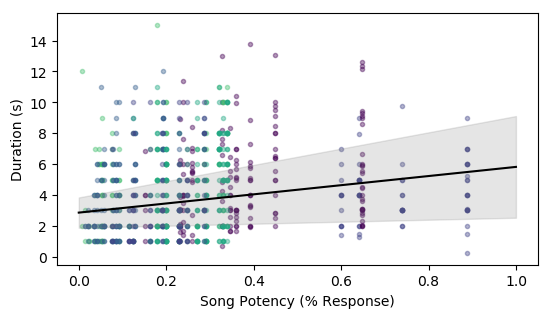

In [24]:
all_bird_list = pd.unique(durations_df['Bird'])
n_all_birds = len(all_bird_list)

fig,ax = plt.subplots()
for b in range(n_all_birds):
    bird_df = durations_df[durations_df['Bird'] == all_bird_list[b]]
    aviary = bird_df['Aviary'].iloc[0]
    aviary_i = aviary_dict[aviary]
    #color = paper_cmap(b/n_all_birds)
    color = aviary_colors[aviary_i]
    ax.scatter(bird_df['AvgPotency'],bird_df['Duration'],marker='.',alpha = .4,color=color,label=aviary)
    ax.plot()

ax.plot([0,1],dur_line([0,1]),color='black')
ax.fill_between([0,1],high_dur([0,1]),low_dur([0,1]),color='gray',alpha=.2)

ax.set_ylabel('Duration (s)')
ax.set_xlabel('Song Potency (% Response)')
#fig.legend()
fig.tight_layout()
fig.set_size_inches(5.5,3)

if False:
    fig.savefig('/home/ammon/Desktop/PaperFigs/fig3d.png',dpi=300)
fig.show()

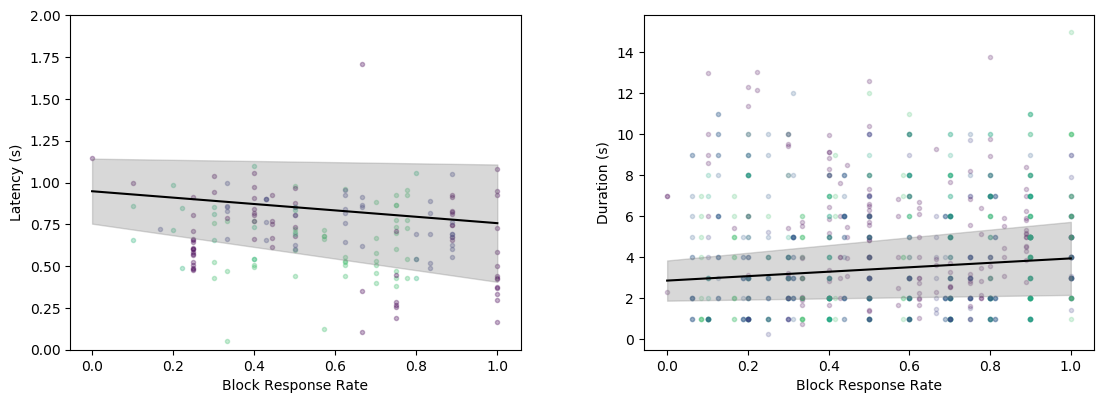

In [51]:
## Get some values for response rate plots
#intercept_l,effect_l,variance_l =  mdf_lat.params
intercept_l,effect_lr,variance_lr = 0.948,-0.191,0.08
il_low,il_high = 0.754,1.143
elr_low,elr_high = -0.348,-0.035

## Pulled from full duration set
#intercept_d,effect_d,variance_d =  mdf_dur.params
intercept_d,effect_dr,variance_dr = 2.857,1.083,0.409
id_high,id_low = 1.876,3.839
edr_high,edr_low = 0.282,1.884

dur_line_r = np.poly1d([effect_dr,intercept_d])
low_dur_r = np.poly1d([edr_low,id_low])
high_dur_r = np.poly1d([edr_high,id_high])

lat_line_r = np.poly1d([effect_lr,intercept_l])
low_lat_r = np.poly1d([elr_low,il_low])
high_lat_r = np.poly1d([elr_high,il_high])

fig,(ax,ax1) = plt.subplots(1,2)

## Plot Duration by individual
for b in range(n_all_birds):
    bird_df = durations_df[durations_df['Bird'] == all_bird_list[b]]
    aviary = bird_df['Aviary'].iloc[0]
    aviary_i = aviary_dict[aviary]
    #color = paper_cmap(b/n_all_birds)
    color = aviary_colors[aviary_i]
    ax1.scatter(bird_df['ResponseRate'],bird_df['Duration'],marker='.',alpha = .2,color=color,label=aviary)

## Plot latency by individual

birds_to_plot = [1,2,4,5,6,7,8,9]
for f in birds_to_plot:
    bird_df = trimmed_df[trimmed_df['Bird'] == f]
    xs_resp = np.array(bird_df['ResponseRate']).astype(float)
    ys_lat = np.array(bird_df['Latency']).astype(float)

    ax.scatter(xs_resp,ys_lat,marker='.',alpha=.3,color=bird_colors[f])
        

ax.plot([0,1],lat_line_r([0,1]),color='black')
ax.fill_between([0,1],high_lat_r([0,1]),low_lat_r([0,1]),color='gray',alpha=.3)   
    
    
ax1.plot([0,1],dur_line_r([0,1]),color='black')
ax1.fill_between([0,1],high_dur_r([0,1]),low_dur_r([0,1]),color='gray',alpha=.3)

ax.set_ylim([0,2.0])
ax.set_xlabel('Block Response Rate')
ax.set_ylabel('Latency (s)')
ax1.set_ylabel('Duration (s)')
ax1.set_xlabel('Block Response Rate')


#fig.legend()

fig.tight_layout()
fig.set_size_inches(12,4)

fig.show()

if True:
    fig.savefig('/home/ammon/Desktop/PaperFigs/fig7d.png',dpi=300)


In [174]:
print(np.nanmean(bv2018_binary[:,:,:,0],axis=(0,1)))
print(np.nanmean(bv2019_binary[:,:,:,0],axis=(0,1)))

[0.4        0.26666667 0.         0.28333333 0.         0.
 0.         0.         0.         0.2       ]
[0.23571429 0.07857143 0.15714286 0.09285714 0.12857143 0.05
 0.12142857 0.14285714 0.11428571 0.08571429]


In [ ]:
bonus_df = pd.DataFrame({
    'Song':label_songs_all,
    'Bird':label_birds_all,
    'Duration':ys_bird_all,
    'Latency':ys_lat_bird_all,
    'AvgPotency':xs_bird_all
})
md_lat = smf.mixedlm("Latency ~ AvgPotency",data=bonus_df,groups=bonus_df["Bird"])
mdf_lat = md_lat.fit()
print(mdf_lat.summary())

md_lat = smf.mixedlm("Duration ~ AvgPotency",data=bonus_df,groups=bonus_df["Bird"])
mdf_lat = md_lat.fit()
print(mdf_lat.summary())


## Figure 3
Relating shape to potency (or not)

In [318]:
print(birdview_meta.bird_list)
print(birdview_binary.shape)


['CB-White', 'CB-Orange', 'CB-Yellow', 'CB-Red', 'CB-LB2', 'CB-Y2', 'CB-R2', 'P1', 'Y1', 'PINK2']
(10, 20, 10, 3)


In [67]:
# This links to figure 7, in fact a lot of these plots are for that
# Seq height and vmax are easy enough, and song potency is easy peasy, just build the df, make a plot, done

print(birdview_array.shape)
vmax_list,peak_list = [],[]
stable_list,mean_list = [],[]
r_list,f_list = [],[]
bl_list,s_list,y_list = [],[],[]
pot_list,rpot_list = [],[]
song_potency = np.nanmean(birdview_binary[:,:,:,0],axis=(0,1))
song_potency2018 = np.nanmean(bv2019_binary[:,:,:,0],axis=(0,1))
print(song_potency)
#song_potency = song_potency[np.argsort(song_potency)[::-1]]
#print(song_potency)
print(birdview_meta.song_dict)
print(birdview_meta.bird_dict)
rpot_dict = {}
rpot_list = []

bcor_dict = {
    'CB-LB2':.1,
    'CB-Orange':.3,
    'CB-Y2':.5,
    'CB-Yellow':.7
}

for b in range(len(birdview_meta.bird_list)):
    bird = birdview_meta.bird_list[b]
    rpot_dict[bird] = np.nanmean(birdview_binary[b,:,:,0],axis=0)
for i,row in test_3.iterrows():
    if '2017' in row['SeqName']:
        continue
    try:
        seq = pickle.load(open('./SeqClasses/' + row['SeqName'] + '.obj','rb'))
    except:
        #print('skipping',row['SeqName'])
        continue
    if seq.posture != 1 or seq.offset == 0:
        continue
    if 1 in np.isnan(seq.smooth_data[:,10,2]):
        continue
    if '-' in seq.song or seq.song[0] == 'm':
        continue
    if seq.bird not in birdview_meta.bird_dict.keys():
        continue
    if '2018' in row['SeqName']:
        year = 2018
    elif '2019' in row['SeqName']:
        year = 2019
    else:
        year = 0
    bird_index = birdview_meta.bird_dict[seq.bird]
    block_index = int(seq.block)
    song_index = birdview_meta.song_dict[seq.song]
    response_rate = np.nanmean(birdview_binary[bird_index,block_index,:,0])
    if np.isnan(response_rate) or response_rate == 0:
        print('skpping:',response_rate)
        continue
    r_list.append(response_rate) 
    f_list.append(bird_index)
    bl_list.append(block_index)
    s_list.append(song_index)
    y_list.append(year)
    peak_range = (seq.ts > seq.t_vmax) & (seq.ts < seq.t_refraction)
    mean_list.append(np.nanmean(seq.smooth_data[peak_range,10,2]))
    vmax_list.append(seq.vmax * 1000)
    peak_list.append(seq.peak_height)
    stable_list.append(seq.smooth_data[seq.stable_vel_index,10,2])
    pot_list.append(song_potency[song_index])    
    rpot_list.append(rpot_dict[seq.bird][song_index])

shape_df = pd.DataFrame({'AvgPotency':pot_list,
             'RelPotency':rpot_list,
             'ResponseRate':r_list,
             'MaxVelocity':vmax_list,
             'PeakHeight':peak_list,
             'StableHeight':stable_list,
             'MeanHeight':mean_list,
             'Bird':f_list,
             'Block':bl_list,
             'Song':s_list,
             'Year':y_list})


md = smf.mixedlm("StableHeight ~ ResponseRate",data=shape_df,groups=shape_df['Bird'])
mdf = md.fit()
print(mdf.summary())

md = smf.mixedlm("MaxVelocity ~ RelPotency",data=shape_df,groups=shape_df['Bird'])
mdf1 = md.fit()
print(mdf1.summary())

md = smf.mixedlm("MaxVelocity ~ AvgPotency",data=shape_df,groups=shape_df['Bird'])
mdf2 = md.fit()
print(mdf2.summary())

md = smf.mixedlm("MaxVelocity ~ ResponseRate",data=shape_df,groups=shape_df['Bird'])
mdf3 = md.fit()
print(mdf3.summary())

#shape_df.to_csv('shape_df.csv',index=False)

(10, 20, 10, 3)
[0.73333333 0.43478261 0.44897959 0.42028986 0.36       0.15217391
 0.34693878 0.39215686 0.32653061 0.35294118]
{'BDY': 0, 'BOD': 1, 'ND': 2, 'LB': 3, '2M': 4, 'DBR': 5, 'GRG': 6, 'WG': 7, 'LNR': 8, 'DMG': 9}
{'CB-White': 0, 'CB-Orange': 1, 'CB-Yellow': 2, 'CB-Red': 3, 'CB-LB2': 4, 'CB-Y2': 5, 'CB-R2': 6, 'P1': 7, 'Y1': 8, 'PINK2': 9}
skpping: 0.0
skpping: 0.0
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: StableHeight
No. Observations: 145     Method:             REML        
No. Groups:       8       Scale:              0.0030      
Min. group size:  1       Likelihood:         198.4333    
Max. group size:  37      Converged:          Yes         
Mean group size:  18.1                                    
-----------------------------------------------------------
              Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept     0.235     0.033  7.022  

(array([0.15217391, 0.32653061, 0.34693878, 0.35294118, 0.36      ,
       0.39215686, 0.42028986, 0.43478261, 0.44897959, 0.73333333]), array([ 7,  9, 12, 17, 11, 11, 18, 20, 10, 30]))
(array([0.        , 0.11111111, 0.14285714, 0.16666667, 0.27272727,
       0.33333333, 0.36363636, 0.375     , 0.4       , 0.44444444,
       0.5       , 0.54545455, 0.55555556, 0.6       , 0.66666667,
       0.7       , 0.71428571, 0.77777778, 0.8       , 0.85714286,
       0.875     , 0.90909091, 0.91666667, 1.        ]), array([ 2,  3,  1,  1, 10,  2,  5,  4,  9,  7, 10,  2, 19,  9, 16,  5,  4,
        2,  8,  5,  3,  2,  9,  7]))


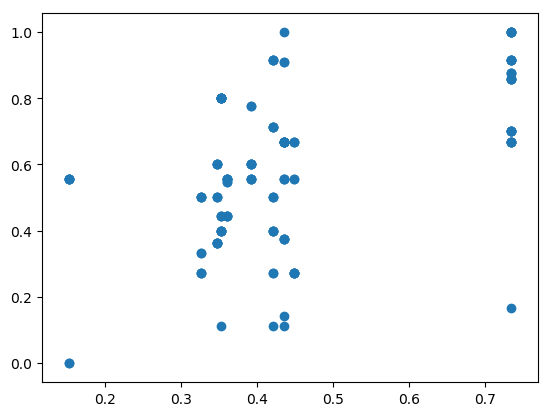

In [68]:
print(np.unique(shape_df['AvgPotency'],return_counts=True))
print(np.unique(shape_df['RelPotency'],return_counts=True))

fig,ax = plt.subplots()
ax.scatter(shape_df['AvgPotency'],shape_df['RelPotency'])
fig.show()

In [72]:
print(bcor_dict)

{'CB-LB2': 0.1, 'CB-Orange': 0.3, 'CB-Y2': 0.5, 'CB-Yellow': 0.7}


F_list): [1 2 3 4 5 7 8 9]
short one, skipping
Empty DataFrame
Columns: [AvgPotency, RelPotency, ResponseRate, MaxVelocity, PeakHeight, StableHeight, MeanHeight, Bird, Block, Song, Year]
Index: []
short one, skipping
Empty DataFrame
Columns: [AvgPotency, RelPotency, ResponseRate, MaxVelocity, PeakHeight, StableHeight, MeanHeight, Bird, Block, Song, Year]
Index: []


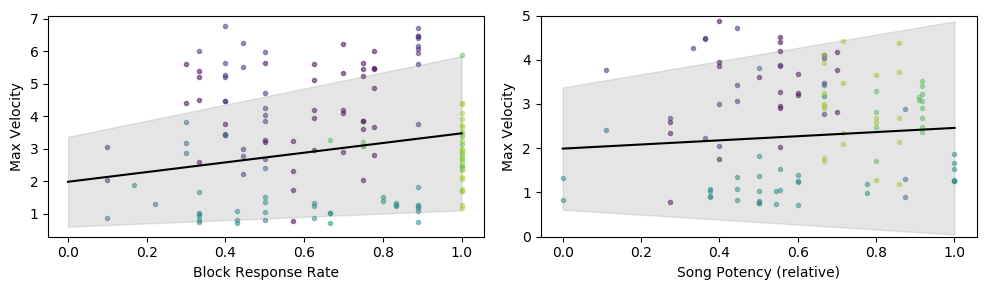

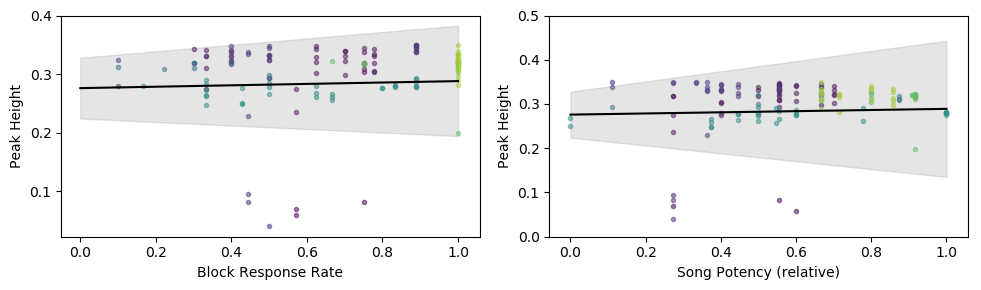

In [91]:
### Plot the above stats stuff
fig,(ax2,ax) = plt.subplots(1,2)

fig2,(ax3,ax1) = plt.subplots(1,2)

e_alpha = .2
print('F_list):',np.unique(f_list))
for f in range(len(np.unique(f_list))):
    
    female = np.unique(f_list)[f]
    female_df = shape_df[shape_df['Bird'] == female]
    if len(female_df) < 5:
        print('short one, skipping')
        print(female_df)
        continue
    vs = female_df['MaxVelocity']
    rs = female_df['ResponseRate']
    ps = female_df['PeakHeight']
    ss = female_df['RelPotency']
    
    ## Plot velocity vs potency
    ax.scatter(ss,vs,marker='.',alpha=.5,color=cm.viridis(f / len(np.unique(f_list))))
    fit_line = np.poly1d(np.polyfit(ss,vs,1))
    #ax.plot([0,1],fit_line([0,1]),color=cm.viridis(f / len(np.unique(f_list))),linestyle=':')
    ax.set_xlabel('Song Potency (relative)')
    ax.set_ylabel('Max Velocity')
    
    ## Plot peak vs potency
    ax1.scatter(ss,ps,marker='.',alpha=.5,color=cm.viridis(f / len(np.unique(f_list))))
    fit_line = np.poly1d(np.polyfit(ss,ps,1))
    #ax1.plot([0,1],fit_line([0,1]),color=cm.viridis(f / len(np.unique(f_list))),linestyle=':')
    ax1.set_xlabel('Song Potency (relative)')
    ax1.set_ylabel('Peak Height')
    
    ## Plot velocity vs response rate
    ax2.scatter(rs,vs,marker='.',alpha=.5,color=cm.viridis(f / len(np.unique(f_list))))
    fit_line = np.poly1d(np.polyfit(rs,vs,1))
    #ax2.plot([0,1],fit_line([0,1]),color=cm.viridis(f / len(np.unique(f_list))),linestyle=':')
    ax2.set_xlabel('Block Response Rate')
    ax2.set_ylabel('Max Velocity')
    
    ## Plot peak vs response rate
    ax3.scatter(rs,ps,marker='.',alpha=.5,color=cm.viridis(f / len(np.unique(f_list))))
    fit_line = np.poly1d(np.polyfit(rs,ps,1))
    #ax3.plot([0,1],fit_line([0,1]),color=cm.viridis(f / len(np.unique(f_list))),linestyle=':')
    ax3.set_xlabel('Block Response Rate')
    ax3.set_ylabel('Peak Height')



# VMAX
intercept = 1.991
int_low,int_high = [0.610,3.373]

##vmax:potency
effect = 0.468
eff_low,eff_high = [-0.559,1.495]
"""intercept,effect,_ = mdf.params
int_low,int_high = [0.002,0.006]
eff_low,eff_high = [-0.001,0.001]"""

fit_line = np.poly1d([effect,intercept])
low_line = np.poly1d([eff_low,int_low])
high_line = np.poly1d([eff_high,int_high])

ax.plot([0,1],fit_line([0,1]),color='black')
ax.fill_between([0,1],high_line([0,1]),low_line([0,1]),color='gray',alpha=e_alpha)

#vmax_rate
"""intercept,effect,_ = mdf2.params
int_low,int_high = [0.002,0.005]
eff_low,eff_high = [0.001,0.002]"""
effect = 1.490
eff_low,eff_high = [0.501,2.480]

fit_line = np.poly1d([effect,intercept])
low_line = np.poly1d([eff_low,int_low])
high_line = np.poly1d([eff_high,int_high])

ax2.plot([0,1],fit_line([0,1]),color='black')
ax2.fill_between([0,1],high_line([0,1]),low_line([0,1]),color='gray',alpha=e_alpha)

## Height (rel or avg potency?)
#intercept = 0.198
#int_low,int_high = [0.124,0.271]
intercept = 0.276
int_low,int_high = [0.224,0.328]
# height: avg_pot
effect = 0.013
eff_low,eff_high = -0.089,0.115

"""intercept,effect,_ = mdf1.params
int_low,int_high = [0.232,0.317]
eff_low,eff_high = [-0.008,0.104]"""

fit_line = np.poly1d([effect,intercept])
low_line = np.poly1d([eff_low,int_low])
high_line = np.poly1d([eff_high,int_high])

ax1.plot([0,1],fit_line([0,1]),color='black')
ax1.fill_between([0,1],high_line([0,1]),low_line([0,1]),color='gray',alpha=e_alpha)

#height_rate
effect = 0.012
eff_low,eff_high = -0.030,0.055
"""intercept,effect,_ = mdf3.params
int_low,int_high = [0.266,0.330]
eff_low,eff_high = [-0.036,0.050]"""

fit_line = np.poly1d([effect,intercept])
low_line = np.poly1d([eff_low,int_low])
high_line = np.poly1d([eff_high,int_high])

ax3.plot([0,1],fit_line([0,1]),color='black')
ax3.fill_between([0,1],high_line([0,1]),low_line([0,1]),color='gray',alpha=e_alpha)


ax.set_ylim([0,5])
ax1.set_ylim([0,.5])

fig.set_size_inches([10,3])
fig2.set_size_inches([10,3])
fig.tight_layout()
fig2.tight_layout()
fig.show()
fig2.show()

In [83]:
for i in pd.unique(shape_df['Bird']):
    if len(shape_df[shape_df['Bird'] == i]) <= 5:
        print(i)
        shape_df.drop(shape_df[shape_df['Bird'] == i].index,inplace=True)
        
print(pd.unique(shape_df['Bird']))

7
3
[8 4 5 2 1 9]


In [ ]:
# mm / frame = mm / (1/fs)s = 44000 * mm / s * 1m/1000mmm
# I might need to normalize this based on frame, 
# since I think birdview2 is a different framerate
print(1.660 * 50/1000)
print(1.15 * 50/1000)

print(-0.564 * 50/1000)
print(1.248 * 50/1000)
#-0.564    1.248 -0.452 0.651 -3.009  1.881

print(len(seq.ts))
print((seq.ts[-1]-seq.ts[0])/len(seq.ts))
print(1/0.01998)

## Figure 5
Does selectivity change? (Fig 4 is a drawing)

(-0.2806188924699026, 2.6851657954324688e-17)
(-0.15379202739107486, 0.00012387563231609485)
(0.13671370236285793, 0.031037875318867796)
618 249
(0.21844857734636014, 3.056071930878991e-05)


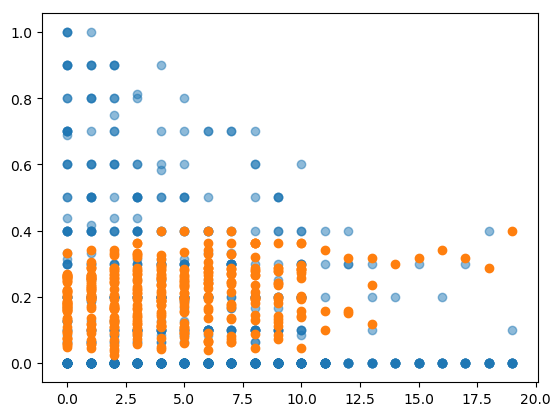

In [239]:
block_list = []
rate_list = []
potency_list = []
for a in range(len(all_aviaries)):
    daviary = all_aviaries[a][:,:,:,0]
    binary_dave = np.array(daviary)
    binary_dave[binary_dave != 1] = 0
    potency_scores = np.nanmean(binary_dave,axis=(0,1))
    n_blocks = daviary.shape[1]
    n_birds = daviary.shape[0]
    for f in range(n_birds):
        block_list.extend(range(n_blocks))
        rate_list.extend(np.nanmean(binary_dave[f],1))
        block_potency = binary_dave[f] * potency_scores
        block_potency[block_potency == 0] = np.nan
        potency_list.extend(np.nanmean(block_potency,1))
        
fig,ax = plt.subplots()
ax.scatter(block_list,rate_list,alpha=.5)
ax.scatter(block_list,potency_list)
block_array = np.array(block_list)
rate_array = np.array(rate_list)
potency_array = np.array(potency_list)
potency_array_sub = potency_array[(block_array >= 2) & (block_array <= 10)]
rate_array_sub = rate_array[(block_array >= 2) & (block_array <= 10)]
block_array_sub = block_array[(block_array >= 2) & (block_array <= 10)]
print(pearsonr(block_list,rate_list))
print(pearsonr(block_array_sub,rate_array_sub))
print(pearsonr(block_array_sub[~np.isnan(potency_array_sub)],potency_array_sub[~np.isnan(potency_array_sub)]))
print(len(block_array_sub),len(potency_array_sub[~np.isnan(potency_array_sub)]))
print(pearsonr(np.array(block_list)[~np.isnan(potency_list)],np.array(potency_list)[~np.isnan(potency_list)]))
fig.show()


(8, 11, 10)
[False  True  True False  True  True  True  True]
(11, 10)


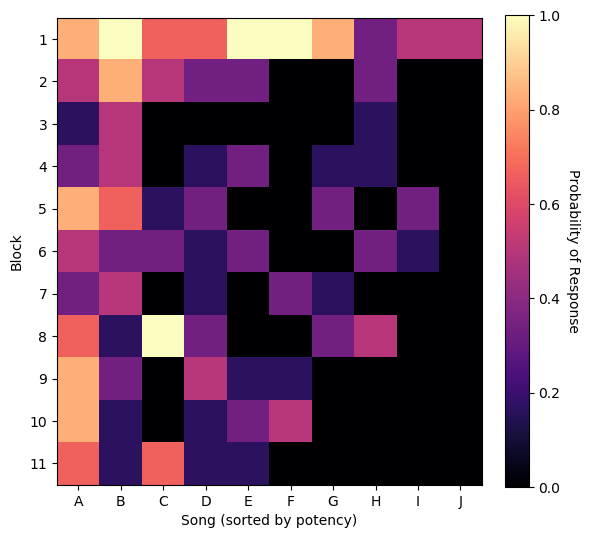

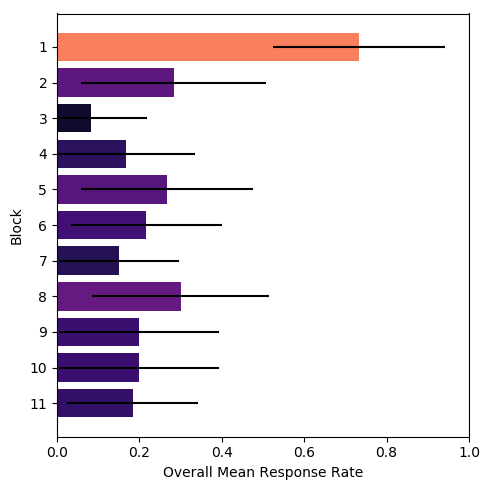

In [14]:
## Plot example plots for fig 5: 

#plt.style.use('dark_background')

daviary = all_aviaries[2][:,:,:,0]
n_blocks = daviary.shape[1]
song_order = np.argsort(np.nanmean(daviary,axis=(0,1)))[::-1]
n_birds = daviary.shape[0]
print(daviary.shape)
active_birds = np.nanmean(daviary,axis=(1,2)) > .05
print(active_birds)
heat_map = np.nanmean(daviary[active_birds,:][:,:,song_order],axis=(0))
print(heat_map.shape)
fig,ax= plt.subplots()
block_map = ax.imshow(heat_map,vmax=1.0,vmin=0,cmap='magma')
ax.set_xlabel('Song (sorted by potency)')
ax.set_ylabel('Block')
#ax.set_title('Response rate (averaged across birds)\n')

#print(heat_map)
ax.set_xticks(np.arange(heat_map.shape[1]))
ax.set_xticklabels(['A','B','C','D','E','F','G','H','I','J'])

ax.set_yticks(np.arange(heat_map.shape[0]))
ax.set_yticklabels(np.arange(1,heat_map.shape[0] + 1))
cbar = fig.colorbar(block_map,ax=ax,fraction=0.05)
cbar.ax.set_ylabel('Probability of Response', rotation=-90, va="bottom")
fig.set_size_inches([6,6])
fig.tight_layout()
fig.savefig('./figures/resp_rate_heatmap_dark.png',dpi=300)
fig.show()

fig1,ax1 = plt.subplots()
bar_std = np.nanstd(daviary[active_birds],axis=(0,2)) / np.sqrt(active_birds.sum())
bar_mean = np.nanmean(daviary[active_birds],axis=(0,2))
#print(bar_mean,bar_std)
song_std = np.nanstd(daviary[active_birds],axis=(0,1)) / np.sqrt(active_birds.sum())
song_mean = np.nanmean(daviary[active_birds],axis=(0,1))

ax1.barh(np.arange(1,1+n_blocks)[::-1],bar_mean,xerr=bar_std,color=cm.magma(bar_mean),ecolor='black')
ax1.set_yticks(range(1,1+n_blocks))
ax1.set_yticklabels(np.arange(1,1+n_blocks)[::-1])
ax1.set_ylabel('Block')
ax1.set_xlabel('Overall Mean Response Rate')
#ax1.set_title('General response rate changes over playbacks')
ax1.set_xlim([0,1])
fig1.set_size_inches(5,5)
fig1.tight_layout()
fig1.savefig('./figures/resp_rate_bars_dark.png',dpi=300)
fig1.show()

#fig2,ax2 = plt.subplots()

#song_order = np.argsort(song_mean)[::-1]
"""
ax2.bar(['A','B','C','D','E','F','G','H','I','J'],song_mean[song_order],yerr=song_std[song_order],color=cm.magma(song_mean[song_order] + .2),ecolor='white')
ax2.set_ylim([0,1])
ax2.set_ylabel('Response Rate')
ax2.set_xlabel('Song')
fig2.set_size_inches(6,4)
fig2.tight_layout()
fig2.show()
fig2.savefig('./figures/Song_response_rate_dark.png',dip=300)"""
pass

In [18]:
print(active_birds.sum())
print(np.shape(heat_map))

6
(11, 10)


In [212]:
## Some stats for above plots: 

print(f_oneway(*heat_map))
groups = np.array([[n] * 10 for n in range(11)])

print(pairwise_tukeyhsd(heat_map.flatten(),groups.flatten()))

F_onewayResult(statistic=4.701613129471171, pvalue=1.722060261147028e-05)
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.3583  -0.6879 -0.0288  True 
  0      2    -0.5083  -0.8379 -0.1788  True 
  0      3    -0.5417  -0.8712 -0.2121  True 
  0      4    -0.4083  -0.7379 -0.0788  True 
  0      5    -0.4083  -0.7379 -0.0788  True 
  0      6    -0.4917  -0.8212 -0.1621  True 
  0      7    -0.4333  -0.7629 -0.1038  True 
  0      8     -0.525  -0.8545 -0.1955  True 
  0      9    -0.4917  -0.8212 -0.1621  True 
  0      10    -0.525  -0.8545 -0.1955  True 
  1      2     -0.15   -0.4795  0.1795 False 
  1      3    -0.1833  -0.5129  0.1462 False 
  1      4     -0.05   -0.3795  0.2795 False 
  1      5     -0.05   -0.3795  0.2795 False 
  1      6    -0.1333  -0.4629  0.1962 False 
  1      7     -0.075  -0.4045  0.2545 False 
  1      8    -0.1667  -0.4962  0.1629 False 
 

In [19]:
# Calculate and plot Fig 5c
#plt.style.use('default')
#plt.style.use('dark_background')

## Need to save these into a database, so that I can keep them and feed them into a mixed model. 

#levene([1,0,1,0,1,0,1,0,1],[1,1,1,1,1,1,1,1,1])
#print(binary_array3.shape)
#print(daviary.shape)

all_song_rates,top_song_rates = [],[]
columns_s = ['All_ResponseRate','S1_ResponseRate','Aviary','Block','SongSet']
columns_sb = ['ResponseRate','Posture','AvgPotency','Bird','Block','Song','Aviary','SongSet']
song_sets = [0,0,0,1,2,0,0]

song_df = pd.DataFrame(columns=columns_s)
song_bird_df = pd.DataFrame(columns=columns_sb)
max_song_df = pd.DataFrame(columns=columns_sb)
for a in range(len(all_aviaries)):
    #print(all_metas[a].n_birds)
    
    daviary = np.array(all_aviaries[a][:,:,:,0])
    daviary[daviary == 2] = 0 
    d_potency = np.nanmean(daviary,axis=(0,1))
    top_song_index = np.argmax(np.nanmean(daviary,axis=(0,1)))

    top_song_index = np.argmax(np.nanmean(daviary,axis=(0,1)))
    not_top_indices = np.arange(daviary.shape[2]) != top_song_index
    
    ys = np.nanmean(daviary[:,:,not_top_indices],axis=(0,2))
    top_ys = np.nanmean(daviary[:,:,top_song_index],axis=0)

    ## Plot the weights (first non-controlled)
    ## Normalize by top song
    weights = np.nanmean(daviary,axis=0)
    top_song_weights = weights[:,top_song_index]

    all_song_rates.extend(ys)
    top_song_rates.extend(top_ys)
    n_birds = all_metas[a].n_birds
    n_songs = all_metas[a].n_songs
    for b in range(len(ys)):
        #print(a,b)
        song_df = song_df.append(dict(zip(columns_s,[ys[b],top_ys[b],a,b,song_sets[a]])),ignore_index=True)
        for f in range(n_birds):

            bird = all_metas[a].bird_list[f]
            for s in range(n_songs):
                fs_response = np.nanmean(daviary[f,b,:][np.arange(n_songs) != s])
                if np.isnan(daviary[f,b,s]):
                    continue
                f_posture = daviary[f,b,s]
                song = all_metas[a].song_list[s]
                if a>=2:
                    song = song[1:]
                song_bird_df = song_bird_df.append(dict(zip(columns_sb,
                                            [fs_response,f_posture,d_potency[s],bird,b,song,a,song_sets[a]])),ignore_index=True)
                if s == top_song_index:
                    max_song_df = max_song_df.append(dict(zip(columns_sb,
                                            [fs_response,f_posture,d_potency[s],bird,b,song,a,song_sets[a]])),ignore_index=True)
    if False:
        fig,(ax1,ax2) = plt.subplots(2,sharex=True)
        ax1.bar(range(len(ys)),top_ys,alpha = .5,label='Top Song')
        ax1.bar(range(len(ys)),ys,label='All other songs')
        ax1.legend()
        for s in range(daviary.shape[2]):
            ax2.plot(range(len(weights[:,s])),weights[:,s])
        ax2.set_xlabel('Block')
        ax1.set_ylabel('Mean Response Rate')
        ax2.set_ylabel('Mean Response Rate \n(by song)')
        fig.set_size_inches(6,4)
        fig.show()


#print(np.unique(top_song_rates),np.unique(all_song_rates))

song_df.to_csv('./song_df.csv',index=False)
song_bird_df = song_bird_df.dropna()
song_bird_df.to_csv('./song_bird_df.csv',index=False)

max_song_df = max_song_df.dropna()
max_song_df.to_csv('./max_song_df.csv',index=False)

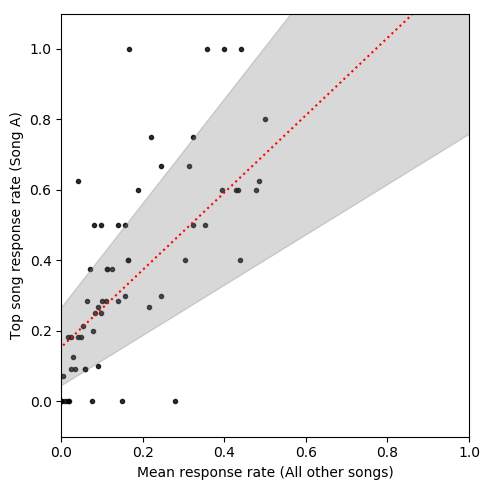

In [20]:
#plt.rcParams.update({'font.size': 12})
#plt.rcParams.update({'axes.labelweight':'bold'})
rate_effect,rate_intercept = 1.096,0.154
intercept_range = [0.044,0.265]
effect_range = [0.713,1.479]


fig,ax = plt.subplots()
#fit_line = np.poly1d(np.polyfit(top_song_rates,all_song_rates,1))
effect_line = np.poly1d([rate_effect,rate_intercept])
effect_low = np.poly1d([effect_range[0],intercept_range[0]])
effect_high = np.poly1d([effect_range[1],intercept_range[1]])

ax.scatter(all_song_rates,top_song_rates,color='black',alpha=.8,marker='.')

x_range = np.linspace(-0.2,1.2,10)
ax.plot(x_range,effect_line(x_range),color='red',linestyle=':')


ax.fill_between(x_range,effect_low(x_range),effect_high(x_range),color='gray',alpha=.3)
ax.set_ylabel('Top song response rate (Song A)')
ax.set_xlabel('Mean response rate (All other songs)')
#ax.set_title('Top song response rate correlates with overall response rate\n')
#print(pearsonr(all_song_rates,top_song_rates))
ax.set_xlim([0,1.0])
ax.set_ylim([-0.1,1.1])
fig.set_size_inches(5,5)
fig.tight_layout()

fig.savefig('./figures/top_song_vs_avg_dark.png',dpi=300)
fig.show()

In [32]:
print(sum(~np.isnan(top_song_rates)))
print(len(all_song_rates))

64
90


In [28]:
## Fig 5d: Does early selectivity correlate with late selectivity? 
## Block1 vs Rest: 1 significant, 2 nearly significant, but not quite. Pearson is better
## Block1-3 vs Rest: 3/5 significant
## Block1-2 vs Rest: 3/5 Significant, nicer numbers

plt.style.use('default')

columns_b = ['B1_Rate','Later_Rate','AvgPotency','Song','Aviary','SongSet']
columns_bf = ['B1_Posture','Later_Rate','AvgPotency','Bird','Song','Aviary','SongSet']
block_df = pd.DataFrame(columns=columns_b)
f_block_df = pd.DataFrame(columns=columns_bf)
## Rank or straight correlation:
xs,ys = [],[]
song_sets = [0,0,0,1,2,0,0]
for d in range(len(all_aviaries)):
    daviary = np.array(all_aviaries[d][:,:,:,0])
    
    daviary[daviary == 2] = 0
    
    d_potency = np.nanmean(daviary,axis=(0,1))
    s_set = song_sets[d]
    i = 1 ## Starting index (could be 2, could be 4, etc)
    block1_rank = np.nanmean(daviary[:,0,:],axis=(0))
    overall_rank = np.nanmean(daviary[:,i:,:],axis=(0,1))
    overall_bird_rank = np.nanmean(daviary[:,i:,:],axis=1)
    xs.extend(block1_rank)
    ys.extend(overall_rank)
    #print(overall_rank)                       
    #print(block1_rank)
    n_females = all_metas[d].n_birds
    #print(spearmanr(overall_rank,block1_rank))
    print(pearsonr(block1_rank,overall_rank))
    for s in range(len(block1_rank)):
        song=all_metas[d].song_list[s]
        if d>=2:
            song = song[1:]
        block_df = block_df.append(dict(zip(columns_b,
                                [block1_rank[s],overall_rank[s],d_potency[s],song,d,s_set])),ignore_index=True)
        for f in range(n_females):
            bird = all_metas[d].bird_list[f]
            posture_zero = daviary[f,0,s]
            bs_rate = overall_bird_rank[f,s]
            f_block_df = f_block_df.append(dict(zip(columns_bf,
                                    [posture_zero,bs_rate,d_potency[s],bird,song,d,s_set])),ignore_index=True)
        
#fit_line = np.poly1d(np.polyfit(xs,ys,1))

#print('overall:',pearsonr(xs,ys))


block_df = block_df.dropna()
block_df.to_csv('./block_df.csv',index=False)

f_block_df = f_block_df.dropna()
f_block_df.to_csv('./f_block_df.csv',index=False)

(nan, 1.0)
(0.3242763549743184, 0.36064933062205856)
(0.45430425769508537, 0.18716841756021962)
(0.5012182708693598, 0.09690907960382465)
(0.5424637313299459, 0.029931036263254295)
(0.08252888924704503, 0.820692644248156)
(0.6215246052176583, 0.055080652203629635)


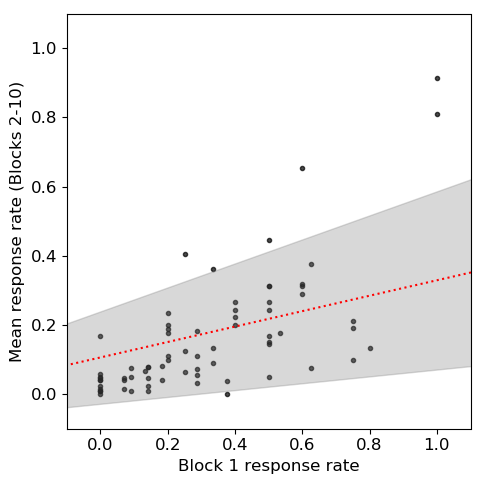

In [29]:

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'axes.labelweight':'normal'})

fig,ax = plt.subplots()

ax.scatter(xs,ys,color='black',alpha=.7,marker='.')

effect,intercept = [0.223,0.106]
effect_low,effect_high = [0.099,0.347]
intercept_low,intercept_high = [-0.028,0.239]
fit_line = np.poly1d([effect,intercept])
low_line = np.poly1d([effect_low,intercept_low])
high_line = np.poly1d([effect_high,intercept_high])

x_range = [-0.2,1.2]
ax.plot(x_range,fit_line(x_range),color='red',linestyle=':')
ax.fill_between(x_range,low_line(x_range),high_line(x_range),color='gray',alpha=.3)
ax.set_xlabel('Block 1 response rate')
ax.set_ylabel('Mean response rate (Blocks 2-10)')
ax.set_xlim([-.1,1.1])
ax.set_ylim([-.1,1.1])
#ax.set_title('Song CSD-rate stay largely consistent following first block\n')
fig.set_size_inches(5,5)

fig.tight_layout()
fig.savefig('./figures/csd_rate_correlation_dark.png',dpi=300)
fig.show()

In [30]:
print(np.sum(~np.isnan(xs)))

70


## Figure 6
Partial postures

In [278]:
np.unique(all_aviaries[0][:,:,:,0])

array([ 0.,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

(3, 20, 10, 3)
(0.5131613613500038, 0.3765541591349504)
[0.5, 0.6666666666666666, 0.5, 0.6666666666666666, 0.0] [0.834096109839817, 0.9166666666666666, 0.8260869565217391, 0.8421052631578947, 0.8260869565217391]
(7, 20, 10, 3)
(-0.6149159887716074, 0.0004976447493318345)
[0.9, 0.0, 0.0, 0.5714285714285714, 0.75, 0.625, 0.3333333333333333, 0.4, 0.5, 0.8888888888888888, 0.5, 0.1, 0.0, 0.4444444444444444, 0.2, 0.0, 0.1, 0.4, 0.2, 0.1, 0.2, 0.8888888888888888, 0.3333333333333333, 0.625, 0.3333333333333333, 0.5, 0.42857142857142855, 0.5] [0.39215686274509803, 0.4422692153784591, 0.4489795918367347, 0.23076923076923078, 0.39215686274509803, 0.26, 0.3057666143380429, 0.36, 0.36, 0.15217391304347827, 0.34222919937205654, 0.26, 0.4044897959183673, 0.39215686274509803, 0.3469387755102041, 0.6470588235294118, 0.5480192076830732, 0.28885400313971743, 0.31564364876385337, 0.39215686274509803, 0.3469387755102041, 0.15217391304347827, 0.3403948535936113, 0.25608695652173913, 0.2654767592655791, 0.26,

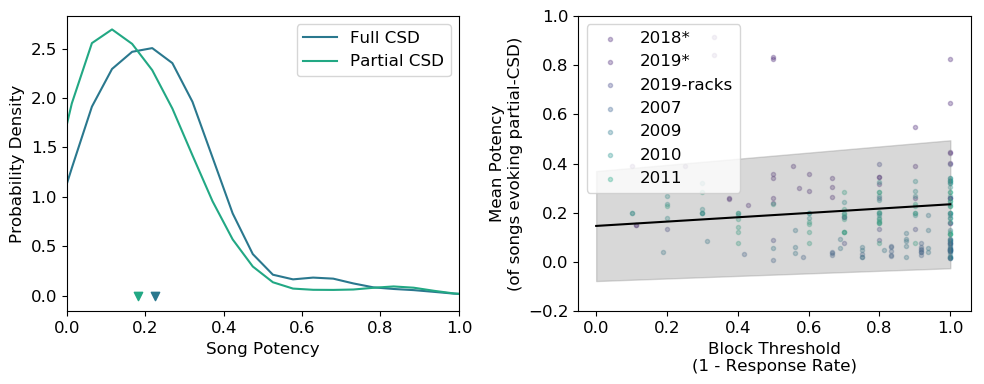

In [39]:
## Check whether partials correlate with reponse rate for Fig 6

#all_aviaries = daviaries.extend([birdview_array,bv3_array])
#all_metas = dmetas.extend([birdview_meta,bv3_meta])

aviary_color_values = [.1,.1,.2,.3,.4,.5,.6,.7,.8]
aviary_colors = [paper_cmap(v) for v in aviary_color_values]

plot_aviary_names = [
    '2018*',
    '2019*',
    '2019-racks',
    '2007',
    '2009',
    '2010',
    '2011'
]
xs_all,ys_all = [],[]
all_partials,all_postures = [],[]
all_nons = []
#all_durations = []
ys_rel = []

fig,(ax1,ax) = plt.subplots(1,2)

columns = ["ResponseRate","N_Partials","RelPotency","AvgPotency","Bird","Block","Aviary","SongSet","Threshold"]
columns2 = ["ResponseRate","Duration","LogDuration","RelPotency","AvgPotency","Bird","Block","Song","Aviary","SongSet"]
columns_csd = ["Partial_CSD","AvgPotency","Bird","Block","ResponseRate","Song","Aviary","SongSet"]

partials_df = pd.DataFrame(columns=columns)
durations_df = pd.DataFrame(columns=columns2)
csd_df = pd.DataFrame(columns=columns_csd)
"""
partials_df = pd.DataFrame({
    "ResponseRate":[],
    "RelPotency":[],
    "AvgPotency":[],
    "Bird":[],
    "Block":[],
    "Aviary":[]
    })
"""
song_sets = [0,0,0,1,2,0,0]
for d in range(len(all_aviaries)):

    xs,ys,no_partials = [],[],[]
    ys_rel = []
## pull out block response rate and mean potency of partial songs:
    daviary = np.array(all_aviaries[d])
    #print(daviary[:,:,:,0] == 2)
    print(daviary.shape)
    #print(np.unique(daviary[:,:,:,0]))
    meta = all_metas[d]
    binary_dave = all_binary[d]
    dave_potency = np.nanmean(binary_dave[:,:,:,0],axis=(0,1))
    dave_potency = dave_potency # / np.max(dave_potency)
    aviary_name = plot_aviary_names[d] #meta.name
    #xs,ys,no_partials = [],[],[]
    for f in range(meta.n_birds):
        female = meta.bird_list[f]
        rel_potency = np.nanmean(binary_dave[f,:,:,0],0)
        #print(max(rel_potency))
        for b in range(meta.n_blocks):
            #print(f,b)
            block_r = np.nanmean(binary_dave[f,b,:,0])# / np.max(dave_potency)
            block_partials = [daviary[f,b,:,0] == 2]
            n_block_partials = np.sum(block_partials)
            block_non = [daviary[f,b,:,0] == 0]
            mean_duration = np.mean(daviary[f,b,:,2][daviary[f,b,:,0] == 1])
            #print(block_partials,dave_potency)
            partial_potency = dave_potency[block_partials] #/ np.max(dave_potency)
            non_potency = dave_potency[block_non]
            for s in range(meta.n_songs):
                partial_csd = daviary[f,b,s,0] - 1
                song = meta.song_list[s]
                song_potency = dave_potency[s]
                if partial_csd == -1:
                    continue
                else:
                    csd_df = csd_df.append(dict(zip(columns_csd,
                                                [partial_csd,song_potency,female,b,block_r,song,d,song_sets[d]])),ignore_index=True)
                duration = daviary[f,b,s,2]
                
                if duration==0:
                    continue
                log_duration = np.log(duration)
                if np.isnan(duration):
                    continue
                if duration == 'R':
                    continue
                rel_song_potency = rel_potency[s]

                durations_df = durations_df.append(dict(zip(columns2,
                            [block_r,duration,log_duration,rel_song_potency,song_potency,
                             female,b,song,aviary_name,song_sets[d]])),ignore_index=True)
            if len(partial_potency) >= 1:
                mean_potency = np.mean(partial_potency)
                mean_rel = np.mean(rel_potency[block_partials])
            ## If no partials,  no data...right? 
            else:
                #print('no partials')
                no_partials.append(block_r)
                continue
            #print(block_r,dave_potency[block_partials])
            #print(block_r,mean_potency)
            xs.append(block_r)
            ys.append(mean_potency)
            ys_rel.append(mean_rel)
            xs_all.append(block_r)
            ys_all.append(mean_potency)
            #all_durations.append(mean_duration)
            all_partials.extend(partial_potency)# / np.max(dave_potency))
            all_postures.extend(dave_potency[binary_dave[f,b,:,0] == 1]) ## Also add song distribution
            all_nons.extend(non_potency) ## Also get 'non' distribution
            partials_df = partials_df.append(dict(zip(columns,
                                        [block_r,n_block_partials,mean_rel,mean_potency,female,b,aviary_name,song_sets[d],1-block_r])),ignore_index=True)
    ax.scatter(1-np.array(xs),ys,color=aviary_colors[d],marker='.',alpha=.3,label=aviary_name)
    #print(xs,ys)
    #fit_line = np.poly1d(np.polyfit(xs,ys,1))
    #ax.plot([0,1],fit_line([0,1]),linestyle=':',color=aviary_colors[d],alpha=.5)
    print(pearsonr(xs,ys))
    print(xs,ys)



#durations_df.to_csv('./durations_df2.csv',index=False)
partials_df.to_csv('./partials_df3.csv',index=False)
csd_df.to_csv('./csd_df3.csv',index=False)    
#print(partials_df)
    
"""
## run the mixed linear model so I can plot the curve
partials_df = partials_df.dropna()
md = smf.mixedlm("AvgPotency ~ ResponseRate",data=partials_df,groups=partials_df["Aviary"])
mdf_partial = md.fit()    
intercept,effect,_ = mdf_partial.params
"""
print('Done')

intercept,effect = [0.147,0.088]
int_low,int_high = [-0.077,0.370]
eff_low,eff_high = [0.052,0.125]

print(intercept,effect)

fit_line = np.poly1d([effect,intercept])
low_line = np.poly1d([eff_low,int_low])
high_line = np.poly1d([eff_high,int_high])

#ax.scatter(partials_df['ResponseRate'],partials_df['AvgPotency'],alpha=.4,marker='.')
ax.plot([0,1],fit_line([0,1]),color='black')
ax.fill_between([0,1],high_line([0,1]),low_line([0,1]),color='gray',alpha=.3)

ax.legend()
ax.set_ylim([-0.2,1])

ax.set_xlabel('Block Threshold\n(1 - Response Rate)')
ax.set_ylabel('Mean Potency\n(of songs evoking partial-CSD)')
#ax.scatter(xs,ys)
fit_line = np.poly1d(np.polyfit(xs_all,ys_all,1))
#ax.plot([0,1],fit_line([0,1]),color='red')
#par_xs,par_ys,_ = ax1.hist(all_partials,normed=True,alpha=.6,label='partials')
#csd_xs,csd_ys,_ = ax1.hist(all_postures,normed=True,alpha=.6,label='postures')
BW = .5
csd_curve = gaussian_kde(all_postures,bw_method=BW)
csd_xs = np.linspace(-0.5,1.5,40)
ax1.plot(csd_xs,csd_curve(csd_xs),color=paper_cmap(.4),label='Full CSD')

par_curve = gaussian_kde(all_partials,bw_method=BW)
ax1.plot(csd_xs,par_curve(csd_xs),color=paper_cmap(.6),label='Partial CSD')
ax1.scatter(np.nanmean(all_postures),0.0,marker='v',color=paper_cmap(.4))
ax1.scatter(np.nanmean(all_partials),0.0,marker='v',color=paper_cmap(.6))
print('Full CSD:',np.nanmean(all_postures),np.nanstd(all_postures))
print('Partial CSD:',np.nanmean(all_partials),np.nanstd(all_partials))
print('Non CSD:',np.nanmean(all_nons),np.nanstd(all_nons))
ax1.set_xlim([0,1])
ax1.set_xlabel('Song Potency')
ax1.set_ylabel('Probability Density')
ax1.legend()
print(ttest_ind(all_partials,all_postures))
print(ttest_ind(all_partials,all_nons))
fig.set_size_inches(10,4)
fig.tight_layout()
fig.show()

In [40]:
len(xs_all)

208

In [ ]:
fig,ax = plt.subplots()
ax.hist(partials_df['ResponseRate'])
ax.hist(partials_df['AvgPotency'])

print('Full CSD:',np.nanmean(all_postures),np.nanstd(all_postures))
print('Partial CSD:',np.nanmean(all_partials),np.nanstd(all_partials))

In [ ]:
## Print stats for above fit, model was fit above
partials_df = partials_df.dropna()


md = smf.mixedlm("AvgPotency ~ ResponseRate",data=partials_df,groups=partials_df["Aviary"])
mdf_partial = md.fit()
print(mdf_partial.summary())

if False:
    intercept,effect,_ = mdf_partial.params
    #print(intercept,effect)
    int_high,int_low = [0.297,0.103]
    eff_high,eff_low = [-0.046,-.116]

    fit_line = np.poly1d([effect,intercept])
    low_line = np.poly1d([eff_low,int_low])
    high_line = np.poly1d([eff_high,int_high])
    
    fig,ax = plt.subplots()
    #ax.scatter(partials_df['ResponseRate'],partials_df['AvgPotency'],alpha=.4,marker='.')
    ax.plot([0,1],fit_line([0,1]),color='black')
    ax.fill_between([0,1],high_line([0,1]),low_line([0,1]),color='gray',alpha=.3)
    for a in range(len(all_aviaries)):
        aviary_df = partials_df[partials_df['Aviary'] == all_metas[a].name]
        ax.scatter(aviary_df['ResponseRate'],aviary_df['AvgPotency'],alpha=.4,marker='.')
        fit_line = np.poly1d(np.polyfit(aviary_df['ResponseRate'],aviary_df['AvgPotency'],1))
        ax.plot([0,1],fit_line([0,1]),linestyle=':',alpha=.4)
    ax.set_ylim([0,.65])
    fig.show()

[0.7240001525878901, 0.9530001583099361, 1.2709999084472656, 1.103000078201294, nan, 0.8389998531341556, nan, 0.898000078201294, 1.315999979019165, 0.9760000839233394, 0.9170000362396244, nan, nan, 0.9490001487731936, 1.1380000114440918, 1.0629998683929447, 0.9019998550415043, 0.9249999656677241, 1.0180002021789551, 1.4479998435974117, 0.9289998817443852, 0.8329997825622559, 0.6590000190734857, 0.902000017166138, 0.8979999008178705, 0.6929998970031734, 0.994999885559082, nan, 1.2840002918243414, 2.1219999408721932, 1.2479999828338624, 1.4069999160766598, 1.048999685287475, 0.9310000991821292, 1.382000198364258, 1.1790000057220462, 0.8160000610351563, 0.9599998989105218, 0.9609997940063479, 0.9129998054504389, 0.9910001506805415, 0.9049998321533197, 1.405000047683716, 0.8490001296997072, 0.9820000877380366]


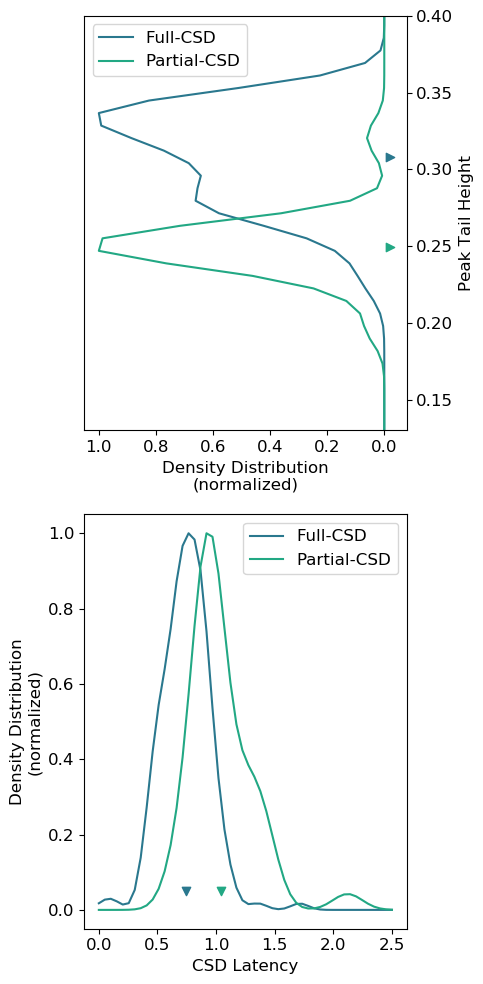

In [33]:
### Comparing partial to full peaks: Supp. Figure 

partial_peaks = []
full_peaks = []
for s in os.listdir('./SeqClasses/'):
    if '2019' not in s:
        continue
    try: 
        seq = pickle.load(open('./SeqClasses/' + s,'rb'))
    except:
        print(s,'failed')
        continue
    if seq.posture == 1:
        try:
            t3_index = np.argmax(seq.ts > 3)
            t1_index = np.argmax(seq.ts >= 1)
            t0_index = np.argmax(seq.ts >= 0)
            tb_index = np.argmax(seq.ts > -1)

            foot_norm = np.nanmedian(np.vstack([seq.smooth_data[tb_index:t0_index,11,2],seq.smooth_data[tb_index:t0_index,11,2]]))
            back_norm = np.nanmedian(np.vstack([seq.smooth_data[t1_index:t3_index,3,2],seq.smooth_data[t1_index:t3_index,9,2]]))
            #foot_norm = back_norm
            foot_norm = 0.0
            if ~np.isnan(foot_norm) and ~np.isnan(seq.peak_height):
                full_peaks.append(seq.peak_height - foot_norm)

        except:
            pass
        continue
    elif seq.posture != 2:
        continue
    
    t3_index = np.argmax(seq.ts > 3)
    t1_index = np.argmax(seq.ts >= 1)
    t0_index = np.argmax(seq.ts >= 0)
    tb_index = np.argmax(seq.ts > -1)
    foot_norm = np.nanmedian(np.vstack([seq.smooth_data[tb_index:t0_index,11,2],seq.smooth_data[tb_index:t0_index,12,2]]))
    back_norm = np.nanmedian(np.vstack([seq.smooth_data[t1_index:t3_index,3,2],seq.smooth_data[t1_index:t3_index,9,2]]))
    #foot_norm = back_norm
    foot_norm = 0.0
    partial_peak = np.nanmax(seq.smooth_data[t1_index:t3_index,10,2])

    if ~np.isnan(foot_norm) and ~np.isnan(partial_peak):
        partial_peaks.append(partial_peak - foot_norm)
    #print(partial_peaks)
    if False:
        plt.cla()
        plt.plot(seq.ts,seq.data[:,10,2])
        plt.axvline(3,linestyle=':')

        plt.axhline(partial_peak,color='red')

        #print(np.unique(seq.data[:,10,2]))
        try:
            plt.axvline(seq.tzero)
        except:
            plt.axvline(seq.offset)
        plt.title(seq.seq_name)
        plt.show()

partial_array = np.array(partial_peaks) #[~np.isnan(np.array(partial_peaks))]
#print(partial_array)
full_array = np.array(full_peaks)

partial_array = partial_array[partial_array > 0.15]
full_array = full_array[full_array > .15]


a = .5
partial_peak_pdf =  gaussian_kde(partial_array)
full_peak_pdf = gaussian_kde(full_array)
clumped_peak_pdf = gaussian_kde(np.hstack([partial_array,full_array]))


fig,(ax1,ax2) = plt.subplots(2,1)

#ax.scatter(np.zeros(len(partial_array)),partial_array)
#ax.scatter(np.ones(len(full_array)),full_array)
xs = np.linspace(0.10,.50,50)
#xs = np.linspace(np.min(partial_array),np.max(full_array),50)

#ax1.plot(xs,full_peak_pdf(xs)/max(full_peak_pdf(xs)),label='Full-CSD',color=paper_cmap(.4))
#ax1.plot(xs,partial_peak_pdf(xs)/max(partial_peak_pdf(xs)),label='Partial-CSD',color=paper_cmap(.6))
ax1.plot(full_peak_pdf(xs)/max(full_peak_pdf(xs)),xs,label='Full-CSD',color=paper_cmap(.4))
ax1.plot(partial_peak_pdf(xs)/max(partial_peak_pdf(xs)),xs,label='Partial-CSD',color=paper_cmap(.6))

#ax1.plot(xs,clumped_peak_pdf(xs)/max(clumped_peak_pdf(xs)),label='Partial- & Full-CSD',color='gray')

#ax1.scatter(np.mean(full_array),0.05,color=paper_cmap(.4),marker='v')
#ax1.scatter(np.mean(partial_array),0.05,color=paper_cmap(.6),marker='v')
ax1.scatter(-0.02,np.mean(full_array),color=paper_cmap(.4),marker='>')
ax1.scatter(-0.02,np.mean(partial_array),color=paper_cmap(.6),marker='>')
ax1.set_ylim([0.13,0.40])

#fig.show()

#fig,ax = plt.subplots()
print(partial_latencies)
partial_lat_array = np.array(partial_latencies)
full_lat_array = np.array(csd_latencies)

partial_lat_array = partial_lat_array[~np.isnan(partial_lat_array)]
full_lat_array = full_lat_array[~np.isnan(full_lat_array)]

full_latency_pdf = gaussian_kde(full_lat_array)
partial_latency_pdf = gaussian_kde(partial_lat_array)

clumped_latency_pdf = gaussian_kde(np.hstack([partial_lat_array,full_lat_array]))

#ax.scatter(np.zeros(len(partial_lat_array) + len(full_lat_array)),np.hstack([partial_lat_array,full_lat_array]))

xs = np.linspace(0,2.5,50)
ax2.plot(xs,full_latency_pdf(xs)/max(full_latency_pdf(xs)),label='Full-CSD',color=paper_cmap(.4))
ax2.plot(xs,partial_latency_pdf(xs)/max(partial_latency_pdf(xs)),label='Partial-CSD',color=paper_cmap(.6))
#ax2.plot(xs,clumped_latency_pdf(xs)/max(clumped_latency_pdf(xs)),label='Partial- & Full-CSD',color='gray')

ax2.scatter(np.mean(full_lat_array),0.05,color=paper_cmap(.4),marker='v')
ax2.scatter(np.mean(partial_lat_array),0.05,color=paper_cmap(.6),marker='v')

ax1.legend()
ax1.set_xlabel('Density Distribution\n(normalized)')
ax1.set_ylabel('Peak Tail Height')

ax2.set_ylabel('Density Distribution\n(normalized)')
ax2.set_xlabel('CSD Latency')

ax1.invert_xaxis()
ax1.yaxis.set_ticks_position('right')
ax1.yaxis.set_label_position('right')
ax2.legend()

fig.set_size_inches(5,10)
fig.tight_layout()
fig.show()

In [38]:
print(len(full_peaks))
print(len(partial_array))
ttest_ind(full_peaks,partial_array)

153
26


Ttest_indResult(statistic=2.3108713367350484, pvalue=0.02199285362197347)

(0.027802449838909483, 0.6901633990986492)


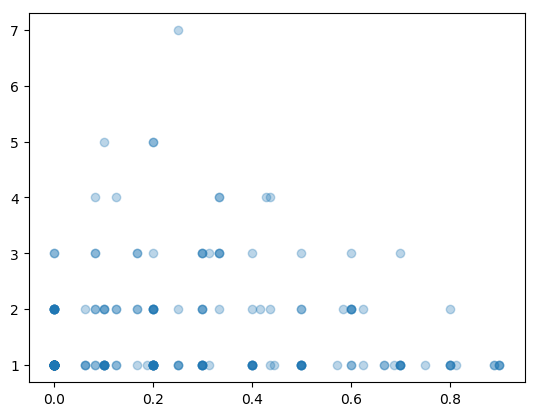

In [231]:
partials_df = pd.read_csv('./partials_df3.csv')

fig,ax = plt.subplots()
ax.scatter(partials_df['ResponseRate'],partials_df['N_Partials'],alpha=.3)

fig.show()

print(pearsonr(partials_df['ResponseRate'],partials_df['N_Partials']))

In [107]:
print('height:',ttest_ind(full_array,partial_array))
print('latency:',ttest_ind(full_lat_array,partial_lat_array))

height: Ttest_indResult(statistic=8.692050123496266, pvalue=4.608416200233139e-15)
latency: Ttest_indResult(statistic=-7.8305808078474275, pvalue=2.9334364619350493e-13)


In [ ]:
fig,ax = plt.subplots()
ax.hist(durations_df['Duration'])
ax.hist(durations_df['LogDuration'])

print(sorted(pd.unique(durations_df['LogDuration'])))

In [ ]:
## Do some more lame stats! Intersting artifacts here...

print('absolute all:',pearsonr(xs_all,ys_all))
print('relative all:',pearsonr(xs_all,ys_rel))

In [ ]:
## Note the different groups here, the above was mean rel potency of partial posture songs, below is 
# rel potency of song that evoke the csd
md = smf.mixedlm("Duration ~ ResponseRate",data=durations_df,groups=durations_df["Aviary"])
mdf = md.fit()
print(mdf.summary())

md = smf.mixedlm("Duration ~ AvgPotency",data=durations_df,groups=durations_df["Aviary"])
mdf = md.fit()
print(mdf.summary())

print('In summary, response rate predicts the songs that get partial postures,',\
      'as well as duration, more strongly, in fact, than song potency predicts duration')
print('Avg potency works here, but it is even weaker. I need to pin this down...')



## Fig 7, including Train a classifer on Shape with Response Rate 

In [ ]:
# Before training a classifier, I can just correlate height a vmax to response rate

# That's easy enough, height and vmax are both variables, so just pull them out of my seq list
# response rate could be the average for the block...I'll need that as a dict.

# Supplemental Figures

### Supplemental Figure 3
Concordance of Song rankings:

In [67]:
daviary = all_aviaries[0][:,:,:,0]
print(daviary.shape)

print(np.nanmean(daviary[f,:,gsi],axis=0))

print(not_f,gsi)
print(np.nanmean(daviary[not_f,:][:,:,gsi],axis=(0,1)))
      

bird_conc,p_value = pearsonr(np.nanmean(daviary[f,:][:,gsi],axis=0),
                             np.nanmean(daviary[not_f,:][:,:,gsi],axis=(0,1)))

(3, 20, 10)
[1.  nan 1.  1.  1.  1.  0.5 nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[False  True  True] [ True  True False False False False False False False  True]
[0.95454545 0.95454545 0.63157895]


In [ ]:
## This was a clever Idea but it's not a general case
## Even by the model, we expect variation to be highest around the threshold
## There's no reason to predit the threshold is in a particular place. 

max_songs = np.max([meta.n_songs for meta in all_metas])

all_std = np.empty([len(all_aviaries),max_songs])
all_std.fill(np.nan)
for a in range(len(all_aviaries)):
    
    daviary = all_aviaries[a]
    print(daviary.shape)
    n_birds = all_metas[a].n_birds
    n_songs = all_metas[a].n_songs
    binary_daviary = np.array(daviary[:,:,:,0])
    binary_daviary[binary_daviary == 2] = 0
    bird_means = np.nanmean(binary_daviary,axis=(1,2))
    order_by_bird = np.empty([n_birds,n_songs])

    order_by_bird.fill(np.nan)
    responsive_birds = [bird_means > .05]
    song_means = np.nanmean(binary_daviary[responsive_birds],axis=(0,1))
    song_std = np.nanstd(binary_daviary[responsive_birds],axis=(0,1))
    song_std = np.nanstd(np.nanmean(binary_daviary[responsive_birds],axis=1),0)
    song_order = np.argsort(song_means)[::-1]
    
    for f in range(n_birds):

        if np.nanmean(binary_daviary[f]) < .05:
            continue


        bird_order = np.argsort(np.nanmean(binary_daviary[f,:,song_order],axis=(1)))[::-1]
        order_by_bird[f] = bird_order

    order_std = np.nanstd(order_by_bird,0)

    sorted_std = song_std[song_order]
    if False:
        fig,ax = plt.subplots()
        ax.bar(range(len(song_means)),song_means[song_order],yerr=order_std)
        fig.show()

    all_std[a,:len(order_std)] = order_std
    

fig,ax = plt.subplots()

ax.bar(range(max_songs),np.nanmean(all_std,0))
fig.show()

## Everything from here down is old code not appearing in the paper

In [ ]:
## Old latency counting
"""
fig,ax = plt.subplots()
### The hand written ones are correct too. 
depuff_latencies = []
depuff_latencies2 = []
wingstroke_latencies = []
for i,row in test_4.iterrows():
    if '2019' not in row['SeqName']:
        continue
    try:
        seq = pickle.load(open('./AllSeqs/' + row['SeqName'] + '.obj','rb'))
        #print(seq.seq_name,'offset:',seq.ts[0])
    except:
        #print('seq missing',row['SeqName'],'all values are wrong')
        continue
    if seq.ts[0] == 0:
        continue
    notes = str(row['Notes']).lower()
    if 'depress' in notes:
        #print(row)
        #print(row['TrueLatency'])
        if pd.isnull(row['TrueLatency']):
            pass
        else:
            depuff_latencies.append(row['TrueLatency'])
            depuff_latencies2.append(row['TimeStamp'] + seq.ts[0])
            print('depuff:',row['TrueLatency'],row['TimeStamp'] + seq.ts[0],seq.ts[0],seq.seq_name)
    if 'wingstroke' in notes:
        #print('wingstroke:',row['SeqName'],row['TimeStamp'],row['Offset'])
        wingstroke_latencies.append(row['TimeStamp'] + seq.ts[0])
        print('wingstroke:',row['TrueLatency'],row['TimeStamp'] + seq.ts[0],seq.ts[0],seq.seq_name)
            
print('depuffs:')
print(len(depuffs),len(depuff_latencies),len(depuff_latencies2))
print(depuffs,depuff_latencies,depuff_latencies2)

print('wingstrokes:')
print(len(wingstrokes),len(wingstroke_latencies))
print(wingstrokes,wingstroke_latencies)



ax.hist(depuff_latencies,normed=False,color='gray')
#ax.hist(latencies[~np.isnan(latencies)],alpha=.8,normed=True)
ax.axvline(0,color='black')
ax.axvline(np.median(depuff_latencies),color='black',linestyle=':')
#ax.axvline(np.nanmedian(latencies),color='black')
ax.set_xlim(-.5,.5)
ax.set_ylabel('counts')
ax.set_xlabel('Latency of depuff from song onset (s)')
fig.show()
"""
pass

In [ ]:
#Old Figure 2 (response timeline)

bird_list_boring = ['Bird1','Bird2','Bird3','Bird4','Bird5','Bird6','Bird7']
test_4 = pd.read_csv('./presentation_info3.csv')
count = 0
response = 0

csd_count = 0
partial_count= 0
look_count = 0
ws_count = 0
leg_count = 0 
dp_count = 0
startle_count = 0
poo_count = 0
other_count = 0
bird_count_dict = dict(zip(bird_list,[[0,0,0,0,0,0,0,0,0,0] for f in bird_list]))
for i,row in test_4.iterrows():
    if '2019' not in str(row['SeqName']):
        continue
    notes = str(row['Notes']).lower()
    posture = str(row['Posture'])
    if 'missing' in notes or 'no bird' in notes or 'tone' in notes or 'not on computer' in notes:
        continue
    if row['Bird'] in bird_dict.keys():
        bird_name = row['Bird']
    else:
        continue
    if '1' in posture:
        csd_count +=1
        bird_count_dict[bird_name][0] += 1
        response=1
    elif '2' in posture:
        partial_count += 1
        bird_count_dict[bird_name][1] += 1
        response=1  
    elif '0' not in posture:
        continue
    if 'look' in notes:
        look_count +=1
        bird_count_dict[bird_name][2] += 1
        response=1  
    if 'wingstroke' in notes:
        ws_count += 1
        bird_count_dict[bird_name][3] += 1
        response=1  
    if 'leg' in notes:
        leg_count += 1
        bird_count_dict[bird_name][4] += 1
        response=1  
    if 'depress' in notes:
        dp_count += 1
        bird_count_dict[bird_name][5] += 1
        response=1  
    if 'startle' in notes:
        startle_count +=1
        bird_count_dict[bird_name][6] += 1
        response=1  
    if 'poop' in notes:
        poo_count +=1
        bird_count_dict[bird_name][7] += 1
        response=1  
    if not response:
        other_count +=1
        bird_count_dict[bird_name][8] += 1
        #print(posture,notes)
    response=0
    bird_count_dict[bird_name][9] +=1
    count+=1  

bird_count_array = np.zeros([len(bird_list),10])
for f in range(len(bird_list)):
    bird_count_array[f] = bird_count_dict[bird_list[f]]
    
    
behavior_labels=['CSD','Partial','Look\nAround','Wingstroke','Leg\nAdjustment','Depress','Startle','Poop','None/nother']
fig,ax = plt.subplots()
behavior_bars = np.array([csd_count,partial_count,look_count,ws_count,leg_count,
                          dp_count,startle_count,poo_count,other_count]) / count
#ax.bar(range(len(behavior_bars)),behavior_bars)
ax.hlines(behavior_bars,np.arange(len(behavior_labels)) - .4,np.arange(len(behavior_labels)) + .4)
for b in range(len(behavior_labels)):
    sem_b = np.std(np.divide(bird_count_array[:,b],bird_count_array[:,-1])) / np.sqrt(len(bird_list))
    ## don't forget to divide to get rations, duh
    #print(bird_count_array[:,b],np.std(np.divide(bird_count_array[:,b],bird_count_array[:,-1]),np.sqrt(len(bird_list)),sem_b)
    #sem_b = .05
    ax.fill_between([b-.4,b+.4],behavior_bars[b] + sem_b,behavior_bars[b] - sem_b,color='gray',alpha=.6)
for f in range(len(bird_list)):
    bird_count = bird_count_dict[bird_list[f]][9]
    bird_bars = np.array(bird_count_dict[bird_list[f]])[:9] / bird_count
    ax.scatter(np.arange(len(behavior_labels)) + f*2/(3*8) - 1/4.,bird_bars,label=bird_list_boring[f])
    ax.set_xticks(np.arange(len(behavior_labels)))
    ax.set_xticklabels(behavior_labels,rotation = 45)
ax.set_ylabel('Proportion evoked by song')

ax.minorticks_on()

ax.yaxis.grid(which='both',alpha=.2)
ax.set_ylim((0,1))

fig.legend()
fig.show()

In [ ]:
## Do some analysis, not sure if I need this...

#print(duration_dict)
#print(latency_dict)
xs = []
ys = []
xs_l,ys_l = [],[]
for song in song_list:
    #print(song,len(duration_dict[song]),np.median(duration_dict[song]))
    xs.append(len(duration_dict[song]))
    ys.append(np.median(duration_dict[song]))
    if song in latency_dict.keys():
        xs_l.append(len(latency_dict[song]))
        ys_l.append(np.median(latency_dict[song]))
    
fig,(ax,ax1) = plt.subplots(2)
ax.scatter(xs,ys)
ax.set_xlabel('Potency (N postures evoked)')
ax.set_ylabel('Median Duration (s)')
for bird in bird_list:
    ax1.scatter(bird_duration_dict[bird][:-1],bird_duration_dict[bird][1:],alpha=.05)
    print('bird:',bird)
    print(pearsonr(bird_duration_dict[bird][:-1],bird_duration_dict[bird][1:]))
ax1.set_xlabel('Duration of trial n (s)')
ax1.set_ylabel('Duration of trial n+1 (s)')
fig.set_size_inches([8,16])
fig.show()
print(pearsonr(xs,ys))
print(pearsonr(duration_list0[:-1],duration_list0[1:]))
#print(random.sample(duration_list0,len(duration_list0)))
print(pearsonr(duration_list0,random.sample(duration_list0,len(duration_list0))))
print('***')
print(pearsonr(xs_l,ys_l))
#print(xs_l,ys_l)
#print(len(latency_list0))

fig2,(ax2,ax3) = plt.subplots(2)
ax2.scatter(xs_l,ys_l)
for bird in bird_list:
    ax3.scatter(bird_latency_dict[bird][:-1],bird_latency_dict[bird][1:],alpha=.1)
    print('bird:',bird)
    print(pearsonr(bird_latency_dict[bird][:-1],bird_latency_dict[bird][1:]))

#ax3.scatter(latency_list0[:-1],latency_list0[1:])
print(pearsonr(latency_list0[:-1],latency_list0[1:]))
fig2.set_size_inches([8,16])
fig2.show()

In [ ]:
## I don't think I need this...
print(bird_list)
print(song_list)
print(song_dict)
print(bird_dict)

total_song_counts = np.zeros(10)
total_presentation_counts = np.zeros(10)
relative_potency={}
for bird in bird_list:
    bird_df = test_3[test_3['Bird'] == bird]
    bird_posture_df = bird_df[bird_df['Posture'] == 1]
    good_df = bird_df[~pd.isna(bird_df['Posture'])]
    presentation_counts = good_df['Song'].value_counts()
    song_counts = bird_posture_df['Song'].value_counts()
    mean_array = np.zeros(10)
    for song in song_list:
        if song in song_counts.index.tolist():
            total_song_counts[song_dict[song]] += song_counts[song]
            mean_array[song_dict[song]] = song_counts[song] / presentation_counts[song]
        if song in presentation_counts.index.tolist():
            total_presentation_counts[song_dict[song]] += presentation_counts[song]

    print(mean_array)
    relative_potency[bird] = dict(zip(song_list,mean_array))
    
print(total_song_counts,total_presentation_counts)
song_potency_list = total_song_counts / total_presentation_counts
print(song_potency_list)
song_potency =dict(zip(song_list,song_potency_list))

In [ ]:
## Playing with David's Data: 
daviaries = [dave_array07,dave_array09,dave_array10,dave_array11]
dmetas = [meta_d07,meta_d09,meta_d10,meta_d11]



i=3
daviary, dmeta = daviaries[i],dmetas[i]

durations_list = []
for s in range(dmeta.n_songs):
    song_partials = daviary[:,:,s,2][daviary[:,:,s,0] == 2]
    mean_dur = np.nanmean(song_partials)
    #print(mean_dur,len(song_partials))

partial_daviary = daviary[daviary[:,:,:,0] == 2]
print('partial shape:',partial_daviary.shape)
dmeta.read_me()

print('shape',np.shape(daviary))

potency_plot = np.nanmean(daviary[:,5,:,0],axis=(0))
fig,ax = plt.subplots()
ax.bar(range(dmeta.n_songs),potency_plot)
fig.show()

fig2,ax2 = plt.subplots()
ax2.bar(range(dmeta.n_birds),np.nanmean(daviary[:,:,:,0],axis=(1,2)))
fig2.show()

fig3,ax3 = plt.subplots()
duration_plot = np.nanmean(daviary[:,:,:,2],axis=(0,1))
ax3.bar(range(dmeta.n_songs),duration_plot)
fig3.show()

In [ ]:
david_df = pd.DataFrame(columns=['Bird','Song','Block','RelPotency','AvgPotency','Latency','Duration'],index=range(2050))

count = 0
for i in [2,3]:
    daviary, dmeta = daviaries[i],dmetas[i]

    #print(partial_daviary)
    song_list_i = range(len(dmeta.song_list))
    bird_list_i = range(len(dmeta.bird_list))

    song_list_d = dmeta.song_list
    bird_list_d = dmeta.bird_list
    song_potency = dict(zip(song_list_d,np.nanmean(daviary[:,:,:,0],axis=(0,1))))
    relative_potency = {}
    for b in range(len(bird_list_d)):
        relative_potency[bird_list_d[b]] = dict(zip(song_list_d,np.nanmean(daviary[b,:,:,0],axis=0)))

    for s in range(dmeta.n_songs):
        for b in range(dmeta.n_birds):
            for bl in range(dmeta.n_blocks):
                seq_duration = daviary[b,bl,s,2]
                seq_latency = 0
                david_df.loc[count] = [dmeta.bird_list[b],dmeta.song_list[s],bl,
                                         relative_potency[dmeta.bird_list[b]][dmeta.song_list[s]],
                                                          song_potency[dmeta.song_list[s]],seq_latency,seq_duration]
                count += 1

print(count)
david_df = david_df.infer_objects()
                                     
print(david_df)

In [ ]:
print(dmeta.song_list)
print(daviary.shape)

In [ ]:
sampled_df = david_df.sample(2000)

#md = smf.mixedlm("Duration ~ AvgPotency",data=david_df,groups=david_df["Bird"])
md = smf.mixedlm("Duration ~ AvgPotency",data=sampled_df,groups=sampled_df['Bird'])
mdf = md.fit()
print(mdf.summary())

In [ ]:
## Read in some song meta_data
song_timings = pd.read_csv('./playback_songs/songtiming.csv')

burble_onsets = dict(zip(song_timings['Song'],np.round(song_timings['Burble Onset'],3)))
whistle_onsets = dict(zip(song_timings['Song'],np.round(song_timings['Whistle Onset'],3)))
burble_count = dict(zip(song_timings['Song'],song_timings['Burble Count']))

fig,ax = plt.subplots()
ax.boxplot(whistle_onsets.values(),vert=False)
print(burble_count.values())
ax.set_xlim([0,1])
fig.show()

## Figure 1: Make Methods Video

Just some code to generate images, the actual processing happens elsewhere

In [ ]:
seq_name = './SeqClasses/2019-05-30-07-07-56_GRG.obj'

seq = pickle.load(open(seq_name,'rb'))
print(seq.t_refraction)

In [ ]:
## Make 3d images
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

EC = np.mean(seq.smooth_data[:,[4,12]],1)
SC = np.mean(seq.smooth_data[:,[5,13]],1)
bones = [
    [0,4],  #beak-left eye
    [0,12], #beak-right eye
    [4,12], #right eye-left eye
    [20,21],#eye-center shoulder-center
    [21,7], #shoulder-center left-wrist
    [21,15],#shoulder-center right-wrist
    [21,1], #should-center keel
    [1,2],  #keel-tailbone
    [21,2], #should-center tailbone
    [15,16],#right-wrist right-wingtip
    [7,8],  #left-wrist left-wingtip
    [2,9],  #tailbone left-knee
    [9,10], #left-knee left-ankle
    [2,17], #tailbone right-knee
    [17,18],#right-knee right-ankle
    [10,11],#left-ankle left-heel
    [18,19],#right-ankle right-heel
    [2,3]   #tailbone tail-tip
    ]

bone_colors = ['brown','brown','brown','black',
               'blue','blue','green','green','green','blue','blue',
              'red','red','red','red','red','red','purple']

for t in range(len(seq.ts)):
    ax.scatter(seq.smooth_data[t,:,0],seq.smooth_data[t,:,1],seq.smooth_data[t,:,2])
    full_data = np.empty([len(seq.smooth_data),22,3])
    full_data[:,:20] = seq.smooth_data
    full_data[:,20] = EC
    full_data[:,21] = SC

    for n in range(len(bones)):
        b = bones[n]
        ax.plot(full_data[t,b,0],full_data[t,b,1],full_data[t,b,2],color=bone_colors[n])
    ax.set_xlim([0,.4])
    ax.set_ylim([0,.4])
    ax.set_zlim([0,.4])
    fig.set_size_inches(7,7)
    fig.savefig('./tmp/3d_figs/' + f'{t:04}' + '.png',dpi=300)
    ax.clear()


In [ ]:
## Make a plot images
%matplotlib inline

fig,ax = plt.subplots()
ax.set_xlim([seq.ts[0],seq.ts[-1]])
ax.set_ylim([0,.4])


for t in range(len(seq.smooth_data)):
    ax.plot(seq.ts[0:t],seq.smooth_data[0:t,3,2])
    ax.scatter(seq.ts[t],seq.smooth_data[t,3,2],s=40,color='blue')
    ## Plot lines
    if t > seq.tzero_index[0]:
        ax.axvline(seq.tzero,color='gray')
        if t > seq.t_latency_index:
            ax.axvline(seq.t_latency,color='orange')
            if t > seq.vmax_index[0]:
                ax.axvline(seq.t_vmax,color='red')
                if t > seq.stable_vel_index:
                    ax.axvline(seq.t_stable_vel,color='purple')
                    if t > seq.refraction_index[0]:
                        ax.axvline(seq.t_refraction,color='green')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Tail Height (m)')
    ax.set_xlim([seq.ts[0],seq.ts[-1]])
    ax.set_ylim([0,.4])
    
    fig.set_size_inches(7,7)
    fig.savefig('./tmp/test_figs/' + f'{t:04}' + '.png',dpi=300)
    ax.clear()

### Figure 2: Quantification of CSD

Some of these are made by hand

In [ ]:
# Plot example figure for 2a
from scipy.io import wavfile as wf
# read audio samples
input_data = wf.read("./playback_songs/originals/BDY.wav")
audio = input_data[1]



seq = pickle.load(open('./SeqClasses/2019-06-29-10-03-17_LB.obj','rb'))

fig,ax = plt.subplots()

ts = np.arange(0,len(audio)) / input_data[0]
ax.plot(ts,audio / 1000 + 180,color='black')

ax.plot(seq.ts,seq.smooth_data[:,10,2] * 1000,color='black')
ax.axvline(0,color='black')
ax.axvline(seq.t_latency,color='black',linestyle=':')
ax.axvline(seq.t_vmax,color='green')
ax.axvline(seq.t_stable_vel,color='green')
#ax.fill_betweenx([0,500],seq.t_vmax,seq.t_stable_vel)
ax.scatter(seq.t_peak,seq.peak_height * 1000,color='black')
ax.axvline(seq.duration + seq.t_vmax,color='black')
#ax.fill_betweenx([0,500],0,5,alpha=.2,color='gray')
ax.set_ylim([150,400])
#ax.set_xlim([-1,15])

ax.set_xlabel('Time from song onset (s)')
ax.set_ylabel('Tail height (mm from ground)')

print(seq.duration)
print(seq.machine)
print(seq.t_latency)
ax.axhline(180,color='black',linewidth=1)
fig.show()

#fig.savefig('/home/ammon/Desktop/PaperFigs/ExamplePlot3a.png',dpi=300)
#fig.savefig('/home/ammon/Desktop/PaperFigs/ExamplePlot3a.svg')

In [ ]:
## Grab the song offset of any particular posture (this is important for hand labeling the offsets)
## Which is super tedious, by the way

my_seq = '2019-06-03-10-37-00_LB'

files = sorted(os.listdir('./SeqClasses/'))

for s in range(len(files)):
    if my_seq in files[s]:
        seq = pickle.load(open('./SeqClasses/' + files[s],'rb'))
        print(seq.seq_name)
        print(seq.ts[0])
        
files2 = sorted(os.listdir('./CrapSeqs/'))
for s in range(len(files2)):
    if my_seq in files2[s]:
        seq = pickle.load(open('./CrapSeqs/' + files2[s],'rb'))
        print(seq.seq_name)
        print(seq.ts[0])

In [ ]:
## Plot fig2d 
%matplotlib inline

fig,ax = plt.subplots()

files = sorted(os.listdir('./SeqClasses/'))

color_dict = {
    'CB-Red':'Red',
    'CB-Yellow':'Brown',
    'CB-LB2':'Blue',
    'CB-Orange':'Orange',
    'CB-Y2':'Green'
}

count = 0
seq_dict = {}
latency_dict = {}
k=3
for s in range(len(files)):
    seq = pickle.load(open('./SeqClasses/' + files[s],'rb'))
    if seq.offset == 0 or seq.posture != 1:
        continue
    if not seq.clean:
        continue
    count += 1
    
    ys = seq.smooth_data[:,10,2]
    xs = seq.ts
    if len(ys) != len(xs):
        xs = xs[:-1]
        
    zero_i = seq.tzero_index[0][0]

    vmax_t = seq.t_vmax[0]
    vmax_i = seq.vmax_index[0][0]
    lat_t = seq.t_latency
    lat_i = seq.t_latency_index
    peak_t = seq.t_peak
    peak_i = seq.stable_vel_index
    if lat_i == 0:
        print('negative auto latency',s)
        continue
        #pdb.set_trace()
    #indices = [zero_i,vmax_i,peak_i]
    indices = [zero_i,lat_i,peak_i]
    if seq.bird not in seq_dict.keys():
        seq_dict[seq.bird] = []
        latency_dict[seq.bird] = []
    stuff = [xs,ys,indices]
    seq_dict[seq.bird].append(stuff)
    latency_dict[seq.bird].append(vmax_t)
    
    "This works differently now:"
    
for bird in seq_dict.keys():
    sorted_latency = np.argsort(latency_dict[bird])[::-1]
    for s in sorted_latency:
    #for s in range(len(seq_dict[bird])):
        xs,ys,indices = seq_dict[bird][s]
        zero_i,vmax_i,peak_i = indices
        count += 1
        ys = ys * k + count * .05
        xs_base = xs[:zero_i]
        ys_base = ys[:zero_i]
        xs_pre = xs[zero_i:vmax_i]
        ys_pre = ys[zero_i:vmax_i]
        xs_mid = xs[vmax_i:peak_i]
        ys_mid = ys[vmax_i:peak_i]
        xs_post = xs[peak_i:]
        ys_post = ys[peak_i:]


        #ax.plot(xs,ys)
        base_color = color_dict[bird]
        ax.plot(xs_base,ys_base,color=base_color)
        ax.plot(xs_pre,ys_pre,color='grey')
        ax.plot(xs_mid,ys_mid,color='black')
        ax.plot(xs_post,ys_post,color='grey')

        ax.set_xlim([-1,3])


fig.set_size_inches([4,10])
fig.show()
#fig.savefig('/home/ammon/Desktop/PaperFigs/multi-plot.png',dpi=300)

In [ ]:
### Plot the distribution of peaks for fig1 

tails = []
max_tails = []
bases = []

short_list = []
max_dict = {}
base_dict = {}

fig,(ax,ax2) = plt.subplots(2)
mean_times = {}

for s in sorted(os.listdir('./SeqClasses/')):
    seq = pickle.load(open('./SeqClasses/' + s,'rb'))
    if seq.posture == 1 and seq.offset != 0:
        if seq.bird not in short_list:
            short_list.append(seq.bird)
            max_dict[seq.bird] = []
            base_dict[seq.bird] = []
        window = (seq.ts > -1) & (seq.ts < 4)
        if len(window) != len(seq.smooth_data):
            window = window[:-1]
        
        tail = seq.smooth_data[window,3,2]
        if seq.bird == 'CB-Yellow':
            ax.plot(seq.ts[window],(tail-.21) * 1000,alpha=.2,color='gray')
        
            for t in np.arange(len(window))[window]:
                if int(seq.ts[t] * 10) not in mean_times:
                    mean_times[int(seq.ts[t] * 10)] = []
                mean_times[int(seq.ts[t] * 10)].append(seq.smooth_data[t,3,2])
        
        base = tail[0]
        
        tails.append(tail)
        max_tails.append(np.max(tail))
        bases.append(base)
        max_dict[seq.bird].append(np.max(tail))
        base_dict[seq.bird].append(base)


normed_tails = []

mean_tails = np.empty(len(mean_times))
key_times = sorted(mean_times.keys())
for t in range(len(key_times)):
    mean_tails[t] = np.median(mean_times[key_times[t]])
    
ax.plot(np.array(key_times) / 10,(mean_tails - .21) * 1000,color='black')


        

#ax.plot(np.mean(np.array(tails),1))
all_tails = []
for b in short_list:
    mean_base = np.mean(base_dict[b])
    max_tail = np.max(max_dict[b])
    med_peak = np.median(max_dict[b])
    normed_tails = (np.array(max_dict[b]) - mean_base) / (med_peak - mean_base)
    #normed_bases = np.array(base_dict[b]) - np.max(base_dict[b])

    #ax.hist(normed_tails,bins=50,alpha=.7)
    all_tails.extend(normed_tails)
    #ax.hist(normed_bases,bins=50,alpha=.5)
    #ax.axvline()

    
ax.set_xlim([-.5,2])
ax.set_ylim([-50,200])
ax.axvline(0,linestyle=':',color='black')
ax.set_xlabel('Time (seconds after song onset)')
ax.set_ylabel('Tail height (mm relative to baseline)')


ax2.hist(all_tails,bins = 100,orientation='horizontal',color='black')
ax2.set_ylim([-0.5,2])
ax2.set_ylabel('Difference between peak and baseline\n(normalized)')
fig.set_size_inches(4,8)
fig.show()

fig.tight_layout()
#fig.savefig('/home/ammon/Desktop/PaperFigs/Fig2_.svg')
#fig.savefig('/home/ammon/Desktop/PaperFigs/Fig2_.png',dpi=300)

In [ ]:
fig,ax = plt.subplots()
ax.boxplot(all_tails)
fig.show()

## Figure 4

Selectivity and Response rate: 

In [ ]:
## Define bootstrap function


def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

def simulate_hdist(resp_rate1,resp_rate2,n_songs = 10,iterations=2000):
    iterations = 3000
    counts = np.zeros(iterations)
    base_set1 = np.zeros(n_songs)
    base_set2 = np.zeros_like(base_set1)
    n_responses1 = int(np.round(resp_rate1 * n_songs))
    n_responses2 = int(np.round(resp_rate2 * n_songs))

    base_set1[:n_responses1] = 1
    base_set2[:n_responses2] = 1

    for i in range(iterations):
        set1 = np.array(base_set1)
        set2 = np.array(base_set2)
        #random.shuffle(set1)
        random.shuffle(set2)
        #print(set1,set2)
        
        overlap = np.dot(set1,set2)
        counts[i] = overlap
        #print(overlap)

    bins = np.arange(10)
    histogram, bin_edges = np.histogram(counts,bins=bins,density=True)

    bin_centers = 0.5*(bins[1:] + bins[:-1])

    pdf = stats.norm.pdf(bin_centers)

    hist_dist = stats.rv_histogram((histogram,bins))

    return hist_dist


def build_pdf_table(n_songs):
    ratio_step = 1 / n_songs
    finished_mins = []
    finished_maxes = []
    hdist_table = {}
    #for i in np.arange(0,1 + ratio_step,ratio_step):
    for i in np.arange(n_songs): 
        #r_max = np.round(1-i,3)
        #hdist_table[r_max] = {}
        hdist_table[i] = {}
        #for j in np.arange(0,(1-i) + ratio_step,ratio_step):
        r_max = (n_songs - i)/n_songs
        for j in np.arange(0,i+1):
            r_min = j / n_songs
            
            hdist = simulate_hdist(r_max,r_min,n_songs)
            
            #hdist_table[r_max][r_min] = hdist
            hdist_table[i][j] = hdist
    return hdist_table

def pdf_bootstrapped(n_overlap,b1_ratio,b2_ratio,n_songs=10,hdist_table=None):
    if hdist_table==None:
        print('build the table')
        hdist_table = build_pdf_table(n_songs)
    b1_ratio = np.round(b1_ratio,3)
    b2_ratio = np.round(b2_ratio,3)
    indices = np.arange(0,1,1/n_songs)

    b1_index = np.argmax(indices >= b1_ratio)
    b2_index = np.argmax(indices >= b2_ratio)
    #print(b1_index,b2_index)
    #max_ratio = np.max([b1_ratio,b2_ratio])
    #min_ratio = np.max([b1_ratio,b2_ratio])
    max_index = np.max([b1_index,b2_index])
    min_index = np.min([b1_index,b2_index])
    #hdist = hdist_table[max_ratio][min_ratio]
    hdist = hdist_table[max_index][min_index]
    #p_value = 1 - hdist.cdf(n_overlap + 1)
    pdf = 1 - hdist.pdf(n_overlap)
    if pdf == 1:
        print('overlap,ratio1,ratio2')
        print(n_overlap,b1_ratio,b2_ratio)
    return pdf

hdist_dict = {}
def get_pdf(block1,block2,hdist_table=None):
    #print(block1,block2)

    ## Remove nan values 
    if np.sum(np.isnan(block1)) > 0 or np.sum(np.isnan(block2)) > 0:
        block2 = block2[~np.isnan(block1)]
        block1 = block1[~np.isnan(block1)]
        block1 = block1[~np.isnan(block2)]
        block2 = block2[~np.isnan(block2)]
    n_songs = len(block1)
    if n_songs == 0:
        return np.nan
    if max(block1) == 0 or max(block2) == 0:
        return np.nan
    if min(block1) == 1 or min(block2) == 1:
        return np.nan
    if hdist_table == None:
        if n_songs in hdist_dict.keys():
            hdist_table = hdist_dict[n_songs]
        else:
            hdist_dict[n_songs] = build_pdf_table(n_songs)
        #hdist_table = build_pdf_table(n_songs)
    n_songs = len(block1)
    n_overlap = np.dot(block1,block2)
    b1_ratio = np.mean(block1)
    b2_ratio = np.mean(block2)
    #print(n_overlap,b1_ratio,b2_ratio)
    return pdf_bootstrapped(n_overlap,b1_ratio,b2_ratio,n_songs,hdist_table)

def plot_hdist(hdist,n_songs = 10):
    fig,ax = plt.subplots()
    bin_edges = np.arange(n_songs)
    ax.plot(bin_edges[:-1], [hdist.pdf(b) for b in bin_edges[:-1]], label="PDF")
    ax.set_ylim([0,1])
    fig.show()
    
print(get_pdf([],[]))


In [ ]:
hdist = hdist_dict[4][2][2]
plot_hdist(hdist,n_songs=4)
print(hdist.pdf(0))

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def dtw_cost(path):
    path_array = np.array(path)
    cost_array = np.zeros_like(path_array,dtype=float)
    cost_array0 = np.zeros(len(path_array),dtype=float)
    cost_array1 = np.zeros_like(cost_array0,dtype=float)

    indices_0, counts_0 = np.unique(path_array[:,0],return_counts=True)
    indices_1, counts_1 = np.unique(path_array[:,1],return_counts=True)
    for p in range(len(path_array)):
        cost0 = counts_0[indices_0==path_array[p,0]]
        cost1 = counts_1[indices_1==path_array[p,1]]
        cost_array0[p] = np.log(cost0) / cost0
        cost_array1[p] = np.log(cost1) / cost1

    cost_array[:,0] = cost_array0
    cost_array[:,1] = cost_array1

    costs = np.sum(cost_array,0)
    #pdb.set_trace()
    cost_path = np.max(cost_array,1)
    counts = (counts_0,counts_1)
    indices = (indices_0,indices_1)
    return costs, counts, indices, cost_path

p0 = np.array([1,0,0,1,1,0])
p1 = np.array([1,0,0,1,1,0])
base_array = np.arange(len(p0))
## Fast dtw fails with identical lines. It adds unnecessary stretches, because it's inherantly cost free. 
dist,path = fastdtw(p0,p1,dist=euclidean)
print(path)
costs,_,_,_ = dtw_cost(path)
print(costs)

In [ ]:
import dtw

def stretch_cost(indices):
    cost = np.sum((np.unique(indices,return_counts=True)[1])**2) - len(indices)
    return cost

p0 = np.array([0,1,1,0,0,0,1,0])
p1 = np.array([0,1,1,0,0,1,1,0])

alignment = dtw.dtw(p0,p1,keep_internals=True)
print(alignment.distance)
print(alignment.costMatrix)
print(alignment.index1,alignment.index2)
print(np.unique(alignment.index1,return_counts=True))
cost2 = stretch_cost(alignment.index2)
cost1 = stretch_cost(alignment.index1)

print(cost2)
avg_cost = np.mean([cost1,cost2])
print(avg_cost)

In [ ]:
## Define simulation to generate confidence intervals for CSD Selectivity 
## (scrap code way down at the bottom)

# Parameter class to keep things tidy
class CSD_Params:
    def __init__(self,n_birds = 1,n_blocks=10,n_songs=10,n_iterations = 10000,
                 sort_me=True,print_me = False,plot_me=False):
        self.n_birds = n_birds
        self.n_blocks = n_blocks
        self.n_songs = 10
        self.n_iterations = n_iterations
        self.sort_me = sort_me
        self.print_me = print_me
        self.plot_me = plot_me
    def report(self):
        print('n_birds: ',self.n_birds)
        print('n_blocks: ',self.n_blocks)
        print('n_songs:',self.n_songs)
        print('n_iterations:',self.n_iterations)
        print('sorted:',self.sort_me)
"""       
class bird:
    def __init__(self,id=0,selectivity=5):
        print('make a bird class!')
        
 """       
# Given a slope and response rate, simulates a distribution and provies as 
# output: p,z-score,(mu,sigma,parameters)
def csd_sim(x_slope=None,r_response=.5,params = CSD_Params(),dist = None):
    rands = []
    if dist==None:
        if r_response == 1:
            r_response = .999
        elif r_response == 0:
            r_response = .001
        slopes = np.zeros(params.n_iterations)
        
        for i in range(params.n_iterations):
            postures = np.zeros([params.n_birds,params.n_blocks,params.n_songs])
            for n in range(params.n_birds):
                for b in range(params.n_blocks):
                    
                    for s in range(params.n_songs):
                        my_rand = np.random.random()
                        rands.append(my_rand)
                        if my_rand < r_response:
                            postures[n,b,s] = 1
                            
            ## Sum it up for each bird across blocks
            counts = np.sum(postures,1)
            """
            if params.sort_me:
                sorted_counts = np.zeros_like(counts)
                ## This should sort the mean, not each bird.
                for n in range(params.n_birds):
                    sorted_counts[n] = np.sort(counts[n])[::-1]
                counts = sorted_counts"""
                
            ratios = np.mean(counts / params.n_blocks,0)

            if params.sort_me:
                ratios = np.sort(ratios)[::-1]
            slope,intercept = np.polyfit(np.arange(len(ratios)),ratios,1)
            slopes[i] = slope
        mu,sig = (np.mean(slopes),np.std(slopes))
    else:
        mu,sig = dist
    if x_slope != None:
        z = (x_slope - mu) / sig
        p = norm.sf(abs(z))
        if not params.sort_me:
            p = p * 2
    else:
        z = mu - 1.96 * sig
        p = .05
    if params.print_me:
        print('response rate:',r_response)
        params.report()
        print('slope threshold for 95% confidence:',(mu + -1.96 * sig))
        if x_slope != None:
            print('slope: ',x_slope)
            print('z-score=',np.round(z,4))
            print('p=',np.round(p,4))
    if params.plot_me:
        fig,ax = plt.subplots()
        if dist == None:
            ax.hist(slopes,bins=25,normed=True,color='gray',alpha=.8)
            min_s = min(slopes)
            max_s = max(slopes)
            fit_kde = gaussian_kde(slopes)
        else:
            min_s = mu + -5 * sig
            max_s = mu + 5 * sig
        xs = np.linspace(min_s,max_s,100)
        ax.plot(xs,norm.pdf(xs,mu,sig),color = 'green')
        ax.plot(xs,fit_kde(xs),color='black')
        title = 'Slope Distribution'
        if x_slope != None:
            ax.axvline(x_slope,color='green')
            title += (' (p=' + str(p) + ')')
        if params.sort_me:
            pass
            #ax.set_xlim([min_s,0])
        ax.axvline(mu - 1.96 * sig,color='red')
        
        #ax.set_title(title)

        fig.show()
        fig2,ax2 = plt.subplots()
        ax2.bar(range(len(ratios)),ratios,color='gray')
        fit_line = np.poly1d(np.polyfit(np.arange(len(ratios)),ratios,1))
        ax2.plot(np.arange(-1,11),fit_line(np.arange(-1,11)),color='black')
        
        params.fig = fig2
        params.ax = ax2
        
    params.rands= rands
    import pdb
    #pdb.set_trace()
    return p,z,(mu,sig,params)

params = CSD_Params(plot_me=True,sort_me=True)
params.r_response = .5
p,z,(mu,sig,params) = csd_sim(params=params)

fig,ax = params.fig,params.ax
#ax.axvline(-0.0544,color='purple')
#ax.axvline(mu - 3.0 * sig,color='red',linestyle=':')
#ax.axvline()
#ax.set_xlim([-1,10])
fig.show()
#fig.savefig('/home/ammon/Desktop/PaperFigs/3b2.svg')


In [ ]:
## Define binary arrays

lesions_birds = np.array([1,2,4,7,8,9,11,13,15,17])
control_birds = np.array([0,3,5,6,10,12,14,16])

binary_array = np.array(data_array)
binary_array[data_array[:,:,:,0] == 2] = [0,np.nan,np.nan,np.nan]

binary_array3 = np.array(bv3_array)
binary_array3[binary_array3 == .5] = 0

binary_array_all = np.zeros([25,11,10])

binary_array_all[:7] = binary_array[:,:11,:,0]
binary_array_all[7:] = binary_array3[:,:,:,0]

In [ ]:
daviary = daviaries[0][:,:,:,0]
dmeta = dmetas[0]
print(np.shape(daviaries[0][:,:,:,0]))
print(np.shape(binary_array_all))
print(dmeta.bird_list)
print(np.shape(daviary))

print(dmeta.n_birds)
print(means_bybird)

In [ ]:
## plot for all the groups (FIG 4)

## plot response ratios for this group: 


#plot_array = binary_array_all
#plot_birdlist = np.hstack([bird_list,bird_list3])

i = 1

daviary = daviaries[i][:,:,:,0]
dmeta = dmetas[i]

plot_array = daviary
plot_birdlist = dmeta.bird_list

n_birds = dmeta.n_birds

means_bybird = np.nanmean(plot_array,axis=(1))
std_bybird = np.nanstd(plot_array,axis=1)
n_bybird = np.sum(~np.isnan(plot_array),axis=1)


n_birds = np.shape(plot_array)[0]
n_songs = np.shape(plot_array)[2]

canon_slopes = np.empty(n_birds)
true_slopes = np.empty_like(canon_slopes)

canon_intercepts,true_intercepts = np.empty_like(canon_slopes),np.empty_like(true_slopes)

canon_means = np.empty([n_birds,n_songs])
true_means = np.empty_like(canon_means)
true_std = np.empty_like(true_means)
true_n = np.empty_like(true_means)
for b in range(n_birds):
    ## This is the ranking (sorted by canon)
    canon_means[b] = means_bybird[b,:]
    canon_slopes[b],canon_intercepts[b] = np.polyfit(range(n_songs),canon_means[b],1) 
    #canon_slopes[b],canon_intercepts[b] = magic_polyfit(canon_means[b])
    
    ## This is the individual bird ranking
    true_means[b] = np.sort(canon_means[b])[::-1]
    true_std[b] = np.sort(std_bybird[b,:])[::-1]
    true_n[b] = np.sort(n_bybird[b,:])[::-1]
    true_slopes[b],true_intercepts[b] = np.polyfit(range(n_songs),true_means[b],1)
    #true_slopes[b],true_intercepts[b] = magic_polyfit(true_means[b])

fig,ax2 = plt.subplots()

song_means = np.nanmean(canon_means,axis=0)
song_std = np.nanstd(canon_means,axis=0)

true_order = np.argsort(song_means)[::-1]
sorted_means = canon_means[:,true_order]

non_lesions = [0,3,5,6,10,12,14,16]
#safe_indices = np.hstack([np.arange(7),np.array(non_lesions) + 7])
safe_indices = np.arange(n_birds)

#Set responsiveness threshold
r_threshold = 0.05
responsive_birds = np.array(np.nanmean(sorted_means,1) > r_threshold)
responsive_birds_safe = safe_indices[responsive_birds]

filtered_means = sorted_means[np.nanmean(sorted_means,1) > r_threshold]


#mean_bar = np.nanmean(sorted_means,axis=0)
#sem_bar = np.nanstd(sorted_means,axis=0) / np.sqrt(np.sum(~np.isnan(sorted_means),axis=0))

mean_bar = np.nanmean(filtered_means,axis=0)
sem_bar = np.nanstd(filtered_means,axis=0) / np.sqrt(np.sum(~np.isnan(filtered_means),axis=0))

desc_order = np.argsort(sorted_means[:,0])[::-1]

color_map = cm.get_cmap('viridis')
safe_indices = range(len(desc_order))
for n in range(len(desc_order)):
    i = desc_order[n]

    if responsive_birds[i] == 0 or i not in safe_indices:
        #print(i,'hide it!')
        opacity = .2
        continue
    else:
        opacity = .7
    ax2.errorbar(1 + np.arange(n_songs) + n * .4/n_birds -.2, sorted_means[i],
                 yerr = true_std[i] / np.sqrt(true_n[i]),fmt='o',color=color_map(n / len(desc_order)),alpha=opacity)
    if i == 0:
        print(n)
        ax2.plot(1 + np.arange(n_songs) + n * .4/n_birds - .2, sorted_means[i],linestyle=':')
        plot_means=sorted_means[i]
        print(plot_means)
    #fig.legend()
    
for s in range(n_songs):
    ax2.fill_between([1+s-.2,1+s+.2],mean_bar[s] + sem_bar[s],mean_bar[s] - sem_bar[s],color='gray',alpha=.9)
ax2.hlines(mean_bar,1+np.arange(n_songs)-.2,1+np.arange(n_songs) + .2,color='black')


ax2.minorticks_on()
ax2.yaxis.grid(which='major',alpha=.2)
ax2.yaxis.grid(which='minor',alpha=.2)
ax2.set_ylim((0,1))

ax2.set_xlabel('Songs (ranked by potency)')
ax2.set_ylabel('Mean Response')
ax2.set_xticklabels(np.arange(n_songs) + 1)
ax2.set_xticks(np.arange(n_songs) + 1)
fig.set_size_inches(5,3)
fig.tight_layout()
#fig.savefig('/home/ammon/Desktop/PaperFigs/3f.svg')
#fig.savefig('/home/ammon/Desktop/PaperFigs/3f.png')
fig.show()

fig2,ax2 = plt.subplots()
print(n_songs,np.shape(plot_means))
print(plot_means)

ax2.bar(range(n_songs),plot_means,color=color_map(3 / len(desc_order)),alpha=.8)
means_line = np.poly1d(np.polyfit(range(n_songs),plot_means,1))
#means_line = np.poly1d(magic_polyfit(plot_means))                                                        
ax2.plot(range(10),means_line(range(10)),linestyle=':')
ax2.set_ylim([0,1])
fig2.show()
#fig2.savefig('/home/ammon/Desktop/PaperFigs/3d2.svg')


## Figure 5

Figuring out selectivity

In [ ]:
## Analyze selectivity of each group

all_song_means = np.nanmean(plot_array,axis=(1,0))

print(np.shape(all_song_means))
song_means3 = np.nanmean(binary_array3[:,:,:,0],axis=(1,0))
song_means1 = np.nanmean(binary_array3[:9,:,:,0],axis=(1,0))
song_means2 = np.nanmean(binary_array3[9:,:,:,0],axis=(1,0))
song_means0 = np.nanmean(binary_array[:,:,:,0],axis=(1,0))

print('Averaging across all, birds rank songs:')
params = CSD_Params(sort_me=True)
params.n_birds = n_birds
params.n_blocks = dmeta.n_blocks
resp_by_bird = np.zeros(params.n_birds)
sel_by_bird = np.zeros_like(resp_by_bird)
p_by_bird = np.zeros_like(resp_by_bird)
z_by_bird = np.zeros_like(resp_by_bird)


### Little test case
resp = np.nansum(plot_means) / np.sum(~np.isnan(plot_means))
sorted_song_means = all_song_means[np.argsort(all_song_means)[::-1]]
#slope,_ = magic_polyfit(sorted_song_means)
slope,_ = np.polyfit(range(len(sorted_song_means)),sorted_song_means,1)
p,z,_ = csd_sim(slope,resp,params)

print('slope=',slope,'p=',p,'z:',z,'\n')

## If we want, we can look at each individual paradigm also. 

print('Songs are correlated with eachother (strongly...)')
print(spearmanr(song_means1,song_means2))

print('\nSong means are correlated across paradigm (barely...)')
print(spearmanr(song_means0,song_means3))

print('\nSongs only weakly correlated with Canonical Rankings')
print(spearmanr(np.arange(len(all_song_means)),all_song_means))

print('\nIndividual Selectivity:')
print('0-6 are birdview, 7-24 are boxes')
count = 0
#for b in range(25):

plot_indices = np.arange(n_birds)[responsive_birds]
#plot_indices = np.arange(n_birds)
for b in plot_indices:
    print('\n--Bird:',b)
    means_nob = np.nanmean(plot_array[np.arange(len(plot_array)) != b],axis=(0,1))
    order_nob = np.argsort(means_nob)[::-1]
    order_b = np.argsort(np.nanmean(plot_array[b],0))[::-1]
    #reorder = order_nob
    reorder = order_b
    #reorder = np.arange(10)
    means_b = np.nanmean(plot_array[b],0)[reorder]
    xs = np.arange(n_songs)[~np.isnan(means_b)]
    ys = means_b[~np.isnan(means_b)]
    p = np.nansum(plot_array[b])
    q = np.sum(~np.isnan(plot_array[b]))
    if q == 0:
        print('we have a problem...')
        resp = np.nan
    else:
        resp = p / q
    print('Responsivity:',np.round(resp,3))
    resp_by_bird[b] = resp
    if len(ys) > 0:
        slope,_ = np.polyfit(xs,ys,1)
        #slope,_ = magic_polyfit(ys)
        print('Slope:',np.round(slope,3))
        params = CSD_Params(sort_me=True)
        p,z,_ = csd_sim(slope,resp,params)
        if z>0:
            d = -1
        else:
            d = 1
        if p < .05 and z < 0:
            print('***')
            count += 1
        print('p=',np.round(p,3),'z-score:',np.round(z,3))
    else:
        print('no info here')
        p = np.nan
    sel_by_bird[b] = np.log(1/p) * d
    #sel_by_bird[b] = z
    p_by_bird[b] = p
    z_by_bird[b] = z
    
print('Selective birds=',count)

In [ ]:
print(np.mean(plot_array,axis=(1)))
print(plot_array.shape)

In [ ]:
responsive_birds_safe = np.intersect1d(responsive_birds,np.arange(11))
print(responsive_birds,safe_indices)
print(responsive_birds_safe)
print(np.arange(n_birds)[responsive_birds])

In [ ]:
### plot selectivity vs responsivity for fig4 c 

fig,ax = plt.subplots()
#print(np.shape(resp_by_bird),np.shape(sel_by_bird))
print(len(resp_by_bird))
n_birds = len(resp_by_bird)
print(n_birds)
for n in range(n_birds):
    i = desc_order[n]
    #ax.scatter(sel_by_bird[i],resp_by_bird[i],color=color_map(n/n_birds))
    ax.scatter(z_by_bird[i] * np.abs(z_by_bird[i]) * -1,resp_by_bird[i],color=color_map(n/n_birds))
"""    if i == 5:
        ax.scatter(sel_by_bird[i],resp_by_bird[i],color=color_map(n/n_birds),s=200)"""

#ax.axvline(np.log(1/.05),color='red')
#ax.axvline(np.log(25/.05),linestyle=':',color='red')


z1 = norm.ppf(.975)
z2 = norm.ppf((1- .025/n_birds))
ax.axvline(z1 ** 2,color='red')
ax.axvline(z2 ** 2,linestyle=':',color='red')
ax.set_ylabel('Response Rate')
ax.set_xlabel('Selectivity Score (z-score^2)')

#print(resp_by_bird,sel_by_bird)

z_scores = np.arange(-1,4,.0001)
p_values = norm.sf(abs(z_scores))
#print(p_values)

log_p_values = np.log(1/p_values) * np.sign(z_scores)

norm_ys = norm.pdf(z_scores,0,1)
#print('look at this:')
#print(log_p_values,norm_ys)
ax.plot(z_scores **2,norm_ys)
ax.axvline(0)
#ax.set_xlim([min(resp_by_bird)-1,max(resp_by_bird)])
#ax.set_ylim([min(sel_by_bird)-1,max(sel_by_bird)])

### Responsivity and selectivity are positively correlated, 
### but that can be interepreted as "p values are better when you have larger sample sizes"
print(spearmanr(resp_by_bird[~np.isnan(resp_by_bird)],sel_by_bird[~np.isnan(resp_by_bird)]))

fig.set_size_inches(5,3)
fig.tight_layout()
#fig.savefig('/home/ammon/Desktop/PaperFigs/3e.svg')
#fig.savefig('/home/ammon/Desktop/PaperFigs/3e.png')
fig.show()

In [ ]:
## Figures 5a,b,c Get mean response rate by block:
block_responses = np.nanmean(plot_array[plot_indices],2)

## Get mean response rate by song
song_means = np.nanmean(plot_array,axis=(0,1))
true_order = np.argsort(song_means)[::-1]
song_order = range(n_songs)
song_order = true_order
print(song_order)

mean_responses = np.nanmean(plot_array[plot_indices],0)[:,song_order]
errs4 = np.nanstd(plot_array[plot_indices],0)[0,song_order]
fig,ax = plt.subplots()
#fig1,ax1 = plt.subplots()
#ax1.imshow(block_responses)
#fig1.show()
#fig2,ax2 = plt.subplots()

ax.imshow(mean_responses,vmin=0,cmap='magma')

#ax2.imshow(mean_responses / np.sum(mean_responses,1)[:,None],vmin=0,cmap='magma')


normed_responses = mean_responses / np.sum(mean_responses,1)[:,None]


bird_responses = np.nanmean(plot_array[plot_indices],2)
bird_order = np.argsort(np.sum(bird_responses,1))[::-1]

#ax1.imshow(np.transpose(bird_responses[bird_order])[:,:])
#ax1.imshow(np.transpose(binary_array_all[19,:,song_order]),vmin=0,cmap='magma')


#for b in plot_indices:
#    slope,intercept = np.polyfit(range(len(bird_responses[b])),bird_responses[b],1)
#ax1.imshow(mean_responses / np.sum(mean_responses,1)[:,None],vmin=0)


ax.set_xlabel('Song (sorted by potency)')
ax.set_ylabel('Block')
"""
ax1.set_xlabel('Song (sorted by potency)')
ax1.set_ylabel('Block')

ax2.set_xlabel('Song (sorted by potency)')
ax2.set_ylabel('Block (Rows Normalized)')
"""

fig.show()
#fig1.show()
#fig2.show()

fig.tight_layout()
#fig1.tight_layout()
#fig2.tight_layout()

"""fig.savefig('/home/ammon/Desktop/PaperFigs/6b_.svg')
fig1.savefig('/home/ammon/Desktop/PaperFigs/6a_.svg')
fig2.savefig('/home/ammon/Desktop/PaperFigs/6c_.svg')
"""
fig3,ax3 = plt.subplots()

#bs_to_plot = np.arange(8,15)[np.arange(8,15) != 10]
bs_to_plot = np.arange(len(block_responses))
y_errs = np.nanstd(block_responses[bs_to_plot],0)

n_blocks = dmeta.n_blocks
ax3.bar(range(n_blocks),np.nanmean(block_responses[bs_to_plot],0),yerr=y_errs,color='black')
"""
for b in bs_to_plot:
    ax3.scatter(np.arange(11)+(b-7)*.1-.5,block_responses[b])"""
    
ax3.set_ylim([0,1])
fig3.show()

fig4,ax4 = plt.subplots()
errs4 = errs4 / np.sqrt(len(plot_indices))
ax4.bar(np.arange(n_songs),mean_responses[0,:],yerr=errs4,color='black')
ax4.set_ylim([0,1])
fig4.show()
#fig3.savefig('/home/ammon/Desktop/PaperFigs/6e_.svg')

In [ ]:
print(plot_array.shape)

bird_responses_by_song = np.nanmean(plot_array[plot_indices],1)
subplot_indices = [np.arange(15) != 6]
#bird_responses_by_song = bird_responses_by_song[subplot_indices]
print(np.shape(bird_responses_by_song))
fig,ax = plt.subplots()
ax.imshow(bird_responses_by_song[:,song_order],aspect=.5)
ax.set_xlabel('song id')
ax.set_ylabel('Bird id')


fig.show()

In [ ]:
## Same as above, but for all the birds (birdview3 and birdview)

## Plot the emergence (or divergence...or neither) of selectivity over time using simulated distributions

bird_array = plot_array

#n_blocks = 11
n_birds = len(bird_array)

resp_list = []
resp_array = np.empty([n_blocks,n_birds])
resp_array.fill(np.nan)
slope_array = np.empty([n_blocks,n_birds])
p_array = np.empty_like(slope_array)
slope_array.fill(np.nan)
p_array.fill(np.nan)
for f in plot_indices:
    for b in range(n_blocks):
        block_n = bird_array[f,b,:]
        
        block_n = block_n[true_order]
        #block_n = block_n[np.argsort(block_n)[::-1]]

        #mean_response = true_means[f,:]
    
        #mean_response = mean_response[~np.isnan(block_n)]
        #block_n = block_n[~np.isnan(block_n)]
        
        responsivity = np.nanmean(block_n)
        resp_list.append(responsivity)
        resp_array[b,f] = responsivity
        if np.nansum(block_n) < 1:
            pass
            #continue
        if len(block_n[~np.isnan(block_n)]) < 3:
            continue
        #print(block_n)
        
        trimmed_block = block_n[~np.isnan(block_n)]
        
        trimmed_xs = np.arange(len(block_n))[~np.isnan(block_n)]
        slope,_ = np.polyfit(trimmed_xs,trimmed_block,1)
        #slope,_ = magic_polyfit(trimmed_block)
        #print(slope)

        slope_array[b,f] = slope
        params = CSD_Params(n_birds=1,n_blocks=1,sort_me=False)
        p,z,_ = csd_sim(slope,responsivity,params=params)
        print('slope:',slope,'responsivity:',responsivity)
        if p < .1:
            print('****')
        print(p,z)
        ## This happens when responsivity == 1
        if responsivity == 1 or responsivity == 0:
            p_array[b,f] = np.nan
        elif p==0:
            print('p == 0!...')
            p_array[b,f] = np.nan
        elif z > 0:
            #p_array[b,f] = -1 * np.log(1/p)
            p_array[b,f] = z**2 * -1
        else:
            #p_array[b,f] = np.log(1/p)
            p_array[b,f] = z**2
     

In [ ]:
print(np.polyfit([0],[0],1))


In [ ]:
## Plot everything Fig5

fig,ax = plt.subplots()

xpoint_list = []
ypoint_list = []
ypoints_byblock = []
y_means = []

for n in range(n_blocks):
    #ax.scatter([n]*n_birds,slope_array[n,:])
    #good_points = slope_array[n,:][~np.isnan(slope_array[n,:])]
    #good_points = p_array[n,:][~np.isnan(p_array[n,:])]

    good_points = p_array[n,responsive_birds_safe][~np.isnan(p_array[n,responsive_birds_safe])]

    #good_points = np.clip(good_points,-.1,.1)
    #print(good_points)
    good_xs = [n] * len(good_points)
    ypoint_list.extend(good_points)
    y_means.append(np.median(good_points))
    xpoint_list.extend(good_xs)
    #print(n,good_points)
    ypoints_byblock.append(good_points)
    #ax.scatter(good_xs,good_points)
#print(ypoints_byblock)

#n_birds = 25
for f in range(n_birds):
    if responsive_birds[f] == 0 or f not in plot_indices:
        #print('skip me!',f)
        continue
    good_points = p_array[:,f][~np.isnan(p_array[:,f])]
    ys = p_array[:,f][~np.isnan(p_array[:,f])]
    xs = np.argwhere(~np.isnan(p_array[:,f]))
    xs = np.reshape(xs,len(ys))
    ax.scatter(xs,ys,color=color_map(f/25),alpha = .5)
    r,p = pearsonr(xs,ys)
    #print(r,p)
    if p < .05 and False:
        ax.plot(xs,ys,linestyle=':',alpha=.5,color='gray')
    if f == 5 and False:
        ax.plot(xs,ys,alpha=.5,color=color_map(f/25))

boxes = []
for b in range(len(p_array)):
    boxes.append(p_array[b,responsive_birds_safe][~np.isnan(p_array[b,responsive_birds_safe])])

    
#ax.boxplot(boxes,positions=range(11),showmeans=True)
xpoint_array = np.array(xpoint_list)
ypoint_array = np.array(ypoint_list)



#slope,intercept = np.polyfit(xpoint_array[ypoint_array >= 0],ypoint_array[ypoint_array >= 0],1)
#corr,p_value = pearsonr(xpoint_array[ypoint_array >= 0],ypoint_array[ypoint_array >= 0])
slope,intercept = np.polyfit(xpoint_array,ypoint_array,1)
corr,p_value = pearsonr(xpoint_array,ypoint_array)

### DO some bootstrapping
sel_slope_reps, sel_intercept_reps = draw_bs_pairs_linreg(x=xpoint_array, y=ypoint_array, size=5000)
#dur_slope_reps, dur_intercept_reps = draw_bs_pairs_linreg(x=np.array(dur_xs), y=np.array(dur_ys), size=5000)


x = np.array([-1,11])
#plt.figure(figsize=(10, 8))

# Plot the bootstrap lines
for i in range(1000):
    _ = ax.plot(x, sel_slope_reps[i]*x + sel_intercept_reps[i],
                 linewidth=0.2, alpha=0.1, color='gray')

fit_line = np.poly1d([slope,intercept])

#ax.boxplot(ypoints_byblock,positions=np.arange(len(ypoints_byblock)),notch=True,bootstrap=5000)
#print(slope,intercept)
#ax.set_ylim([-4,6])
ax.set_xlabel('Block')
ax.set_ylabel('Selectivity Score (Bird/Block)')

ax.minorticks_on()

ax.yaxis.grid(which='major',alpha=.4)
ax.yaxis.grid(which='minor',alpha=.4)

ax.set_xlim([-.5,10.5])
ax.set_ylim([-5,10])

ax.axhline(z1 ** 2,color='red')
ax.axhline(z2 ** 2,linestyle=':',color='red')



#ax.plot(range(11),2 * np.log(np.arange(1,12)),color='black',alpha=.8,linestyle=':')
ax.plot(fit_line(np.arange(n_blocks)),color='black')
ax.plot(range(n_blocks),y_means,color='black',alpha=.8,linestyle=':')

fig.show()
print("95% CI for dur slope is {}".format(np.percentile(sel_slope_reps, [2.5, 97.5])))

print('Pearsons r: %.3f' % corr)
print('p:',p_value)
 
print(n_birds,n_blocks,n_songs)

#fig.savefig('/home/ammon/Desktop/PaperFigs/6d_sorted.svg')

In [ ]:
## Plot all duruation and latency birds (using hand labeled duration/latency)

fig,(ax1,ax2) = plt.subplots(2)

### DO some bootstrapping
dur_slope_reps, dur_intercept_reps = draw_bs_pairs_linreg(x=np.array(trimmed_df['AvgPotency']), 
                                                          y=np.array(trimmed_df['Duration']), size=1000)
lat_slope_reps, lat_intercept_reps = draw_bs_pairs_linreg(x=np.array(trimmed_df['AvgPotency']), 
                                                          y=np.array(trimmed_df['Latency']), size=1000)
#dur_slope_reps, dur_intercept_reps = draw_bs_pairs_linreg(x=np.array(dur_xs), y=np.array(dur_ys), size=5000)


x = np.array([0.3,0.8])
#plt.figure(figsize=(10, 8))

# Plot the bootstrap lines
for i in range(1000):
    _ = ax2.plot(x, lat_slope_reps[i]*x + lat_intercept_reps[i],
                 linewidth=0.2, alpha=0.05, color='gray')
    _ = ax1.plot(x, dur_slope_reps[i]*x + dur_intercept_reps[i],
                linewidth=0.2,alpha=0.05,color='gray')

print(np.polyfit(trimmed_df['AvgPotency'],trimmed_df['Duration'],1))
dur_fitline = np.poly1d(np.polyfit(trimmed_df['AvgPotency'],trimmed_df['Duration'],1))
lat_fitline = np.poly1d(np.polyfit(trimmed_df['AvgPotency'],trimmed_df['Latency'],1))

ax1.plot(x,dur_fitline(x),color='black')
ax2.plot(x,lat_fitline(x),color='black')
ax1.scatter(trimmed_df['AvgPotency'],trimmed_df["Duration"],alpha=.1,color='black')

ax2.scatter(trimmed_df['AvgPotency'],trimmed_df['Latency'],alpha=.1,color='black')

ax2.set_ylim([0,2])
ax2.set_ylabel('Latency (s)')
ax1.set_ylabel('Duration (s)')
ax1.set_xlabel('Song Potency')
ax2.set_xlabel('Song Potency')
fig.set_size_inches(6,8)
fig.show()

print('Duration')
print(pearsonr(trimmed_df['AvgPotency'],trimmed_df['Duration']))

print('Latency')
print(pearsonr(trimmed_df['AvgPotency'],trimmed_df['Latency']))

#Add bootstrapped confidence intervals around best fit line

In [ ]:
## Define concordance metrics

# concordance is the percentage of poses that match, we'll do this pairwise for every bird for every block
def sort_blocks(block_tuplet):
    block0,block1 = block_tuplet
    if np.nansum(block0) >= np.nansum(block1):
        b0,b1 = 1,0
    else:
        b0,b1 = 0,1
    return (block_tuplet[b0],block_tuplet[b1])
    
def block_concordance(block1,block2):
    b0,b1 = sort_blocks([block1,block2])
    b0_indices = np.argwhere(b0)[:,0]
    count = 0
    for i in b0_indices:
        if b0[i] == b1[i]:
            count += 1
    concordance = count / np.sum(b0)
    return concordance

def concordance_mean(block,avg_response):
    n_responses = int(np.sum(block))
    if n_responses == 0:
        return np.nan
    sorted_avg = np.argsort(avg_response)[::-1]
    responses = np.argwhere(block)[:,0]
    top_responses = sorted_avg[:n_responses]
    count = 0
    for i in responses:
        if i in top_responses:
            count += 1
    concordance = count / n_responses
    return concordance

import dtw

def stretch_cost(indices):
    cost = np.sum((np.unique(indices,return_counts=True)[1])**2) - len(indices)
    return cost

def dtw_concordance(block1,block2):
    if len(block1) <1 or len(block2) < 1:
        return np.nan

    if np.sum(np.isnan(block1)) > 0 or np.sum(np.isnan(block2)) > 0:
        if np.sum(np.isnan(block1)) > 0:
            block2 = block2[~np.isnan(block1)]
            block1 = block1[~np.isnan(block1)]
        if np.sum(np.isnan(block2)) > 0:

            block1 = block1[~np.isnan(block2)]
            block2 = block2[~np.isnan(block2)]
    block1_padded = np.zeros(len(block1) + 2)
    block2_padded = np.zeros(len(block2) + 2)
    block1_padded[1:-1] = block1
    block2_padded[1:-1] = block2  
    
    print(block1_padded,block2_padded)
    alignment = dtw.dtw(block1_padded,block2_padded)
    cost1 = stretch_cost(alignment.index1)
    cost2 = stretch_cost(alignment.index2)
    return np.mean([cost1,cost2])


b2= np.array([1,1,1,0,0])
b3= np.array([1,0,np.nan,1,1])
b_mean = [.2,.6,.3,.2,.1]
print(block_concordance(b2,b3))
print(concordance_mean(b2,b_mean))
print(dtw_concordance(b2,b3))

In [ ]:
# I don't think I need this...
"""## Analyze the emergence of selectivity (Not sure what this is...) (using slope simulation)
## for each block

## get the slope for every bird
## Add it to a list (along with the 0 points, similar to before, but a different metric)

## Plot the emergence (or divergence...or neither) of selectivity over time
n_blocks = 11
n_birds = 7
latency_list = []
duration_list = []
resp_list = []
slope_array = np.empty([n_blocks,n_birds])
p_array = np.empty_like(slope_array)
p_array.fill(np.nan)
slope_array.fill(np.nan)
print('working on it....')
for f in range(n_birds):
    for b in range(n_blocks):
        block_n = binary_array[f,b,:,0]

        
        block_n = block_n[true_order]

        #mean_response = true_means[f,:]
    
        #mean_response = mean_response[~np.isnan(block_n)]
        #block_n = block_n[~np.isnan(block_n)]
        
        latencies = np.array(data_array[f,b,:,1])
        durations = np.array(data_array[f,b,:,2])
        latencies[data_key[f,b,:,2] == 0] = np.nan
        durations[data_key[f,b,:,2] == 0] = np.nan

        if len(latencies[~np.isnan(latencies)]) > 0 and len(block_n[~np.isnan(block_n)]) > 1:
            responsivity = np.nanmean(block_n)
            mean_latency = np.nanmean(latencies)
            mean_duration = np.nanmean(durations)
            latency_list.append(mean_latency)
            duration_list.append(mean_duration)
            resp_list.append(responsivity)
        else:
            print('no responses!')
            responsivity = 0
        latency = np.nanmean(data_array[f,b,:,0])
        if np.nansum(block_n) < 1:
            pass
            #continue
        if len(block_n[~np.isnan(block_n)]) < 3:
            continue
        #print(block_n)
        
        trimmed_block = block_n[~np.isnan(block_n)]
        
        trimmed_xs = np.arange(len(block_n))[~np.isnan(block_n)]
        slope,_ = np.polyfit(trimmed_xs,trimmed_block,1)
        #print(slope)

        slope_array[b,f] = slope
        params = CSD_Params(n_birds=1,n_blocks=1,sort_me=False)
        p,z,_ = csd_sim(slope,responsivity,params=params)
        #print('slope:',slope,'responsivity:',responsivity)
        #print(p,z)
        ## This happens when responsivity == 1
        if p==0:
            print('p == 0!...')
            p_array[b,f] = 0
        elif z > 0:
            p_array[b,f] = -1 * np.log(1/p)
        else:
            p_array[b,f] = np.log(1/p)"""

pass

In [ ]:
#Measure concordances for fig 5e,f
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from scipy import stats

print(len(safe_indices))
conc_matrix = np.empty([11,28])
global_conc_matrix = np.empty([11,8])
local_conc_matrix = np.empty_like(global_conc_matrix)
conc_matrix.fill(np.nan)
global_conc_matrix.fill(np.nan)
local_conc_matrix.fill(np.nan)

safe_indices = np.hstack([np.arange(7),np.array(non_lesions) + 7])
song_order = np.argsort(np.nanmean(binary_array_all[safe_indices],axis=(0,1)))[::-1]
print(song_order)
print(bs_to_plot)
good_birds = binary_array_all[safe_indices][:,:,song_order][bs_to_plot]


Y0 = np.nanmean(good_birds,axis=(0,1))
Y = np.repeat([Y0],len(good_birds),axis=0)
Z = np.nanmean(good_birds,axis=1)

for b in range(11):
    X = binary_array_all[safe_indices,b][:,song_order][bs_to_plot]
    pairwise_concs = pdist(X,metric=get_pdf)
    #print(pairwise_concs)
    ## A little bit hacky, but fast and saves some for loops
    #print(X,Y)
    global_conc_matrix[b] = np.diagonal(cdist(X,Y,metric=get_pdf))
    local_conc_matrix[b] = np.diagonal(cdist(X,Z,metric=get_pdf))
    conc_matrix[b] = pairwise_concs

fig,ax = plt.subplots()
conc_means = np.nanmean(conc_matrix,1)
conc_std = np.nanstd(conc_matrix,1)
conc_counts = np.count_nonzero(~np.isnan(conc_matrix),1)
conc_errors = np.divide(conc_std,np.sqrt(conc_counts))
xs = np.arange(11)

#ax.plot(conc_means + conc_errors)
#ax.plot(conc_means - conc_errors)
ax.fill_between(xs,conc_means + conc_errors,conc_means-conc_errors,color='gray',alpha=.7)

ax.plot(xs,conc_means,color='black')
ax.set_ylim([0,1])

fig.show()

"""
fig1,ax1 = plt.subplots()
ax1.plot(np.nanmean(global_conc_matrix,1))
fig1.show()
"""
"""
fig1,(ax1,ax2) = plt.subplots(2,sharex=True,sharey=True)
ax1.plot(np.nanmean(global_conc_matrix,1))
ax2.plot(np.nanmean(local_conc_matrix,1))
ax1.set_ylim(0,1)
fig1.show()"""
pass

In [ ]:
print(binary_array_all.shape)
np.argsort(np.nanmean(binary_array_all[safe_indices],axis=(0,1)))[::-1]

In [ ]:
conc_matrix[1]

In [ ]:
fig,ax = plt.subplots()
ax.plot(xs,conc_means)
fig.show()
print(conc_means)
print(xs)

In [ ]:
print(dave_array10.shape)
print(dave_array11.shape)
print(dave_array07.shape,meta_d07.song_list)
print(dave_array09.shape,meta_d09.song_list)

In [ ]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

ncr(10,3)

In [ ]:
print(X.shape)
X = np.array([[1,1,0],[0,1,0],[1,0,1]])
def mix_rows(X):
    Y = np.array(X)
    for i in range(len(X)):
        #print(X[i])
        Y[i] = X[i][np.random.permutation(X.shape[1])]
        #print([X[i]])
    return Y

print(mix_rows(X))

In [ ]:
#Measure concordances for fig 5e,f
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# 10 choose 2 = 45
# 15 choose 2 = 105
# 11 choose 2 = 55
max_blocks = 14
max_songs = 16
iterations = 1000
#all_aviaries = [binary_array,binary_array3,dave_array07,dave_array09,dave_array10,dave_array11]

sig_means = np.empty([len(all_aviaries),max_blocks])

sig_means.fill(np.nan)
sig_random = np.array(sig_means)
sig_difference = np.array(sig_means)

all_median_distances_by_song = np.empty([len(all_aviaries),max_blocks,max_songs])
all_median_distances_by_song.fill(np.nan)
top_stds = np.empty([len(all_aviaries),max_blocks])
top_stds.fill(np.nan)
for a in range(len(all_aviaries)):
    
    
    daviary= all_aviaries[a][:,:,:,0]
    print(np.shape(daviary))
    daviary[daviary == 2] = 0
    #daves_birds = daviary[:,song_order,:]
    #daves_birds = daviary
    n_blocks = daviary.shape[1]
    n_songs = daviary.shape[2]
    n_birds = daviary.shape[0]
    pairwise_n = ncr(daviary.shape[0],2)
    conc_matrix = np.empty([daviary.shape[1],pairwise_n]) #block x pairwise bird (10 choose 2 = 45, 15 choose 2 = 105)
    global_conc_matrix = np.empty([daviary.shape[1],daviary.shape[0]]) #block x bird
    local_conc_matrix = np.empty_like(global_conc_matrix)
    conc_matrix.fill(np.nan)
    global_conc_matrix.fill(np.nan)
    local_conc_matrix.fill(np.nan)

    mix_matrix = np.empty_like(conc_matrix)
    mix_matrix.fill(np.nan)

    #good_birds = binary_array_all[safe_indices][:,:,song_order][bs_to_plot]


    top_song_index = np.argmax(np.nanmean(daviary,axis=(0,1)))
    Y0 = np.nanmean(daviary,axis=(0,1))
    Y = np.repeat([Y0],len(daviary),axis=0)
    Z = np.nanmean(daviary,axis=1)
    top_responses = np.empty([daviary.shape[1],daviary.shape[0]])
    top_responses.fill(np.nan)
    top_random = np.array(top_responses)
    
    mean_stds,rand_stds = [],[]
    median_distances_by_song = np.empty([n_blocks,n_songs])
    for b in range(daviary.shape[1]): #n_blocks
        #print(X.shape,Y.shape,Z.shape)
        #X = daviary[:,:,b][:,song_order]
        X = daviary[:,b,:]
        #X_rand = mix_rows(X) ## This distance really needs to be bootstrapped. 
        block_std = np.nanstd(daviary[:,b,:],0)
        mean_stds.append(np.nanmean(block_std))
        top_responses[b] = daviary[:,b,top_song_index]
        #top_random[b] = X_rand[:,top_song_index]
        #random_std = np.nanstd(X_rand,0)
        #rand_stds.append(np.nanmean(random_std))

        #print(X,X_rand)
        #pairwise_concs = pdist(X,metric=get_pdf) #switch back to block_concordance
        #mix_concs = pdist(X_rand,metric=get_pdf)
        #print(pairwise_concs)
        ## A little bit hacky, but fast and saves some for loops
        #global_conc_matrix[b] = np.diagonal(cdist(X,Y,metric=get_pdf)) # switch back to concordance_mean
        #local_conc_matrix[b] = np.diagonal(cdist(X,Z,metric=get_pdf))
        #conc_matrix[b] = pairwise_concs
        #mix_matrix[b] = mix_concs
        top_std = np.nanmean(top_responses[b])
        top_stds[a,b] = top_std
        ## Calculate random distance
        ## Need to bootstrap this
        dist_by_song = np.empty([iterations,n_songs])
        for i in range(iterations):
            X_rand = mix_rows(X) # Randomize the rows of responses (hope this is efficient...)
            random_std = np.nanstd(X_rand,0)  # Get std of each song
            #top_random_i = X_rand[:,top_song_index] # Get (random) responses of top song 
            for s in range(n_songs):
                l_dist, _ = levene(X_rand[:,s],X[:,s])
                if random_std[s] < block_std[s]:
                    l_dist = l_dist * -1
                dist_by_song[i,s] = l_dist
            ## There are lots of ways to define distance....need to pick a good one
            #s_dist = np.mean(random_std - block_std)  # If random is lower, you get negative
            #l_dist,_ = levene(top_random_i,top_responses[b])
            ## Levene distance of top song is nice, add a negative if random_std is lower. 
            #if random_std[top_song_index] < block_std[top_song_index]:
            #    l_dist = l_dist * -1
        median_distances_by_song[b] = np.nanmedian(dist_by_song,0)
    all_median_distances_by_song[a,:n_blocks,:n_songs] = median_distances_by_song    
    fig,ax2 = plt.subplots()
    conc_means = np.nanmean(conc_matrix,1)
    conc_std = np.nanstd(conc_matrix,1)
    conc_counts = np.count_nonzero(~np.isnan(conc_matrix),1)
    conc_errors = np.divide(conc_std,np.sqrt(conc_counts))
    
    xs = np.arange(daviary.shape[1]) #n_blocks

    #ax.plot(conc_means + conc_errors)
    #ax.plot(conc_means - conc_errors)
    """
    ax.fill_between(xs,conc_means + conc_errors,conc_means-conc_errors,color='gray',alpha=.7)
    ax.plot(conc_means,color='black')
    ax.plot(np.nanmean(mix_matrix,1),color='red',linestyle=':')
    """
    #ax.set_ylim([0,1])
    #ax.set_xlim([0,10])

    sig_means[a,:len(mean_stds)] = mean_stds
    sig_random[a,:len(rand_stds)] = rand_stds
    
    
    ax2.plot(mean_stds)
    ax2.plot(rand_stds)
    ax2.plot(range(n_blocks),np.mean(median_distances_by_song,1))
    """
    l_stats = np.zeros(daviary.shape[1])
    for b in range(daviary.shape[1]): #n_blocks
        l_stat,p = levene(top_responses[b],top_random[b])
        ax2.scatter(b,l_stat)
        l_stats[b] = l_stat
        print(top_responses[b],top_random[b],l_stat)
    sig_difference[a,:len(l_stats)] = l_stats
    """
    #ax2.set_ylim(0,2)
    fig.show()
    
    
"""
fig1,ax1 = plt.subplots()
ax1.plot(np.nanmean(global_conc_matrix,1))
fig1.show()
"""
"""
fig1,(ax1,ax2) = plt.subplots(2,sharex=True,sharey=True)
ax1.plot(np.nanmean(global_conc_matrix,1))
ax2.plot(np.nanmean(local_conc_matrix,1))
ax1.set_ylim(0,1)
fig1.show()"""
pass

In [ ]:
## How do we disentangle concordance (speciifc song bias), selectivity (bias-strength), and responsivity? 
## If concordance is increasing, we would expect that to increase for the top song
## If respnosivity is changing, we woud expect 

print(top_stds)
fig,ax = plt.subplots()
xs,ys=[],[]
for a in range(len(top_stds)):
    ax.scatter(range(max_blocks),top_stds[a])
    xs.extend(range(max_blocks))
    ys.extend(top_stds[a])
    
xs,ys = np.array(xs),np.array(ys)
xs = xs[~np.isnan(ys)]
ys = ys[~np.isnan(ys)]
print(pearsonr(xs,ys))
fig.show()
#print(all_median_distances_by_song)
#print(sig_difference)
#print(np.nanmean(sig_difference,0))

In [ ]:
## First, across all presentations, easy Chi squared
all_responses,next_responses = [],[]
correlations = np.empty([len(all_aviaries),14])
correlations.fill(np.nan)
fig,ax = plt.subplots()
for d in range(len(all_aviaries)):
    daviary = all_aviaries[d][:,:,:,0]
    n_blocks = daviary.shape[1]
    for b in range(n_blocks-1):
        #all_responses.extend(daviary[:,b,:].flatten())
        #next_responses.extend(daviary[:,b+1,:].flatten())
        this_block_mean = np.nanmean(daviary[:,b,:],0)
        next_block_mean = np.nanmean(daviary[:,b+1,:],0)
        corr,_ = spearmanr(this_block_mean,next_block_mean)
        correlations[d,b] = corr
        all_responses.extend(np.nanmean(daviary[:,b,:],0))
        next_responses.extend(np.nanmean(daviary[:,b+1,:],0))
    ax.plot(range(n_blocks),correlations[d,:n_blocks],alpha=.4)
 
    
#fig.show()
#corr,p_value = pearsonr(all_responses,next_responses)
print(corr,p_value)

#fig,ax = plt.subplots()
corr_mean = np.nanmean(correlations,0)
corr_std = np.nanstd(correlations,0)
ax.plot(corr_mean,color='black')
#ax.plot(corr_mean + corr_std)
#ax.plot(corr_mean - corr_std)
ax.fill_between(range(14),corr_mean + corr_std,corr_mean - corr_std,alpha=.5,color='gray')
ax.axhline(0,color='red',linestyle=':')
ax.set_xlabel('Block')
ax.set_ylabel('Spearman Rank correlation with next Block')
ax.set_title('Order is roughly consistent block to block (but noisy)')
fig.set_size_inches(6,4)
fig.show()
#np.unique(np.array(all_responses) * 2 + np.array(next_responses),return_counts=True)

In [ ]:
print(len(boxes_concs))
print(boxes_concs[0])
print(np.isnan(boxes_concs[0][-1]))

In [ ]:

list1 = np.arange(10)
list2 = np.arange(10)

corrs = []
for i in range(1000):
    np.random.shuffle(list2)

    corr,_= spearmanr(list1,list2)

    corrs.append(corr)
    
fig,ax = plt.subplots()
ax.hist(corrs)
fig.show()

In [ ]:
test = np.array([[0,1,2],[4,5,6],[8,9,10]])
print(np.random.shuffle(test))
print(test)

In [ ]:
## Now by block/bird: 

chi_across_blocks = np.zeros([n_birds,n_blocks])
for b in range(n_blocks-1):
    for f in range(n_birds):
        this_block = daviary[f,b,:]
        next_block = daviary[f,b+1,:]

In [ ]:
#print(dave_df07)
np.set_printoptions(suppress=True)

dave_df = dave_df10
dave_meta = meta_d10

print('numer of responses:',len(dave_df))
n_trials = np.max(dave_df[0])
n_birds = dave_meta.n_birds
print(n_trials,n_birds)
all_trials = np.zeros([n_trials,n_birds])
for i,line in dave_df.iterrows():
    trial = line[0] - 1
    b_index = dave_meta.bird_dict[line[4]]
    if line[5] != 'R':
        all_trials[trial,b_index] = 1

        
#Birdwise X squared

expected = np.round((np.mean(all_trials,0) ** 2) * n_trials,2)

xs,ys = [],[]
match_counts = np.zeros(n_birds)
for t in range(n_trials-1):
    x_set = all_trials[t]
    y_set = all_trials[t+1]
    n_set = x_set * 2 + y_set
    match_counts = match_counts + [n_set == 3]
    #print(x_set,y_set)
    xs.extend(x_set)
    ys.extend(y_set)
"""    
fig,ax = plt.subplots()
ax.scatter(xs,ys,alpha=.05)
fig.show()
"""
print(pearsonr(xs,ys))
np.unique(list(zip(xs,ys)),return_counts=True)

print(np.unique(np.array(xs) * 2 + np.array(ys),return_counts = True))
print(match_counts)
print(expected)
print((match_counts - expected)**2 / expected)

In [ ]:
print(np.unique(np.array(xs) * 2 + np.array(ys),return_counts = True))

In [ ]:
## Get durations,latencies by block: 

n_birds = np.shape(data_array)[0]
print(n_birds)
n_blocks = 11

durations = data_array[:,:,:,2]
durations[data_array[:,:,:,0] != 1] = np.nan
durations[data_key[:,:,:,2] == 0] = np.nan
good_durations = durations[~np.isnan(durations)]

latencies = data_array[:,:,:,1]
good_latencies = latencies[~np.isnan(latencies)]

#song_durations = [data_array[:,n,:,2][~np.isnan(data_array[:,n,:,2])] for n in range(n_blocks)]
#song_latencies = [data_array[:,n,:,1][~np.isnan(data_array[:,n,:,1])] for n in range(n_blocks)]

block_durations = [np.nan] * n_blocks
block_latencies = [np.nan] * n_blocks

## Get durations and latencies by song
for i in range(n_blocks):
    n = i
    p_indices = np.logical_and(~np.isnan(data_array[:,n,:,2]),data_array[:,n,:,0] == 1)
    crap_indices = data_key[:,n,:,2] == 0
    block_durations[i] = data_array[:,n,:,2][np.logical_and(p_indices,~crap_indices)]
    block_latencies[i] = data_array[:,n,:,1][np.logical_and(p_indices,~crap_indices)]

fig,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()
#fig,(ax1,ax2) = plt.subplots(1,2)

dur_xs,dur_ys = [],[]
lat_xs,lat_ys = [],[]

for s in range(n_blocks):
    #ax2.scatter([s]*len(block_durations[s]),block_durations[s],alpha=.5)
    #ax1.scatter([s]*len(block_latencies[s]),block_latencies[s],alpha=.5)
    dur_xs.extend([s]*len(block_durations[s]))
    dur_ys.extend(block_durations[s])
    lat_xs.extend([s]*len(block_latencies[s]))
    lat_ys.extend(block_latencies[s])

for f in range(n_birds):
    xs,Lys,Dys = [],[],[]
    for s in range(n_blocks):
        p_indices = np.logical_and(~np.isnan(data_array[f,s,:,2]),data_array[f,s,:,0] == 1)
        crap_indices = data_key[f,s,:,2] == 0
        bird_latencies = data_array[f,s,:,1][np.logical_and(p_indices,~crap_indices)]
        bird_durations = data_array[f,s,:,2][np.logical_and(p_indices,~crap_indices)]
        xs.extend([s] * len(bird_latencies))
        Lys.extend(bird_latencies)
        Dys.extend(bird_durations)
    ax1.scatter(xs,Lys,color=color_map(f/n_birds))
    ax2.scatter(xs,Dys,color=color_map(f/n_birds))
    
#ax2.boxplot(block_durations,positions=range(n_blocks))
#ax1.boxplot(block_latencies,positions=range(n_blocks))

ax1.set_title('Latencies by block')
ax2.set_title('Duration by block')

block_means_dur = [np.nanmean(block_durations[i]) for i in range(len(block_durations))]
block_means_lat = [np.nanmean(block_latencies[i]) for i in range(len(block_latencies))]
print(spearmanr(block_means_lat,range(len(block_means_lat))))
print(spearmanr(block_means_dur,range(len(block_means_dur))))
    
slope,intercept = np.polyfit(range(len(block_means_lat)),block_means_lat,1)

fit_line = np.poly1d([slope,intercept])

#ax1.plot([0,10],[sorted(block_means_lat)[-1],sorted(block_means_lat)[0]],color='black',linestyle=':',alpha=.7)


slope2,intercept2 = np.polyfit(range(len(block_means_dur)),block_means_dur,1)
fit_line2 = np.poly1d([slope,intercept2])


### DO some bootstrapping
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x=np.array(lat_xs), y=np.array(lat_ys), size=5000)

x = np.array([0,10])
#plt.figure(figsize=(10, 8))

# Plot the bootstrap lines
for i in range(1000):
    _ = ax1.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.05, color='gray')
ax1.plot(fit_line(np.arange(n_blocks)),color='black')
ax1.set_ylabel('Latency (s)')
ax1.set_xlabel('Block')
ax2.plot(fit_line2(np.arange(n_blocks)),color='black')

fig.set_size_inches(6,4)
fig.tight_layout()
fig.show()



#fig.savefig('/home/ammon/Desktop/ToCompy/durations_byblock.svg')

## Figure 6: Does selectivity increase? 

In [ ]:
## Get durations, latencies by song Fig5cd

n_songs = len(song_list)

song_means = np.nanmean(binary_array[:,:,:,0],axis=(0,1))
sorted_song_means = sorted(song_means)[::-1]
birdview_order = np.argsort(song_means)[::-1]
song_order = range(n_songs)
song_order = birdview_order

durations = data_array[:,:,:,2]
durations[data_array[:,:,:,0] != 1] = np.nan
durations[data_key[:,:,:,2] == 0] = np.nan
good_durations = durations[~np.isnan(durations)]

print(np.shape(durations))

latencies = np.array(data_array[:,:,:,1][data_array[:,:,:,0] == 1])

#latencies[latencies > 1.6] == np.nan
good_latencies = latencies[~np.isnan(latencies)]


song_durations = [np.nan] * len(song_order)
song_latencies = [np.nan] * len(song_order)

## Get durations and latencies by song
for i in range(len(song_order)):
    n = song_order[i]
    p_indices = np.logical_and(~np.isnan(data_array[:,:,n,2]),data_array[:,:,n,0] == 1)
    crap_indices = data_key[:,:,n,2] == 0
    song_durations[i] = data_array[:,:,n,2][np.logical_and(p_indices,~crap_indices)]
    song_latencies[i] = data_array[:,:,n,1][np.logical_and(p_indices,~crap_indices)]


# Sometimes list comprehensioin is a little too much...
#song_durations = [data_array[:,:,n,2][np.logical_and(data_key[:,:,n,2] == 1,(np.logical_and(~np.isnan(data_array[:,:,n,2]),data_array[:,:,n,0] == 1)))] for n in song_order]
#song_latencies = [data_array[:,:,n,1][np.logical_and(data_key[:,:,n,2] == 1,(np.logical_and(~np.isnan(data_array[:,:,n,2]),data_array[:,:,n,0] == 1)))] for n in song_order]


dur_xs,dur_ys = [],[]
lat_xs,lat_ys = [],[]
fig,(ax1,ax2) = plt.subplots(1,2)

mean_durations = np.empty(10)
mean_latencies = np.empty(10)
median_durations = np.empty(10)
median_latencies = np.empty(10)

for i in range(n_songs):
    s = song_order[i]
    s_name = song_list[true_order[s]]
    s_offset = burble_onsets[s_name]
    ax2.scatter([s]*len(song_durations[s]),song_durations[s] - s_offset,alpha=.5,label=song_list[true_order[s]])
    ax1.scatter([s]*len(song_latencies[s]),song_latencies[s] - s_offset,alpha=.5)
    
    lat_xs.extend([s]*len(song_latencies[s]))
    lat_ys.extend(song_latencies[s])
    dur_xs.extend([s]*len(song_durations[s]))
    dur_ys.extend(song_durations[s])
    
    mean_durations[s] = np.nanmean(song_durations[s])
    mean_latencies[s] = np.nanmean(song_latencies[s])
    median_durations[s] = np.nanmedian(song_durations[s])
    median_latencies[s] = np.nanmedian(song_latencies[s])
#ax2.boxplot(song_durations,positions=range(n_songs))
#ax1.boxplot(song_latencies,positions=range(n_songs))

#ax1.set_title('Latencies by song:')
ax1.set_ylabel('Latency (s)')
ax2.set_ylabel('Duration (s)')
ax1.set_xlabel('Song (sorted by average rank)')
ax2.set_xlabel('Song (sorted by average rank)')

slope1,intercept1 = np.polyfit(lat_xs,lat_ys,1)
fit_line1 = np.poly1d(np.polyfit(lat_xs,lat_ys,1))

#ax1.plot([0,9],[min(mean_latencies),max(mean_latencies)],linestyle=':',color='blue')
corr1,p_value1= pearsonr(lat_xs,lat_ys)
print('Latency r:',corr1,'p=',p_value1)

#ax2.set_title('Durations by song:')
slope2,intercept2 = np.polyfit(dur_xs,dur_ys,1)
slope3,intercept3 = np.polyfit(dur_xs,sorted(dur_ys)[::-1],1)
fit_line3 = np.poly1d(np.polyfit(dur_xs,sorted(dur_ys)[::-1],1))
fit_line2 = np.poly1d(np.polyfit(dur_xs,dur_ys,1))
fit_line4 = np.poly1d(np.polyfit(lat_xs,sorted(lat_ys),1))



#ax2.plot([0,9],[max(mean_durations),min(mean_durations)],linestyle=':',color='blue')

#ax2.set_ylim([0,15])
#ax2.bar(np.arange(n_songs),mean_durations,alpha=.5)


corr2,p_value2= pearsonr(dur_xs,dur_ys)

print("Duration r:",corr2,"p=",p_value2)
print(slope2,intercept2)

#print(fit_line2(0))
#fig.legend()

fig.set_size_inches(10,3)
fig.tight_layout()
fig.show()

## careful, there are more in some than others...
print(np.unique(lat_xs,return_counts=True))
print(np.unique(dur_xs,return_counts=True))

print(median_durations)
print('mean duration:')
print(spearmanr(mean_durations,range(10)))
print('median duration:')
print(spearmanr(median_durations,range(10)))
print('mean latency')
print(spearmanr(mean_latencies,range(10)))

### DO some bootstrapping
lat_slope_reps, lat_intercept_reps = draw_bs_pairs_linreg(x=np.array(lat_xs), y=np.array(lat_ys), size=5000)
dur_slope_reps, dur_intercept_reps = draw_bs_pairs_linreg(x=np.array(dur_xs), y=np.array(dur_ys), size=5000)


x = np.array([-1,10])
#plt.figure(figsize=(10, 8))

# Plot the bootstrap lines
for i in range(1000):
    _ = ax1.plot(x, lat_slope_reps[i]*x + lat_intercept_reps[i],
                 linewidth=0.2, alpha=0.05, color='gray')
    _ = ax2.plot(x, dur_slope_reps[i]*x + dur_intercept_reps[i],
                 linewidth=0.2, alpha=0.05, color='gray')
    
ax1.plot(np.arange(n_songs),fit_line4(np.arange(n_songs)),color='black',linestyle=':')
ax2.plot(np.arange(n_songs),fit_line3(np.arange(n_songs)),color='black',linestyle=':')

ax1.plot(np.arange(n_songs),fit_line1(np.arange(n_songs)))
ax2.plot(np.arange(n_songs),fit_line2(np.arange(n_songs)))

ax2.minorticks_on()
ax1.minorticks_on()

ax2.yaxis.grid(which='major',alpha=.4)
ax2.yaxis.grid(which='minor',alpha=.4)

ax1.yaxis.grid(which='major',alpha=.4)
ax1.yaxis.grid(which='minor',alpha=.4)

ax1.set_ylim([0,1.5])
ax2.set_ylim([0,10])
ax1.set_xlim([-.5,9.5])
ax2.set_xlim([-.5,9.5])
print("95% CI for lat slope is {}".format(np.percentile(lat_slope_reps, [2.5, 97.5])))
print("95% CI for dur slope is {}".format(np.percentile(dur_slope_reps, [2.5, 97.5])))

#fig.savefig('/home/ammon/Desktop/PaperFigs/5cd.svg')
#fig.savefig('/home/ammon/Desktop/PaperFigs/5cd.png')

In [ ]:
song_response_rate = np.nanmean(binary_array[:,:,:,0],axis=(0,1))
song_response_rate = sorted(song_response_rate)[::-1]
print(song_response_rate)
print(song_means)
print(song_order)
print(i,s)
print(np.nanmean(data_array[:,:,:,0],axis=(0,1)))

print(np.mean(bird_responses_by_song,axis=0))

print(bird_responses_by_song)

## Figure 7: Other postures

In [ ]:
### Plot the responses of posture by bird
n_birds = 7
print(np.shape(data_array))

binary_array = np.array(data_array)
binary_array[data_array[:,:,:,0] == 2] = [0,np.nan,np.nan,np.nan]

binary_partial = np.array(data_array)
binary_partial[data_array[:,:,:,0] == 1] = [0,np.nan,np.nan,np.nan]
binary_partial[data_array[:,:,:,0] == 2] = [1,np.nan,np.nan,np.nan]

binary_null = np.array(data_array)
binary_null[data_array[:,:,:,0] == 2] = [0,np.nan,np.nan,np.nan]
binary_null[data_array[:,:,:,0] == 1] = [0,np.nan,np.nan,np.nan]
binary_null[data_array[:,:,:,0] == 0] = [1,np.nan,np.nan,np.nan]

print(np.shape(data_array))
print(np.shape(binary_array))

songs_bybird = np.nanmean(binary_array,axis=(1))
partials_bybird = np.nanmean(binary_partial,axis=1)
non_bybird = np.nanmean(binary_null,axis=1)

canon_slopes = np.empty(n_birds)
true_slopes = np.empty_like(canon_slopes)

canon_intercepts,true_intercepts = np.empty_like(canon_slopes),np.empty_like(true_slopes)

canon_means = np.empty([n_birds,n_songs])
true_means = np.empty_like(canon_means)
partial_means = np.empty_like(canon_means)
non_means = np.empty_like(canon_means)

non_means.fill(np.nan)
partial_means.fill(np.nan)
canon_means.fill(np.nan)

print(n_birds)
for b in range(n_birds):
    ## This is the ranking (sorted by canon)
    canon_means[b] = songs_bybird[b,:,0]
    partial_means[b] = partials_bybird[b,:,0]
    non_means[b] = non_bybird[b,:,0]
    
    canon_slopes[b],canon_intercepts[b] = np.polyfit(range(n_songs),canon_means[b],1) 

    ## This is the individual bird ranking
    true_means[b] = np.sort(canon_means[b])[::-1]
    true_slopes[b],true_intercepts[b] = np.polyfit(range(n_songs),true_means[b],1)

#fig,(ax,ax2) = plt.subplots(2)


song_means = np.nanmean(canon_means,axis=0)
partial_means = np.nanmean(partial_means,axis=0)
non_means = np.nanmean(non_means,axis=0)
song_std = np.nanstd(canon_means,axis=0)

true_order = np.argsort(song_means)[::-1]
sorted_means = canon_means[:,true_order]

"""   
ax.bar(np.arange(n_songs) + .4,song_means,color='gray',alpha=1)
ax2.bar(np.arange(n_songs) + .4,np.nanmean(sorted_means,axis=0),color='gray')
for n in range(n_birds):
    ax.bar(np.arange(n_songs) + n * .8/n_birds,canon_means[n],width=.8/n_birds, label=bird_list[n],alpha=.6)
    ax2.bar(np.arange(n_songs) + n * .8/n_birds,sorted_means[n],width=.8/n_birds,alpha=.6)
 
fig.legend()
fig.set_size_inches(7,7)
fig.tight_layout()

fig.show()
"""
#fig.savefig('/home/ammon/Desktop/ToCompy/selectivity_bybird.svg')
pass

In [ ]:
## Show Partial and Full Partial
seq = pickle.load(open('./SeqClasses/2019-06-20-13-03-04_BDY.obj','rb'))
seq2 = pickle.load(open('./SeqClasses/2019-06-18-18-34-04_WG.obj','rb'))
fig,ax = plt.subplots()

ax.plot(seq2.ts,seq2.smooth_data[:,3,2])
ax.plot(seq.ts,seq.smooth_data[:,3,2])

ax.set_xlim([-1,3.5])
fig.show()

In [ ]:
## Plot Full CSD and partial CSD
fig,ax = plt.subplots()

print(np.shape(partials_bybird[:,:,0]))
print(np.shape(canon_means))

default_cm = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(np.nanmean(partials_bybird[:,:,0],1))
ax.bar(range(1,8),np.nanmean(canon_means[:8],1),label='Full CSD',color=default_cm[1])
ax.bar(range(1,8),np.nanmean(partials_bybird[:,:,0],1),alpha=.9,label='Partial CSD',color=default_cm[0])

ax.set_xlabel('Bird ID')
ax.set_ylabel('Response Rate')

fig.legend()
fig.show()


#fig.savefig('/home/ammon/Desktop/PaperFigs/fig6f.png',dpi=300)

In [ ]:
len(daviaries)

In [ ]:
## Plot postures, nonpostures, and partial postures

fig,(ax1,ax2) = plt.subplots(2)
bv_order = np.argsort(song_means)[::-1]
ax1.bar(np.arange(n_songs) + .4,partial_means,bottom=song_means,label='Partial Posture')
ax1.bar(np.arange(n_songs) + .4,song_means,alpha=1,label='Full Posture')

ax1.bar(np.arange(n_songs) + .4,non_means,color='gray',alpha=.8,bottom=(song_means + partial_means),label='Non-Posture')
ax1.legend()
print(song_order)

ax2.bar(np.arange(n_songs) + .4,partial_means[bv_order],bottom=song_means[bv_order],label='Partial Posture')
ax2.bar(np.arange(n_songs) + .4,song_means[bv_order],alpha=1,label='Full Posture')

ax2.bar(np.arange(n_songs) + .4,non_means[bv_order],color='gray',alpha=.8,bottom=(song_means + partial_means)[bv_order],label='Non Posture')
ax2.set_xlabel('Song (sorted by overall rank)')
ax2.set_ylabel('Posture Ratio')

ax2.legend()
fig.set_size_inches(6,8)
fig.show()
fig.savefig('/home/ammon/Desktop/PaperFigs/fig6h.png',dpi=300)

In [ ]:
## Plot depuffs and wingstrokes

## These are copy-pasted from an excel sheet. This obviously needs to be better. 
depuffs = [0.304,0.567,-0.01,0.199,0.394,0.154,0.093,0.156,0.106,0.216,0.206,
0.248,0.143,0.157,0.13,-0.559,0.025,0.135,0.138,0.169,0.115,0.081,-0.019,0.357,0.404,0.092,0.113,0.081,0.058,0.191,0.216,0.219,-0.095]
wingstrokes = [1.216,0.259,0.261,0.215,0.437,0.347,0.314,0.919,0.28,
               -3.885,0.059,0.057,0.137,0.082,0.07,-1.76,-0.726,-2.537,0.152,0.272,-0.571,0.221]
partials = [1.07,1.082,1.284,0.799,0.897,1.082,0.921,0.989,1.111,0.849,0.873,0.975,1.722,1.188,
1.009,1.422,1.238,0.875,0.814,0.886,1.365,0.469,0.982]

print('depuff:',np.mean(depuffs),np.std(depuffs))
print('wingstroke:',np.mean(wingstrokes),np.std(wingstrokes))
print('partials:',np.mean(partials),np.std(partials))

print('depuff vs wingstrokes:',ttest_ind(depuffs,wingstrokes))
print('depuffs vs full csd:',ttest_ind(depuffs,latencies[~np.isnan(latencies)]))

print('wingstroke vs full csd:',ttest_ind(wingstrokes,latencies[~np.isnan(latencies)]))
print('partial csd vs full csd:',ttest_ind(partials,latencies[~np.isnan(latencies)]))
fig, (ax1,ax2,ax3) = plt.subplots(3,sharey=True)

ax1.axvline(0,color='black')
ax2.axvline(0,color='black')
ax3.axvline(0,color='black')

ax1.hist(depuffs,normed=True,label='Depuff',color='Grey')
ax1.hist(latencies[~np.isnan(latencies)],alpha=.8,normed=True,label='CSD',color='tab:orange')
ax1.axvline(np.median(depuffs),color='black',linestyle=':')
ax1.axvline(np.nanmedian(latencies),color='black',linestyle=':')

ax2.hist(wingstrokes,normed=True,bins=20,label='Wingstroke',color='Green')
ax2.hist(latencies[~np.isnan(latencies)],alpha=.8,normed=True,label='CSD',color='tab:orange')
ax2.axvline(np.median(wingstrokes),color='black',linestyle=':')
ax2.axvline(np.nanmedian(latencies),color='black',linestyle=':')

ax3.hist(partials,normed=True,label='Partial CSD')
ax3.hist(latencies[~np.isnan(latencies)],alpha=.8,normed=True,label='CSD',color='tab:orange')
ax3.axvline(np.median(partials),color='blue',linestyle=':')
ax3.axvline(np.nanmedian(latencies),color='black',linestyle=':')

ax2.set_xlim(-4.5,2)
ax1.set_xlim(-0.5,2)
ax3.set_xlim(-0.5,2)

ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_xlabel('Latency from song onset (s)')

ax3.set_xlabel('Latency from song onset (s)')
ax3.set_ylabel('Density (normalized)')
ax1.set_ylabel('Density (normalized)')
ax2.set_ylabel('Density (normalized)')
ax2.set_xlabel('Latency from song onset (s)')


fig.set_size_inches([8,16])
fig.show()
#fig.savefig('/home/ammon/Desktop/PaperFigs/fig6be.png',dpi=300)

In [ ]:
fig,ax = plt.subplots()
### The hand written ones are correct too. 
depuff_latencies = []
depuff_latencies2 = []
wingstroke_latencies = []
for i,row in test_4.iterrows():
    if '2019' not in row['SeqName']:
        continue
    try:
        seq = pickle.load(open('./AllSeqs/' + row['SeqName'] + '.obj','rb'))
        #print(seq.seq_name,'offset:',seq.ts[0])
    except:
        #print('seq missing',row['SeqName'],'all values are wrong')
        continue
    if seq.ts[0] == 0:
        continue
    notes = str(row['Notes']).lower()
    if 'depress' in notes:
        #print(row)
        #print(row['TrueLatency'])
        if pd.isnull(row['TrueLatency']):
            pass
        else:
            depuff_latencies.append(row['TrueLatency'])
            depuff_latencies2.append(row['TimeStamp'] + seq.ts[0])
            print('depuff:',row['TrueLatency'],row['TimeStamp'] + seq.ts[0],seq.ts[0],seq.seq_name)
    if 'wingstroke' in notes:
        #print('wingstroke:',row['SeqName'],row['TimeStamp'],row['Offset'])
        wingstroke_latencies.append(row['TimeStamp'] + seq.ts[0])
        print('wingstroke:',row['TrueLatency'],row['TimeStamp'] + seq.ts[0],seq.ts[0],seq.seq_name)
            
print('depuffs:')
print(len(depuffs),len(depuff_latencies),len(depuff_latencies2))
print(depuffs,depuff_latencies,depuff_latencies2)

print('wingstrokes:')
print(len(wingstrokes),len(wingstroke_latencies))
print(wingstrokes,wingstroke_latencies)



ax.hist(depuff_latencies,normed=False,color='gray')
#ax.hist(latencies[~np.isnan(latencies)],alpha=.8,normed=True)
ax.axvline(0,color='black')
ax.axvline(np.median(depuff_latencies),color='black',linestyle=':')
#ax.axvline(np.nanmedian(latencies),color='black')
ax.set_xlim(-.5,.5)
ax.set_ylabel('counts')
ax.set_xlabel('Latency of depuff from song onset (s)')
fig.show()

In [ ]:
## Plot partial posture by ranking
print(pearsonr(np.nanmean(canon_means,0)[bv_order],partial_means[bv_order]))
print(pearsonr(range(10),partial_means[bv_order]))
fig,ax = plt.subplots()

#slope,intercept = np.polyfit(range(10),partial_means[bv_order],1)
slope,intercept = np.polyfit(canon_means[:6].flatten(),partials_bybird[:6,:,0].flatten(),1)
fit_line = np.poly1d([slope,intercept])


### DO some bootstrapping
full_xs = canon_means[:6].flatten()
partial_ys = partials_bybird[:6,:,0].flatten()
partial_slope_reps, partial_intercept_reps = draw_bs_pairs_linreg(x=full_xs, y=partial_ys, size=1000)

x = np.array([0,1])
#plt.figure(figsize=(10, 8))

# Plot the bootstrap lines
for i in range(1000):
    _ = ax.plot(x, partial_slope_reps[i]*x + partial_intercept_reps[i],
                 linewidth=0.2, alpha=0.05, color='gray')

ax.set_ylabel('Partial Posture Rate')
ax.set_xlabel('Song (sorted by posture ranking)')
ax.scatter(canon_means[:6].flatten(),partials_bybird[:6,:,0].flatten(),color='black',alpha=.3)
ax.plot([0,1],fit_line([0,1]),color='black')
fig.show()
#fig.savefig('/home/ammon/Desktop/PaperFigs/fig6i.png',dpi=300)

In [ ]:
np.unique(dave_array07[:,:,:,0])

### Old stuff, clear out eventually: 

In [ ]:
np.nanmean(canon_means,0)[bv_order]
print(canon_means.shape)
print(partials_bybird[:,:,0])
print(canon_means[:7].flatten())
print(pearsonr(partials_bybird[:6,:,0].flatten(),canon_means[:6].flatten()))

In [ ]:
"""
true_order = np.argsort(song_means)[::-1]
song_order = range(n_songs)
song_order = true_order

print(np.shape(binary_array3))
birdx_means = np.nanmean(binary_array3[16],0)

control_means = np.nanmean(binary_array3[control_birds,:,:,0],axis=(1,0))
lesion_means = np.nanmean(binary_array3[lesions_birds,:,:,0],axis=(1,0))

print(np.shape(lesion_means))
## Does their overall response rate vary?
control_mu = np.nanmean(binary_array3[control_birds,:,:,0])
lesion_mu = np.nanmean(binary_array3[lesions_birds,:,:,0])

control_std = np.nanstd(binary_array3[control_birds,:,:,0])
lesion_std = np.nanstd(binary_array3[lesions_birds,:,:,0])
print(np.shape(control_std))

print('\n## Means and std of Response Rate equivalent')
print(control_mu,'+-',control_std)
print(lesion_mu,'+-',lesion_std)

print('\n## No difference in variation of selectivity or response rate')
print(levene(sel_by_bird[lesions_birds + 7],sel_by_bird[control_birds + 7]))
print(levene(resp_by_bird[lesions_birds + 7],resp_by_bird[control_birds + 7]))

control_order = np.argsort(control_means)
lesion_order = np.argsort(lesion_means)

print('\n## Very high correlation in rank order')
print(spearmanr(control_order,lesion_order))


print('## ANNOVAs:?')
fig, (ax1,ax2) = plt.subplots(1,2)
#ax.bar(range(10),birdx_means[song_order])
ax1.bar(np.arange(10)-.25,control_means[song_order],width=.5)
ax1.bar(np.arange(10)+.25,lesion_means[song_order],width = .5)

for n in range(len(binary_array3)):
    i = n+7
    if n in lesions_birds:
        my_color = 'red'
    else:
        my_color = 'black'
    ax2.scatter(sel_by_bird[i],resp_by_bird[i],color=my_color,alpha=.5)
    
fig.show()"""

In [ ]:
"""
#I don't think I need this
print(np.shape(bv3_array))
day_list = []

day_list.extend(pd.unique(group1_df['Date']))
day_list.extend(pd.unique(group2_df['Date']))

hour_list = [6,7,8,9,10,11,12,13,15,17,18]


date_dict = dict(zip(day_list,range(len(day_list))))
hour_dict = dict(zip(hour_list,range(len(hour_list))))

bv3_bytime = np.empty([len(day_list),len(hour_list),18,10])
bv3_bytime.fill(np.nan)

for index,row in group1_df.iterrows():
    date = row['Date']
    hour = int(row['Time'].split(':')[0])

    date_index = date_dict[date]
    hour_index = hour_dict[hour]
    song_index = song_dict[row['SongFile'].split('.')[0]]
    block = int(row['Block']) - 1

    bv3_bytime[date_index,hour_index,:9,song_index] = row.iloc[6:15]


for index,row in group2_df.iterrows():
    date = row['Date']
    hour = int(row['Time'].split(':')[0])

    date_index = date_dict[date]
    hour_index = hour_dict[hour]
    song_index = song_dict[row['SongFile'].split('.')[0]]
    block = int(row['Block']) - 1

    bv3_bytime[date_index,hour_index,9:,song_index] = row.iloc[6:15]

"""

In [ ]:
"""
#I don't think I need this
print(np.nanmean(bv3_bytime,axis=(1,2,3)))
day_means = np.nanmean(bv3_bytime,axis=(1,2,3))
hour_means = np.nanmean(bv3_bytime[:,:,:9],axis=(0,2,3))
fig,ax = plt.subplots()
ax.plot(day_means)
print(day_means)
print(pearsonr(range(len(day_means)),day_means))"""

In [ ]:
"""## plot response ratios for this group: 

songs_bybird = np.nanmean(binary_array3,axis=(1))
n_birds = 18
n_songs = 10
canon_slopes = np.empty(n_birds)
true_slopes = np.empty_like(canon_slopes)

canon_intercepts,true_intercepts = np.empty_like(canon_slopes),np.empty_like(true_slopes)

canon_means = np.empty([n_birds,n_songs])
true_means = np.empty_like(canon_means)

for b in range(n_birds):
    ## This is the ranking (sorted by canon)
    canon_means[b] = songs_bybird[b,:,0]
    canon_slopes[b],canon_intercepts[b] = np.polyfit(range(n_songs),canon_means[b],1) 

    ## This is the individual bird ranking
    true_means[b] = np.sort(canon_means[b])[::-1]
    true_slopes[b],true_intercepts[b] = np.polyfit(range(n_songs),true_means[b],1)

fig,(ax,ax2) = plt.subplots(2)

song_means = np.nanmean(canon_means,axis=0)
song_std = np.nanstd(canon_means,axis=0)

true_order = np.argsort(song_means)[::-1]
sorted_means = canon_means[:,true_order]


ax.bar(np.arange(n_songs) + .4,song_means,color='gray',alpha=1)
ax2.bar(np.arange(n_songs) + .4,np.nanmean(sorted_means,axis=0),color='gray')
for n in range(n_birds):
    #print(np.shape(canon_means),np.shape(bird_list))
    ax.bar(np.arange(n_songs) + n * .8/n_birds,canon_means[n],width=.8/n_birds, label=bird_list3[n],alpha=.6)
    ax2.bar(np.arange(n_songs) + n * .8/n_birds,sorted_means[n],width=.8/n_birds,alpha=.6)
    
#fig.legend()
fig.set_size_inches(7,7)
fig.tight_layout()

fig.show()
"""

In [ ]:
"""print(np.shape(binary_array_all))
active_birds = np.nansum(binary_array_all,axis=(1,2)) > 3
active_means = np.nanmean(binary_array_all[active_birds],(0,1))

fig,ax = plt.subplots()
ax.bar(range(1,11),sorted(active_means)[::-1])
#ax.set_ylim([0,1])
ax.set_ylabel('Response Rate')
ax.set_xlabel('Songs (sorted)')

fig.savefig('/home/ammon/Desktop/PaperFigs/example_sort.svg')
fig.show()"""

In [ ]:
orders = []
order_array = np.zeros((len(plot_array),10))
for b in range(len(bird_responses_by_song)):
    
    #print(plot_array.shape)
    means_nob = np.nanmean(plot_array[np.arange(len(plot_array)) != b],axis=(0,1))
    mean_b = np.nanmean(plot_array[b],axis=0)
    mean_b = bird_responses_by_song[b]
    order_b = np.argsort(mean_b)[::-1]
    #print(means_nob.shape)
    order_nob = np.argsort(means_nob)[::-1]
    #print(order_nob,order_b)
    print(mean_b)
    print(np.arange(10)[order_b])
    orders.append(np.arange(10)[order_b])
    order_array[b,:] = np.array(np.arange(10)[order_b])
    
print(kruskal(*orders))
print(*orders)

In [ ]:
import numpy as np

def kendall_w(expt_ratings):
    if expt_ratings.ndim!=2:
        raise 'ratings matrix must be 2-dimensional'
    m = expt_ratings.shape[0] #raters
    n = expt_ratings.shape[1] # items rated
    denom = m**2*(n**3-n)
    rating_sums = np.sum(expt_ratings, axis=0)
    S = n*np.var(rating_sums)
    return 12*S/denom

the_ratings = order_array
m = the_ratings.shape[0]
n = the_ratings.shape[1]

W = kendall_w(the_ratings)

count = 0
for trial in range(1000):
    perm_trial = []
    for _ in range(m):
        perm_trial.append(list(np.random.permutation(range(1, 1+n))))
    count += 1 if kendall_w(np.array(perm_trial)) > W else 0

print ('Calculated value of W:', W, ' exceeds permutation values in', count, 'out of 1000 cases')

In [ ]:
print(1/.05)
np.log(20)

In [ ]:
## Plot example postures for fig 1

In [ ]:
## First get latency for all songs: 
latencies = data_array[:,:,:,1]

latencies[data_key[:,:,:,2] == 0] = np.nan

good_latencies = latencies[~np.isnan(latencies)]

mean_lat = np.mean(good_latencies)
med_lat = np.median(good_latencies)
std_lat = np.std(good_latencies)

print('Mean Latency=',mean_lat,'(std:',std_lat,')')
print('Median Latency=',med_lat)

#print(good_latencies)
fig,ax = plt.subplots()

ax.hist(good_latencies,bins=20)

#fig.savefig('/home/ammon/Desktop/ToCompy/latencies_all.svg')
fig.show()


In [ ]:
## Now get latencies by bird: 
n_birds = len(bird_list)

latencies = data_array[:,:,:,1]
latencies[data_key[:,:,:,2] == 0] = np.nan
good_latencies = latencies[~np.isnan(latencies)]

bird_durations = [np.nan] * n_birds
bird_latencies = [np.nan] * n_birds

## Get durations and latencies by bird
for i in range(n_birds):
    n = i
    p_indices = np.logical_and(~np.isnan(data_array[n,:,:,2]),data_array[n,:,:,0] == 1)
    crap_indices = data_key[n,:,:,2] == 0
    bird_durations[i] = data_array[n,:,:,2][np.logical_and(p_indices,~crap_indices)]
    bird_latencies[i] = data_array[n,:,:,1][np.logical_and(p_indices,~crap_indices)]

fig,ax = plt.subplots()

ax.hist(good_latencies,bins=20,color='gray',alpha=.5)
for b in range(n_birds):
    ax.hist(bird_latencies[b],bins=20,alpha=.8,label=bird_list[b])

ax.legend()

fig.savefig('/home/ammon/Desktop/ToCompy/latencies_bybird.svg')
fig.show()

In [ ]:
## Now get durations by bird: 
n_birds = len(bird_list)

durations = np.array(data_array[:,:,:,2])

durations[data_key[:,:,:,2] == 0] = np.nan
print(np.shape(durations))
good_durations = durations[~np.isnan(durations)]
print(np.shape(good_durations))


bird_durations = [np.nan] * n_birds
bird_latencies = [np.nan] * n_birds
bird_kdes = [0] * n_birds






## Get durations and latencies by bird
for i in range(n_birds):
    n = i
    p_indices = np.logical_and(~np.isnan(data_array[n,:,:,2]),data_array[n,:,:,0] == 1)
    crap_indices = data_key[n,:,:,2] == 0
    bird_durations[i] = data_array[n,:,:,2][np.logical_and(p_indices,~crap_indices)]
    bird_latencies[i] = data_array[n,:,:,1][np.logical_and(p_indices,~crap_indices)]

    
fig,ax = plt.subplots()
    
xs = np.linspace(-5,25,100)    
ax.hist(good_durations,bins=20,color='gray',alpha=.2)
for b in range(n_birds):
    y,x,_ = ax.hist(bird_durations[b],bins=20,alpha=.2)
    if len(bird_latencies[b]) > 1:
        curve = gaussian_kde(bird_durations[b],bw_method=.3)
        ax.plot(xs,curve(xs) * max(y) / max(curve(xs)))

ax.set_xlim([0,20])
fig.show()

#fig.savefig('/home/ammon/Desktop/ToCompy/durations_bybird_hist.svg')

In [ ]:
##Test for whether birds are different. 

print(np.shape(bird_durations))
print(np.shape(bird_latencies))
print('Significant variation in latency (std is similar)')
print(f_oneway(bird_latencies[1],bird_latencies[2],bird_latencies[3],
               bird_latencies[4],bird_latencies[5]))
print(levene(bird_latencies[1],bird_latencies[2],bird_latencies[3],
               bird_latencies[4],bird_latencies[5]))

print('Significant variation in duration ')
print(f_oneway(bird_durations[1],bird_durations[2],bird_durations[3],
               bird_latencies[4],bird_latencies[5]))
print(levene(bird_durations[1],bird_durations[2],bird_durations[3],
               bird_durations[4],bird_durations[5]))


lats = []
durs = []
bird_ids = []
for b in range(1,6):

    lats.extend(bird_latencies[b])
    durs.extend(bird_durations[b])
    bird_ids.extend([b] * len(bird_latencies[b]))

print(pairwise_tukeyhsd(lats,bird_ids))
print(pairwise_tukeyhsd(durs,bird_ids))

In [ ]:
## Test for whether top 2 songs are different. (They aren't)

top_latencies = np.hstack([song_latencies[0],song_latencies[1]])
bottom_latencies = np.hstack([song_latencies[i] for i in [2,3,4,5,6,7,8,9]])

top_durations = np.hstack([song_durations[0],song_durations[1]])
bottom_durations = np.hstack([song_durations[i] for i in [2,3,4,5,6,7,8,9]])


print(ttest_ind(top_latencies,bottom_latencies))
print(ttest_ind(top_durations,bottom_durations))

In [ ]:
## Means of CB-Orange by song

print(bird_list)
print(np.shape(data_array))

orange_means = np.nanmean(data_array[5,:,:,1],0)

fig, ax = plt.subplots()
ax.bar(range(10),orange_means)
fig.show()
print(song_list)
#print(true_order)


In [ ]:
## Get durations,latencies by block: 

n_birds = np.shape(data_array)[0]
print(n_birds)
n_blocks = 11

durations = data_array[:,:,:,2]
durations[data_array[:,:,:,0] != 1] = np.nan
durations[data_key[:,:,:,2] == 0] = np.nan
good_durations = durations[~np.isnan(durations)]

latencies = data_array[:,:,:,1]
good_latencies = latencies[~np.isnan(latencies)]

#song_durations = [data_array[:,n,:,2][~np.isnan(data_array[:,n,:,2])] for n in range(n_blocks)]
#song_latencies = [data_array[:,n,:,1][~np.isnan(data_array[:,n,:,1])] for n in range(n_blocks)]

block_durations = [np.nan] * n_blocks
block_latencies = [np.nan] * n_blocks

## Get durations and latencies by song
for i in range(n_blocks):
    n = i
    p_indices = np.logical_and(~np.isnan(data_array[:,n,:,2]),data_array[:,n,:,0] == 1)
    crap_indices = data_key[:,n,:,2] == 0
    block_durations[i] = data_array[:,n,:,2][np.logical_and(p_indices,~crap_indices)]
    block_latencies[i] = data_array[:,n,:,1][np.logical_and(p_indices,~crap_indices)]

fig,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()
#fig,(ax1,ax2) = plt.subplots(1,2)

dur_xs,dur_ys = [],[]
lat_xs,lat_ys = [],[]

for s in range(n_blocks):
    #ax2.scatter([s]*len(block_durations[s]),block_durations[s],alpha=.5)
    #ax1.scatter([s]*len(block_latencies[s]),block_latencies[s],alpha=.5)
    dur_xs.extend([s]*len(block_durations[s]))
    dur_ys.extend(block_durations[s])
    lat_xs.extend([s]*len(block_latencies[s]))
    lat_ys.extend(block_latencies[s])

for f in range(n_birds):
    xs,Lys,Dys = [],[],[]
    for s in range(n_blocks):
        p_indices = np.logical_and(~np.isnan(data_array[f,s,:,2]),data_array[f,s,:,0] == 1)
        crap_indices = data_key[f,s,:,2] == 0
        bird_latencies = data_array[f,s,:,1][np.logical_and(p_indices,~crap_indices)]
        bird_durations = data_array[f,s,:,2][np.logical_and(p_indices,~crap_indices)]
        xs.extend([s] * len(bird_latencies))
        Lys.extend(bird_latencies)
        Dys.extend(bird_durations)
    ax1.scatter(xs,Lys,color=color_map(f/n_birds))
    ax2.scatter(xs,Dys,color=color_map(f/n_birds))
    
#ax2.boxplot(block_durations,positions=range(n_blocks))
#ax1.boxplot(block_latencies,positions=range(n_blocks))

ax1.set_title('Latencies by block')
ax2.set_title('Duration by block')

block_means_dur = [np.nanmean(block_durations[i]) for i in range(len(block_durations))]
block_means_lat = [np.nanmean(block_latencies[i]) for i in range(len(block_latencies))]
print(spearmanr(block_means_lat,range(len(block_means_lat))))
print(spearmanr(block_means_dur,range(len(block_means_dur))))
    
slope,intercept = np.polyfit(range(len(block_means_lat)),block_means_lat,1)
fit_line = np.poly1d([slope,intercept])
ax1.plot(fit_line(np.arange(n_blocks)))
ax1.set_ylabel('Latency (s)')
ax1.set_xlabel('Block')
ax1.plot([0,10],[sorted(block_means_lat)[-1],sorted(block_means_lat)[0]],color='black',linestyle=':',alpha=.7)


slope2,intercept2 = np.polyfit(range(len(block_means_dur)),block_means_dur,1)
fit_line2 = np.poly1d([slope,intercept2])
ax2.plot(fit_line2(np.arange(n_blocks)))

### DO some bootstrapping
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x=np.array(lat_xs), y=np.array(lat_ys), size=5000)

x = np.array([0,10])
#plt.figure(figsize=(10, 8))

# Plot the bootstrap lines
for i in range(1000):
    _ = ax1.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')



fig.set_size_inches(6,4)
fig.tight_layout()
fig.show()



#fig.savefig('/home/ammon/Desktop/ToCompy/durations_byblock.svg')

In [ ]:
## Boot strap confidence intervals for the above plots
# Cribbed from Serhan Aya (serhanaya.github.io)

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(shape=size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds)) # sampling the indices (1d array requirement)
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x=np.array(lat_xs), y=np.array(lat_ys), size=5000)

x = np.array([20, 240])
#plt.figure(figsize=(10, 8))

# Plot the bootstrap lines
for i in range(1000):
    _ = ax1.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
#_ = ax1.plot(prm1, rad2, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = ax1.set_xlabel('perimeter_1', fontsize=16)
_ = ax1.set_ylabel('radius_2', fontsize=16)
#plt.margins(0.02)
fig.show()

In [ ]:
np.shape(partials_bybird)
fig, ax = plt.subplots()
for b in range(n_birds):
    ax.bar(np.arange(10) + b*.1,partials_bybird[b,song_order,0],width=.1)
    print(pearsonr(range(10),partials_bybird[b,song_order,0]))
    print('self sorted:')
    print(pearsonr(range(10),partials_bybird[b,np.argsort(songs_bybird[b,:,0]),0]))
    
print(partials_bybird[b-1,song_order,0])
print(np.nanmean(partials_bybird[:,song_order,0],0))
print(pearsonr(range(10),np.nanmean(partials_bybird[:,song_order,0],0)))

In [ ]:
## Plot all partial postures, see if they look different somehow. They don't, although this is noisy. 

p_maxes,p_mins = [],[]
a_maxes,a_mins = [],[]

for s in sorted(os.listdir('./SeqClasses/')):
    seq = pickle.load(open('./SeqClasses/' + s,'rb'))
    if seq.posture and seq.offset != 0:
        i_max = np.argmax(seq.acc[seq.response_range[:-2],3,2])
        i_min = np.argmin(seq.acc[seq.response_range[:-2],3,2])
        t_max = seq.acc_t[seq.response_range[:-2]][i_max]
        t_min = seq.acc_t[seq.response_range[:-2]][i_min]

        a_max = seq.acc[seq.response_range[:-2],3,2][i_max]
        a_min = seq.acc[seq.response_range[:-2],3,2][i_min]
        if seq.posture == 1:
            if t_min > t_max:
                p_maxes.append(a_max)
                p_mins.append(a_min)
            if False:
                print(seq.seq_name)
                plt.plot(seq.ts,seq.smooth_data[:,3,2])

                plt.show()
        if seq.posture == 2:
            if True:
                print(seq.seq_name)
                print(np.argmin(seq.acc[:,3,2]))

            if t_min > t_max:
                a_maxes.append(a_max)
                a_mins.append(a_min)
            if True:
                plt.plot(seq.ts,seq.smooth_data[:,3,2],alpha=.5)
                #plt.plot(seq.acc_t[seq.response_range[:-2]],seq.acc[seq.response_range[:-2],3,2] * 30)
                plt.axvline(t_min)
                plt.axvline(t_max,color='red')
                plt.xlim([-1,3])
                plt.ylim([.1,.35])
                plt.axvline(0,color='black')
                plt.show()
                #ax.plot(seq.ts,seq.smooth_data[:,3,2],alpha=.5)

print("Posture max vs partial max:")
print(np.mean(p_maxes),np.mean(a_maxes))
print(ttest_ind(p_maxes,a_maxes))

print("Posture min vs partial min:")
print(np.mean(p_mins),np.mean(a_mins))
print(ttest_ind(p_mins,a_mins))



In [ ]:
## Actually Plot stuff (to avoid re-running every time I change font)
fig,ax = plt.subplots()

xpoint_list = []
ypoint_list = []
ypoints_byblock = []

for n in range(10):
    #ax.scatter([n]*n_birds,slope_array[n,:])
    #good_points = slope_array[n,:][~np.isnan(slope_array[n,:])]
    good_points = p_array[n,:][~np.isnan(p_array[n,:])]
    #good_points = np.clip(good_points,-.1,.1)
    #print(good_points)
    good_xs = [n] * len(good_points)
    ypoint_list.extend(good_points)
    xpoint_list.extend(good_xs)
    #print(n,good_points)
    ypoints_byblock.append(good_points)
    ax.scatter(good_xs,good_points)
    
for f in range(n_birds):
    ys = p_array[:,f][~np.isnan(p_array[:,f])]
    xs = np.argwhere(~np.isnan(p_array[:,f]))
    xs = np.reshape(xs,len(xs))
    #ax.plot(xs,ys)
    #print(pearsonr(xs,ys))
#print(ypoints_byblock)
corr,p_value = pearsonr(xpoint_list,ypoint_list)

slope,intercept = np.polyfit(xpoint_list,ypoint_list,1)
fit_line = np.poly1d([slope,intercept])
ax.plot(fit_line(np.arange(10)))
ax.plot(np.arange(10),np.nanmean(p_array[:10],1))


print('Using Means:')
print(pearsonr(np.arange(10),np.nanmean(p_array[:10],1)))
#ax.boxplot(ypoints_byblock,positions=np.arange(len(ypoints_byblock)))
#print(slope,intercept)
#ax.set_ylim([-0.1,0.1])
#ax.set_xlim([0,9])
fig.show()
print('Pearsons r: %.3f' % corr)
print('p:',p_value)

#fig.savefig('/home/ammon/Desktop/ToCompy/true_selectivity_by_block.svg')

In [ ]:
## Check which birds are selective

In [ ]:
fig,ax = plt.subplots()
ax.bar(range(10),np.nanmean(plot_array[11][true_order],0),color='purple')

fig.show()

In [ ]:
## Grab the data and plot for Fig5
mean_responses = np.nanmean(binary_array_all[safe_indices],0)[:,song_order]

print(np.shape(mean_responses))
fig,(ax) = plt.subplots()
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()

ax.imshow(mean_responses,vmin=0,cmap='magma')



ax2.imshow(mean_responses / np.sum(mean_responses,1)[:,None],vmin=0,cmap='magma')


normed_responses = mean_responses / np.sum(mean_responses,1)[:,None]


bird_responses = np.nanmean(binary_array_all[safe_indices],2)
bird_order = np.argsort(np.sum(bird_responses,1))[::-1]
print(np.shape(bird_order))
print(np.shape(bird_responses))
#ax1.imshow(np.transpose(bird_responses[bird_order])[:,:])
ax1.imshow(np.transpose(binary_array_all[19,:,song_order]),vmin=0,cmap='magma')
print(np.sum(mean_responses,1))
print(np.max(mean_responses,1))

for b in range(11):
    slope,intercept = np.polyfit(range(n_songs),normed_responses[b],1)
    print(slope)
#ax1.imshow(mean_responses / np.sum(mean_responses,1)[:,None],vmin=0)

ax.set_xlabel('Song (sorted by potency)')
ax.set_ylabel('Block')

ax1.set_xlabel('Song (sorted by potency)')
ax1.set_ylabel('Block')

ax2.set_xlabel('Song (sorted by potency)')
ax2.set_ylabel('Block (Rows Normalized)')


fig.show()
fig1.show()
fig2.show()

fig.tight_layout()
fig1.tight_layout()
fig2.tight_layout()

fig.savefig('/home/ammon/Desktop/PaperFigs/6b_.svg')
fig1.savefig('/home/ammon/Desktop/PaperFigs/6a_.svg')
fig2.savefig('/home/ammon/Desktop/PaperFigs/6c_.svg')

fig3,ax3 = plt.subplots()

ax3.bar(range(10),np.sum(binary_array_all[19,:,song_order] / 11,1),color='black')
ax3.set_ylim([0,1])

fig3.savefig('/home/ammon/Desktop/PaperFigs/6e_.svg')

In [ ]:
## Grab the data and plot for Updated Figure 5
print(mean_responses.shape)

In [ ]:
inds = np.argwhere([1,0,0,1,0])[:,0]
print(inds)


In [ ]:
# Measure concordance to the end point

np.diagonal(cdist(X,Y,metric=concordance_mean))
np.diagonal(cdist(X,Z,metric=concordance_mean))

In [ ]:
non_lesions = [0,3,5,6,10,12,14,16]
non_indices = np.array(non_lesions) + 7
print(np.arange(len(responsive_birds))[responsive_birds],safe_indices)
responsive_birds_safe = np.intersect1d(np.arange(len(responsive_birds))[responsive_birds],safe_indices)
for b in responsive_birds_safe:
    print(b)
    plt.imshow(np.transpose(binary_array_all[b,:,song_order]),vmin=0,cmap='magma')
    plt.show()

## Everything Below here is Extra
There are some good analyses down there, but all the paper figures are above. 

In [ ]:
fig,ax = plt.subplots()
for n in range(25):
    ax.scatter(resp_array[:,n],p_array[:,n],color=color_map(n/25))
fig.show()

In [ ]:
#slope3,intercept3 = np.polyfit(dur_xs,sorted(dur_ys)[::-1],1)
print(slope3)
print(fit_line3(0))

In [ ]:
## Plot latencies and durations split by bird

fig,(ax1,ax2) = plt.subplots(2)

bird_durations_bysong = [np.nan] * n_birds
bird_latencies_bysong = [np.nan] * n_birds


## As before, but now by bird by song
for b in range(n_birds):
    
    birdsong_durations = [np.nan] * n_songs
    birdsong_latencies = [np.nan] * n_songs

    for i in range(len(song_order)):
        n = song_order[i]
        p_indices = np.logical_and(~np.isnan(data_array[b,:,n,2]),data_array[b,:,n,0] == 1)
        crap_indices = data_key[b,:,n,2] == 0
        birdsong_durations[i] = data_array[b,:,n,2][np.logical_and(p_indices,~crap_indices)]
        birdsong_latencies[i] = data_array[b,:,n,1][np.logical_and(p_indices,~crap_indices)]
    bird_durations_bysong[b] = birdsong_durations
    bird_latencies_bysong[b] = birdsong_latencies
    ax1.boxplot(birdsong_latencies,positions=range(n_songs))
    ax2.boxplot(birdsong_durations,positions=range(n_songs))
    lat_meds = [np.nanmedian(birdsong_latencies[i]) for i in range(n_songs)]
    dur_meds = [np.nanmedian(birdsong_durations[i]) for i in range(n_songs)]
    med_array = np.array(lat_meds)
    ax1.plot(range(n_songs),lat_meds)
    ax2.plot(np.arange(n_songs)[~np.isnan(med_array)],med_array[~np.isnan(med_array)])
    if False:
        print(len(med_array[~np.isnan(med_array)]))
        if len(med_array[~np.isnan(med_array)]) > 0:
            print(spearmanr(med_array[~np.isnan(med_array)],range(len(med_array[~np.isnan(med_array)]))))
            print(med_array)
        else:
            print('no data:',med_array)
    
    
#print(bird_durations_bysong)

"""
for s in range(n_songs):
    ax2.scatter([s]*len(song_durations[s]),song_durations[s],alpha=.5,label=song_list[true_order[s]])
    ax1.scatter([s]*len(song_latencies[s]),song_latencies[s],alpha=.5)
    
    lat_xs.extend([s]*len(song_latencies[s]))
    lat_ys.extend(song_latencies[s])
    dur_xs.extend([s]*len(song_durations[s]))
    dur_ys.extend(song_durations[s])
    
    mean_durations[s] = np.mean(song_durations[s])
"""
pass

In [ ]:
## Do some outlier checking

print(np.shape(data_array))
print(data_array[:,:,:,1][data_array[:,:,:,1] < .5])
#print(np.where(data_array[:,:,:,1] > .1))
blocks,birds,songs = np.where(data_array[:,:,:,1] < .5)
for i in range(len(blocks)):
    a,b,c = blocks[i],birds[i],songs[i]
    
    print(a,b,c)
    print(data_key[a,b,c])

## Super Comment? 
"""
Long Durations, fixed now.
0: 1,11,5 ['2019-06-29-07-03-05_DBR' 'birdview-2'] -> floor posture (normal length) (CHECK!!)
1: 4,6,2 ['2019-06-10-11-46-12_ND' 'birdview'] -> very long
2: 4,7,8 ['2019-06-12-11-46-13_LNR' 'birdview'] -> very long, holds tail up after the end of posture...(need PCA)
3: 4,8,0 ['2019-06-13-07-16-15_BDY' 'birdview'] -> quite long, holds tail up after (great cloaca, btw)
4: 5,3,4 ['2019-06-20-15-46-13_2M' 'birdview'] -> no posture (CHECK!!)
5: 5,6,2 ['2019-06-23-10-16-14_ND' 'birdview'] -> very short, some flying around (CHECK)
6: 5,10,2 ['2019-06-28-18-46-14_ND' 'birdview'] -> Pretty normal, but starts upside down, could cause issues
7: 5,11,4 ['2019-06-29-10-16-14_2M' 'birdview'] -> floor posture, ends in frame, pretty short (CHECK) -> crap seq, what is it doing here?
8: 5,11,6 ['2019-06-29-17-16-15_GRG' 'birdview'] -> very normal, slightly weak posture, probably accurate...

Long Latencies: 
2 4 2 ['2019-06-04-18-42-42_ND' 'birdview-2' 1] -> floor posture, unlabeled
2 5 0 ['2019-06-06-07-03-02_BDY' 'birdview-2' 1] -> starts on ceiling
3 1 4 ['2019-05-23-11-06-05_2M' 'birdview-2' 1] -> not a posture, mislabeled and a big 3d error
5 3 4 ['2019-06-20-15-46-13_2M' 'birdview' 1] -> Probably a tail id error. PCA could fix? Or Confidence
"""
seq_dir = './CrapSeqs/'
seq_dir = './SeqClasses/'
s = data_key[1,4,7,0] + '.obj'
seq = pickle.load(open(seq_dir + s,'rb'))
print(seq.seq_name,seq.posture, seq.notes)
fig,ax = plt.subplots()

ax.plot(seq.ts,seq.smooth_data[:,3,2])
ax.axvline(seq.ts[seq.vmax_index])
ax.axvline(seq.ts[seq.refraction_index])
ax.axvline(seq.ts[seq.t_latency_index],color='green')
print(seq.t_latency)
ax.axhline(seq.peak_height)
ax.axvline(seq.ts[seq.peak_height_index],color='red')
print(seq.notes)

In [ ]:
## Perform analysis by time:

## Loop through all the sequences to extract time stamps

n_postures = len(os.listdir('./SeqClasses/'))
hour_list = []
date_dict = {}
date_count = 0
## Takes a time stamp, the posture, song?, latency, duration
timed_data = np.array([n_postures,3])
for s in sorted(os.listdir('./SeqClasses/')):
    seq = pickle.load(open('./SeqClasses/' + s,'rb'))
    hour = int(seq.seq_name.split('-')[3])
    if not hour in hour_list:
        hour_list.append(hour)
    if not seq.date in date_dict.keys():
        date_dict[seq.date] = date_count
        date_count += 1

hour_list = sorted(hour_list)

## Split them out by time of day and date so I can run correlations. Easy peasy. 

In [ ]:
## Get the data organized

n_days = len(date_dict.keys())
n_hours = len(hour_list)
date_array = np.zeros([n_days,n_songs,2])
hour_array = np.zeros([n_hours,n_songs,2])

hour_indices = dict(zip(hour_list,range(len(hour_list))))


latency_by_date = [[] for n in date_dict.keys()]
duration_by_date = [[] for n in date_dict.keys()]
latency_by_hour = [[] for n in hour_list]
duration_by_hour = [[] for n in hour_list]

## Loop back through, and grab data and arrange it nicely
for s in sorted(os.listdir('./SeqClasses/')):
    seq = pickle.load(open('./SeqClasses/' + s,'rb'))
    hour = int(seq.seq_name.split('-')[3])
    hour_index = hour_indices[hour]
    date_index = date_dict[seq.date]
    song_index = song_dict[seq.song]
    if seq.posture == 1:
        date_array[date_index,song_index] += 1
        hour_array[hour_index,song_index] +=1
    else:
        date_array[date_index,song_index,1] += 1
        hour_array[hour_index,song_index,1] += 1
    if seq.offset != 0 and seq.posture == 1:
        latency_by_date[date_index].append(seq.t_vmax[0])
        latency_by_hour[hour_index].append(seq.t_vmax[0])
        duration_by_date[date_index].append(seq.duration)
        duration_by_hour[hour_index].append(seq.duration)
        
        

In [ ]:
# Plot responses by hour and time
songs_by_hour = hour_array[:,:,0] / hour_array[:,:,1]
songs_by_date = date_array[:,:,0] / date_array[:,:,1]


fig,(ax1,ax2) = plt.subplots()
ax1.bar(range(len(songs_by_date)),np.nanmean(songs_by_date,1))
#ax2.bar(range(n_hours),np.nanmean(songs_by_hour,1))
#print(pearsonr(range(n_hours),np.nanmean(songs_by_hour,1)))

print(pearsonr(range(len(songs_by_date)),np.nanmean(songs_by_date,1)))
fig.show()

In [ ]:
## Look at latency, duration by time
fig,axes = plt.subplots(2,2)

ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]
date_lat_means = []
hour_lat_means = []
for n in range(len(latency_by_date)):
    ax1.scatter([n] * len(latency_by_date[n]),latency_by_date[n],alpha=.5)
    ax2.scatter([n] * len(duration_by_date[n]),duration_by_date[n],alpha=.5)
    
for h in range(len(latency_by_hour)):
    ax3.scatter([h] * len(latency_by_hour[h]),latency_by_hour[h],alpha=.5)
    ax4.scatter([h] * len(duration_by_hour[h]),duration_by_hour[h],alpha=.5)
    
fig.show()

In [ ]:
# Compare response rate and duration

mean_durations = np.zeros(len(duration_by_date))
for d in range(len(duration_by_date)):
    mean_durations[d] = np.nanmean(duration_by_date[d])

fig,ax = plt.subplots()
ax.scatter(mean_durations,np.nanmean(songs_by_date,1))
print(mean_durations)
print(pearsonr(mean_durations[~np.isnan(mean_durations)],np.nanmean(songs_by_date,1)[~np.isnan(mean_durations)]))
fig.show()

In [ ]:
### We have a smallish problem here, could be a big problem....

from datetime import datetime
timestamp = 1545730073
dt_object = datetime.fromtimestamp(seq.timestamp)
print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))
print(seq.seq_name)
print(int(seq.seq_name.split('-')[3]))


In [ ]:

## Plot postures, latency, duration by block (careful...)
block_sums = np.nansum(data_array,axis=(0,2))
block_means = np.nanmean(data_array,axis=(0,2))
block_std = np.nanstd(data_array,axis=(0,2))
fig,(ax1,ax2,ax3) = plt.subplots(3)

ax1.set_title('Responsivity per block (caveats*)')
ax1.bar(range(10),block_means[:10,0])
#ax1.bar(range(14),block_means[:,0],yerr=block_std[:,0])

ax2.set_title('Mean latency by block')
ax2.bar(range(10),block_means[:10,1]) #,yerr=block_std[:,0])

ax3.set_title('Mean duration by block')
ax3.bar(range(10),block_means[:10,2])


fig.set_size_inches(7,7)
fig.tight_layout()
fig.show()

fig.savefig('/home/ammon/Desktop/ToCompy/responsivity_byblock.png')

In [ ]:
## Plot timing vs responsivity

print(np.shape(data_array))
print(np.shape(block_means))
fig,(ax1,ax2,ax3) = plt.subplots(3)


B = 10
ax1.set_title('Latency vs Responsivity')
ax1.scatter(block_means[:,1],block_means[:,0])
corr1,p_value1 = pearsonr(block_means[:,1],block_means[:,0])

slope1,intercept1 = np.polyfit(block_means[:,1],block_means[:,0],1)
fit_line = np.poly1d([slope1,intercept1])
ax1.plot(block_means[:,1],fit_line(block_means[:,1]))
print(corr1,p_value1)


ax2.set_title('Duration vs Latency')
ax2.scatter(block_means[:,2],block_means[:,1])
slope2,intercept2 = np.polyfit(block_means[:,2],block_means[:,1],1)
fit_line2 = np.poly1d([slope2,intercept2])
ax2.plot(block_means[:,2],fit_line2(block_means[:,2]))

corr2,p_value2 = pearsonr(block_means[:,2],block_means[:,1])
print(corr2,p_value2)

ax3.set_title('Duration vs Responsivity (by block)')

ax3.set_xlabel('Mean Block Duration (s)')
ax3.set_ylabel('Mean Block Responsivity Ratio')
ax3.set_ylim([0,1])
ax3.scatter(block_means[:,2],block_means[:,0])
slope3,intercept3 = np.polyfit(block_means[:,2],block_means[:,0],1)
fit_line3 = np.poly1d([slope3,intercept3])
ax3.plot(block_means[:,2],fit_line3(block_means[:,2]))

corr3,p_value3 = pearsonr(block_means[:,2],block_means[:,0])
print(corr3,p_value3)
print(spearmanr(block_means[:,2],block_means[:,0]))
fig.tight_layout()
fig.set_size_inches(3,7)
fig.show()

In [ ]:
fig,ax = plt.subplots()

ax.set_title('Duration vs Responsivity (by block)')

ax.set_xlabel('Mean Block Duration (s)')
ax.set_ylabel('Mean Block Responsivity Ratio')
ax.set_ylim([0,1])
ax.scatter(block_means[:,2],block_means[:,0])
slope3,intercept3 = np.polyfit(block_means[:,2],block_means[:,0],1)
fit_line3 = np.poly1d([slope3,intercept3])
ax.plot(block_means[:,2],fit_line3(block_means[:,2]))

fig.show()

In [ ]:
print(np.shape(binary_array[:,:,:,0]))
print(np.shape(data_key))

print(np.shape(binary_array[:,:,:,0][data_key[:,:,:,2] == 1]))

print(bird_list)

In [ ]:
print(np.shape(np.nanmean(binary_array[:,b,:,0],axis=1)))
print(np.shape(binary_array))

In [ ]:
## Visualize Latency and Responsivity by bird, turned out to be less cool than I thought

bird_block_latencies = [[] for n in range(len(bird_list))]
bird_block_responses = [[] for n in range(len(bird_list))]
bird_block_durations = [[] for n in range(len(bird_list))]

block_bird_responses = [[] for n in range(n_blocks)]
block_bird_durations = [[] for n in range(n_blocks)]
block_bird_latencies = [[] for n in range(n_blocks)]

from matplotlib.patches import Ellipse

color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

binary_array[:,:,:,1][data_key[:,:,:,2] == 0] = np.nan
binary_array[:,:,:,2][data_key[:,:,:,2] == 0] = np.nan
for b in range(len(bird_list)):
    bird_block_latencies[b] = np.nanmean(binary_array[b,:,:,1],axis=1)
    bird_block_responses[b] = np.nanmean(binary_array[b,:,:,0],axis=1)
    bird_block_durations[b] = np.nanmean(binary_array[b,:,:,2],axis=1)

## Same thing, but average by block this time.
# I chose a massochistic naming convention unfortunately

for b in range(n_blocks):
    print(b)
    block_bird_responses[b] = np.nanmean(binary_array[:,b,:,0],axis=1)
    block_bird_durations[b] = np.nanmean(binary_array[:,b,:,2],axis=1)
    block_bird_latencies[b] = np.nanmean(binary_array[:,b,:,1],axis=1)

fig,ax = plt.subplots()
ellipses = [[] for n in range(len(bird_list))]

ls = []
rs = []
for b in range(len(bird_list)):
    ax.scatter(bird_block_latencies[b],bird_block_responses[b],label=bird_list[b])
    l_mean = np.nanmean(bird_block_latencies[b])
    l_std = np.nanstd(bird_block_latencies[b])
    r_mean = np.nanmean(bird_block_responses[b])
    r_std = np.nanstd(bird_block_responses[b])
    ellipses[b] = Ellipse((l_mean,r_mean),width = l_std*2,height = r_std*2,facecolor='none',edgecolor=color_list[b])
    ax.add_patch(ellipses[b])
    
    good_l = bird_block_latencies[b][~np.isnan(bird_block_latencies[b])]
    good_r = bird_block_responses[b][~np.isnan(bird_block_latencies[b])]

    [ls.append(good_l[i]) for i in range(len(good_l))]
    [rs.append(good_r[i]) for i in range(len(good_r))]
    
slope,intercept = np.polyfit(ls,rs,1)
fit_line = np.poly1d([slope,intercept])
corr,p_value = pearsonr(ls,rs)

#ax.plot(ls,fit_line(ls))

    
ax.set_xlabel('Latency')
ax.set_ylabel('Response Rate')

print('corr',corr,'p:',p_value)

In [ ]:
## Plot the emergence (or divergence...or neither) of selectivity over time
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon as js_divergence
from scipy.stats import pearsonr

js_array = np.empty([n_blocks,n_birds])
js_array.fill(np.nan)
for f in range(n_birds):
    for b in range(n_blocks):
        block_n = binary_array[f,b,:,0]
        mean_response = canon_means[f,:]
    
        mean_response = mean_response[~np.isnan(block_n)]
        block_n = block_n[~np.isnan(block_n)]
        
        if len(mean_response) == 0  or len(block_n) == 0:
            continue
        """
        if max(mean_response) == 0 or max(block_n) == 0:
            continue


        block_n[block_n == 0] = .001
        mean_response[mean_response == 0] == .001
        """
        #kl_div = entropy(block_n,mean_response)
        js_div = js_divergence(block_n,mean_response)

        if np.isnan(js_div):
            #print(block_n,mean_response)
            pass
        js_array[b,f] = js_div

fig,ax = plt.subplots()

xpoint_list = []
ypoint_list = []
for n in range(n_blocks):
    ax.scatter([n]*n_birds,js_array[n,:])
    good_points = js_array[n,:][~np.isnan(js_array[n,:])]
    good_xs = [n] * len(good_points)
    ypoint_list.extend(good_points)
    xpoint_list.extend(good_xs)
    

corr,p_value = pearsonr(xpoint_list,ypoint_list)

slope,intercept = np.polyfit(xpoint_list,ypoint_list,1)
fit_line = np.poly1d([slope,intercept])
ax.plot(fit_line(np.arange(n_blocks)))

fig.show()
print('Pearsons r: %.3f' % corr)

In [ ]:
## plot the emergence of selectivity (using just slope)
## for each block

## get the slope for every bird
## Add it to a list (along with the 0 points, similar to before, but a different metric)

## Plot the emergence (or divergence...or neither) of selectivity over time

latency_list = []
duration_list = []
resp_list = []
slope_array = np.empty([n_blocks,n_birds])
slope_array.fill(np.nan)
n_birds = 7
for f in range(n_birds):
    for b in range(n_blocks):
        block_n = binary_array[f,b,:,0]

        
        #block_n = block_n[true_order]

        #mean_response = true_means[f,:]
    
        #mean_response = mean_response[~np.isnan(block_n)]
        #block_n = block_n[~np.isnan(block_n)]
        
        latencies = np.array(data_array[f,b,:,1])
        durations = np.array(data_array[f,b,:,2])
        latencies[data_key[f,b,:,2] == 0] = np.nan
        durations[data_key[f,b,:,2] == 0] = np.nan
        if len(latencies[~np.isnan(latencies)]) > 0 and len(block_n[~np.isnan(block_n)]) > 1:
            responsivity = np.nanmean(block_n)
            mean_latency = np.nanmean(latencies)
            mean_duration = np.nanmean(durations)
            latency_list.append(mean_latency)
            duration_list.append(mean_duration)
            resp_list.append(responsivity)
        latency = np.nanmean(data_array[f,b,:,0])
        if np.nansum(block_n) < 1:
            pass
            #continue
        if len(block_n[~np.isnan(block_n)]) < 3:
            continue
        #print(block_n)
        
        trimmed_block = block_n[~np.isnan(block_n)]
        
        trimmed_xs = np.arange(len(block_n))[~np.isnan(block_n)]
        slope,_ = np.polyfit(trimmed_xs,trimmed_block,1)
        #print(slope)

        slope_array[b,f] = slope

fig,ax = plt.subplots()

xpoint_list = []
ypoint_list = []
ypoints_byblock = []

for n in range(10):
    #ax.scatter([n]*n_birds,slope_array[n,:])
    good_points = slope_array[n,:][~np.isnan(slope_array[n,:])]
    #good_points = np.clip(good_points,-.1,.1)
    #print(good_points)
    good_xs = [n] * len(good_points)
    ypoint_list.extend(good_points)
    xpoint_list.extend(good_xs)
    #print(n,good_points)
    ypoints_byblock.append(good_points)
    ax.scatter(good_xs,good_points)
#print(ypoints_byblock)
corr,p_value = pearsonr(xpoint_list,ypoint_list)

slope,intercept = np.polyfit(xpoint_list,ypoint_list,1)
fit_line = np.poly1d([slope,intercept])
ax.plot(fit_line(np.arange(n_blocks)))
#ax.boxplot(ypoints_byblock,positions=np.arange(len(ypoints_byblock)))
#print(slope,intercept)
#ax.set_ylim([-0.1,0.1])
fig.show()
print('Pearsons r: %.3f' % corr)
print('p:',p_value)

#fig.savefig('/home/ammon/Desktop/ToCompy/true_selectivity_by_block.svg')

In [ ]:
## Are Latency and responsiveness correlated (by bird by block)

#print(latency_list,resp_list)
#print(len(latency_list),len(resp_list))
fig,ax = plt.subplots()
ax.scatter(latency_list,resp_list)

slope,intercept = np.polyfit(latency_list,resp_list,1)
fit_line = np.poly1d([slope,intercept])
ax.plot(latency_list,fit_line(latency_list))

corr,p_value = pearsonr(latency_list,resp_list)
print(corr,p_value)
#

In [ ]:
## Are duration and responsiveness correlated (by bird by block)

#print(latency_list,resp_list)
#print(len(latency_list),len(resp_list))
fig,ax = plt.subplots()
ax.scatter(duration_list,resp_list)
#ax2.scatter(duration_list,resp_list)

print(pearsonr(duration_list,resp_list))

for f in range(7):
    pass
    #ax.scatter(bird_block_durations[f],bird_block_responses[f])

xs = [0] * 11
ys = [0] * 11

"""
for b in range(11):
    ax.scatter(block_bird_durations[b],block_bird_responses[b])
    ax2.scatter(np.nanmean(block_bird_durations[b]),np.nanmean(block_bird_responses[b]),s=200)
    xs[b] = np.nanmean(block_bird_durations[b])
    ys[b] = np.nanmean(block_bird_responses[b])
#ax2.scatter(bird_means[:,2],bird_means[:,0],s=200)
#ax2.scatter(block_means[:,2],block_means[:,0],s=200,alpha=.7) 

"""
slope,intercept = np.polyfit(duration_list,resp_list,1)
fit_line = np.poly1d([slope,intercept])
ax.plot(duration_list,fit_line(duration_list),color='red')

ax.set_xlabel('Duration By Bird/Block (s)')
ax.set_ylabel('Responsivity Ratio By Bird/Block')

corr,p_value = pearsonr(duration_list,resp_list)

print(corr,p_value)

#print(pearsonr(bird_means[:,2][~np.isnan(bird_means[:,2])],bird_means[:,0][~np.isnan(bird_means[:,2])]))
#print(pearsonr(block_means[:,2],block_means[:,0]))
#

fig.set_size_inches(4,4)
fig.tight_layout()
fig.show()

In [ ]:
# Are duration and latency correlated (by posture)

print(np.shape(good_durations),np.shape(good_latencies))

fig,ax = plt.subplots()

ax.scatter(good_durations,good_latencies)
print(pearsonr(good_durations,good_latencies))

In [ ]:
## split apart ranking into postures, partials, and non-postures

mean_partials3 = np.mean(bv3_array[:,:,:,0] == .5,axis=(1,0))
mean_non3 = np.mean(bv3_array[:,:,:,0] == 0,axis=(1,0))
mean_posture3 = np.mean(bv3_array[:,:,:,0] == 1,axis=(1,0))

fig,(ax1,ax2) = plt.subplots(2)

song_order3 = np.argsort(mean_posture3)[::-1]
print(song_order3)


ax1.bar(range(10),mean_posture3)
ax1.bar(range(10),mean_partials3,bottom = mean_posture3)
ax1.bar(range(10),mean_non3,bottom = (mean_posture3 + mean_partials3))

ax2.bar(range(10),mean_posture3[song_order3])
ax2.bar(range(10),mean_partials3[song_order3],bottom = mean_posture3[song_order3])
ax2.bar(range(10),mean_non3[song_order3],bottom = (mean_posture3 + mean_partials3)[song_order3])
fig.show()

In [ ]:
song_name = 'BDY.wav'
print(np.transpose(group2_df.loc[group1_df['SongFile'] == song_name].iloc[:,6:15]))

print(np.sum(bv3_array[:9,:,:,0],axis = (1,0)))
print(np.sum(bv3_array[9:,:,:,0],axis = (1,0)))

print(bv3_array[9:,:,0,0])

print(song_list)

fig, ax = plt.subplots()
ax.bar(range(10),np.sum(bv3_array[:9,:,:,0],axis = (1,0)),alpha=.5)
ax.bar(range(10),np.sum(bv3_array[9:,:,:,0],axis = (1,0)),alpha=.5)

fig.show()

In [ ]:
## Plot the emergence (or divergence...or neither) of selectivity over time

n_blocks = 11
n_birds = 18
binary_array3 = np.array(bv3_array)
binary_array3[binary_array3 == .5] = 0



resp_list = []
slope_array = np.empty([n_blocks,n_birds])
slope_array.fill(np.nan)
for f in range(n_birds):
    for b in range(n_blocks):
        block_n = binary_array3[f,b,:,0]
        
        #block_n = block_n[true_order]

        #mean_response = true_means[f,:]
    
        #mean_response = mean_response[~np.isnan(block_n)]
        #block_n = block_n[~np.isnan(block_n)]
        
        responsivity = np.nanmean(block_n)
        resp_list.append(responsivity)

        if np.nansum(block_n) < 1:
            pass
            #continue
        if len(block_n[~np.isnan(block_n)]) < 3:
            continue
        #print(block_n)
        
        trimmed_block = block_n[~np.isnan(block_n)]
        
        trimmed_xs = np.arange(len(block_n))[~np.isnan(block_n)]
        slope,_ = np.polyfit(trimmed_xs,trimmed_block,1)
        #print(slope)

        slope_array[b,f] = slope

fig,ax = plt.subplots()

xpoint_list = []
ypoint_list = []
ypoints_byblock = []

for n in range(11):
    #ax.scatter([n]*n_birds,slope_array[n,:])
    good_points = slope_array[n,:][~np.isnan(slope_array[n,:])]
    #good_points = np.clip(good_points,-.1,.1)
    #print(good_points)
    good_xs = [n] * len(good_points)
    ypoint_list.extend(good_points)
    xpoint_list.extend(good_xs)
    #print(n,good_points)
    ypoints_byblock.append(good_points)
    ax.scatter(good_xs,good_points)
#print(ypoints_byblock)
corr,p_value = pearsonr(xpoint_list,ypoint_list)

slope,intercept = np.polyfit(xpoint_list,ypoint_list,1)
fit_line = np.poly1d([slope,intercept])
ax.plot(fit_line(np.arange(n_blocks)))
#ax.boxplot(ypoints_byblock,positions=np.arange(len(ypoints_byblock)),notch=True,bootstrap=5000)
#print(slope,intercept)
#ax.set_ylim([-0.1,0.1])
fig.show()
print('Pearsons r: %.3f' % corr)
print('p:',p_value)


#fig.savefig('/home/ammon/Desktop/ToCompy/true_selectivity_by_block.svg')

In [ ]:
## finally Look at lesions vs non-lesions
lesions1,lesions2 = ([1,2,3,7,8],[9,11,13,15,17])
non_lesions1,non_lesions2 = ([0,3,5,6],[10,12,14,16])

lesions = [1,2,4,7,8,9,11,13,15,17]
non_lesions = [0,3,5,6,10,12,14,16]

fig,(ax1,ax2) = plt.subplots(2)


ax1.bar(np.arange(n_songs) + .4,np.nanmean(sorted_means[lesions],axis=0),color='gray')
ax2.bar(np.arange(n_songs) + .4,np.nanmean(sorted_means[non_lesions],axis=0),color='gray')

for n in range(n_birds):
    #print(np.shape(canon_means),np.shape(bird_list))
    #ax.bar(np.arange(n_songs) + n * .8/n_birds,canon_means[n],width=.8/n_birds, label=bird_list3[n],alpha=.6)
    if n in lesions:
        ax1.bar(np.arange(n_songs) + n * .8/9,sorted_means[n],width=.8/9,alpha=.6)
    elif n in non_lesions:
        ax2.bar(np.arange(n_songs) + n * .8/9,sorted_means[n],width=.8/9,alpha=.6)

In [ ]:
## Make a PCA out of response data for seq with postures. Easy peasy. 
good_list = sorted(os.listdir('./SeqClasses/'))
crap_list = sorted(os.listdir('./CrapSeqs/'))


#file_list = sorted(os.listdir('./SeqClasses/'))
file_lists = [good_list,crap_list]
dir_list = ['./SeqClasses/','./CrapSeqs/']
for f in range(1):
    file_list = file_lists[f]
    seq_dir = dir_list[f]
    for s in range(len(file_list)):

        seq_file = file_list[s]
        seq = pickle.load(open(seq_dir + seq_file,'rb'))

        if seq.offset == 0:
            continue

        if s == 0:
            seq_distances,_ = seq.define_distances()
            all_distances = seq_distances[seq.response_range,:]
            seq_points = np.reshape(seq.smooth_data,[len(seq.smooth_data),60])
        else:
            seq_distances,_ = seq.define_distances()
            all_distances = np.vstack([all_distances,seq_distances[seq.response_range]])
            seq_points = np.vstack([seq_points,np.reshape(seq.smooth_data,[len(seq.smooth_data),60])])

print(np.shape(all_distances))
print(np.shape(seq_points))

In [ ]:
print(np.shape(np.reshape(seq.smooth_data,[len(seq.smooth_data),60])))
print(np.shape(seq_distances))

In [ ]:
import math

def calc_row_idx(k, n):
    return int(math.ceil((1/2.) * (- (-8*k + 4 *n**2 -4*n - 7)**0.5 + 2*n -1) - 1))

def elem_in_i_rows(i, n):
    return i * (n - 1 - i) + (i*(i + 1))/2

def calc_col_idx(k, i, n):
    return int(n - elem_in_i_rows(i + 1, n) + k)

def condensed_to_square(k, n):
    i = calc_row_idx(k, n)
    j = calc_col_idx(k, i, n)
    return i, j

condensed_to_square(135,20)

In [ ]:
## Perform PCA on the points themselves. This is fine, but the first 3 are just the avg xyz :/
# Definitely needs to be normalized
from sklearn.decomposition import PCA
pca_points = PCA()
pca_points.fit(seq_points)

print(np.round(pca_points.explained_variance_ratio_,2))
fig,ax = plt.subplots()
ax.imshow(np.abs(pca_points.components_))

fig.show()

In [ ]:
count = 0

p_array_components = np.empty([len(file_list),190])
p_array_components.fill(np.nan)
for s in range(len(file_list)):
    seq_file = file_list[s]
    #print(seq_dir,seq_file)
    seq = pickle.load(open(seq_dir + seq_file,'rb'))
    if seq.offset != 0 and seq.posture == 1:
        count += 1
        seq_distances,_ = seq.define_distances()
        reduced_path = pca.transform(seq_distances)

        baseline = reduced_path[(seq.ts < 0) & (seq.ts > -2)]
        csd_window = reduced_path[(seq.ts > 0) & (seq.ts < seq.t_refraction)]        
        
        for c in range(190):

            t,p = ttest_ind(baseline[:,c],csd_window[:,c])
            ax.scatter(c,np.log(1/p))
            p_array_components[count,c] = np.log(1/p)

            if p < .05:
                #print(c,p)
                pass
        if count > 50:
            pass
            
print(count)
good_stuff = p_array_components[~np.isnan(p_array_components[:,0])]
average_values = np.mean(good_stuff,0) / np.max(np.mean(good_stuff,0))

#print(seq.offset,seq.seq_name,seq.posture)

In [ ]:
## Run the PCA, plot the relative explained variance and significance (baseline vs response)
%matplotlib inline

from sklearn.decomposition import PCA
from matplotlib import cm

viridis = cm.get_cmap('viridis', 50)

pca = PCA()

pca.fit(all_distances)

#print(np.round(pca.explained_variance_ratio_,2))
#print(np.max(normed_sig))
#print(normed_sig[1],normed_colors[1])

fig,ax = plt.subplots()
#ax.imshow(np.abs(pca.components_[:3]),aspect='auto')
#ax.pie(pca.explained_variance_ratio_,startangle=90,counterclock=False)
#fig.set_size_inches(3,3)

#normed_sig = p_array_components / np.max(p_array_components)
#normed_sig = np.clip(normed_sig,0,.7)
normed_colors = viridis(average_values)

alpha = np.log(190/.05) / np.max(np.mean(good_stuff,0))

floored_values = np.array(average_values)
#floored_values[floored_values < alpha] = 0
normed_colors = viridis(floored_values)



k = np.log(190/.05) / np.max(np.mean(good_stuff,0))
r = k
"""
ax.pie(pca.explained_variance_ratio_,startangle=90,counterclock=False,colors=normed_colors)
ax.pie(pca.explained_variance_ratio_, colors=[[0,0,0]] * len(average_values),  
        startangle=90, counterclock=False, explode=average_values * .5,
        radius = .1)
"""
#circle1 = plt.Circle((0, 0), .1 + r, color='r',fill=False)
#ax.add_artist(circle1)

#ax2.imshow(np.abs(pca.components_[:7]),aspect='auto')

#ax.hist(normed_sig)
#ax.axvline(np.log(190/.05) / np.max(p_array_components),color='red')

bar_colors = [color_cycle[4-i] for i in range(5)]
ax.barh(range(5),pca.explained_variance_ratio_[:5][::-1],color=bar_colors)
ax.set_yticklabels(np.arange(1,7)[::-1])
ax.set_xlabel('Variance Explained')


fig.set_size_inches(5,5)
fig.tight_layout()
fig.show()
fig.savefig('/home/ammon/Desktop/PaperFigs/4a.png')
fig.savefig('/home/ammon/Desktop/PaperFigs/4a.svg')

In [ ]:
print(condensed_to_square(19,20))
print(np.unravel_index(20,[20,20]))

In [ ]:
### All 190 sig means that every distance changes significantly. Duh
### Top 10 being important means that all the movement isn't perfectly correlated
from itertools import combinations

# I could plot this as the connection with the width as the weight, make it slightly transparent. 
# That would emphasize where the components are focusing. 
# But the size is going to depend not only on importance but initial distance
# Do really trust this I would need to normalize them by their average distance...Ugh. 
# But I'll I'm doing here is getting intuition. Does this work for that? 
# Not necessarily. Size and importance aren't equivalent. However since all the distances are on average 
# ...quite similar, and also the beak distances would be the longest, so those being biggest means extra.

points_dict = {
    0:'Beak',
    1:'Keel',
    2:'Tailbone',
    3:'Tail Tip',
    4:'Left Eye',
    5:'Left Shoulder',
    6:'Left Elbow',
    7:'Left Wrist',
    8:'Left Wing Tip',
    9:'Left Knee',
    10:'Left Ankle',
    11:'Left Heel',
    12:'Right Eye',
    13:'Right Shoulder',
    14:'Right Elbow',
    15:'Right Wirst',
    16:'Right Wing Tip',
    17:'Right Knee',
    18:'Right Ankle',
    19:'Right Heel'
}

import math

## Nabbed from stack exchange

def calc_row_idx(k, n):
    return int(math.ceil((1/2.) * (- (-8*k + 4 *n**2 -4*n - 7)**0.5 + 2*n -1) - 1))

def elem_in_i_rows(i, n):
    return i * (n - 1 - i) + (i*(i + 1))/2

def calc_col_idx(k, i, n):
    return int(n - elem_in_i_rows(i + 1, n) + k)

def condensed_to_square(k, n):
    i = calc_row_idx(k, n)
    j = calc_col_idx(k, i, n)
    return int(i), int(j)

for n in range(5):
    print('***component:',n)
    top_20 = np.argsort(pca.components_[n])[::-1][:20]
    indices = np.unravel_index(top_20,[20,20])
    more_indices = np.empty([20,2])
    for i in range(len(top_20)):
        more_indices[i] = condensed_to_square(top_20[i],20)
        #print(more_indices[i],np.unravel_index(top_20[i],[20,20]))
    list_test = list(zip(indices[0],indices[1]))
    list_2 = list(zip(more_indices[:,0],more_indices[:,1]))
    for p in range(len(list_test)):
        pair = list_test[p]
        pair2 = list_2[p]
        #print(points_dict[pair[0]],'->',points_dict[pair[1]])
        print(points_dict[pair2[0]],'->',points_dict[pair2[1]])
    print('\n')

In [ ]:
print(np.shape(seq_distances))
baseline = reduced_path[(seq.ts < 0) & (seq.ts > -2)]
csd_window = reduced_path[(seq.ts > 0) & (seq.ts < seq.t_refraction)]
print(np.shape(baseline))
print(np.shape(csd_window))

t,p = ttest_ind(baseline[:,0],csd_window[:,0])
print('t-stat:',t,'p=',p)

fig,ax = plt.subplots()
"""
for n in range(10):
    ax.plot(baseline[:,n],color='blue',alpha=1-n*.1)
    ax.plot(np.arange(len(csd_window)) + len(baseline),csd_window[:,n],color='orange',alpha=1-n*.1)
"""    
p_array_components = np.empty(190)
for c in range(190):
    t,p = ttest_ind(baseline[:,c],csd_window[:,c])
    ax.scatter(c,np.log(1/p))
    p_array_components[c] = np.log(1/p)
    
    if p < .05:
        #print(c,p)
        pass


In [ ]:
#principalComponents = pca.transform(all_distances)
print(np.shape(seq_distances))

seq_distances,_ = seq.define_distances()

reduced_path = pca.transform(seq_distances)
print(np.shape(reduced_path))
print(np.shape(seq.ts))

fig,(ax1,ax2) = plt.subplots(2)
ax2.plot(seq.ts[:-1],reduced_path[:,0]) 
ax2.plot(seq.ts[:-1],reduced_path[:,1])
ax2.plot(seq.ts[:-1],reduced_path[:,2])
ax1.plot(seq.ts[:-1],seq.rough_data[:,3,2] * 10 - 3)
#ax.axvline(np.argmin(seq.ts >= 0))

print(seq.seq_name)
print(seq.offset)
print(seq.machine)


fig.show()

In [ ]:
### Read through all the postures
from scipy.ndimage.filters import gaussian_filter1d

%matplotlib inline

#fig,(ax1,ax2) = plt.subplots(2)
fig,ax2 = plt.subplots()
count = 0
break_point = 118

n_comp = 5

transitions = np.zeros([n_comp * 3 + 2,n_comp * 3 + 2])
all_time_points = np.empty((break_point+1,n_comp,3))
all_time_points.fill(np.nan)
for s in sorted(os.listdir('./SeqClasses/')):
    seq = pickle.load(open('./SeqClasses/' + s,'rb'))
    if seq.offset == 0 or seq.posture != 1:
        continue
    if 'floor' in seq.notes:
        continue

    ## If it's a posture, grab it, stop at a good one

    ## convert into PCA space
    seq_distances,_ = seq.define_distances()
    reduced_path = pca.transform(seq_distances)
    smooth_path = gaussian_filter1d(reduced_path,10,0)

    ## Get mean, std of baseline
    reduced_baseline = reduced_path[seq.t_baseline_index[0][0]:seq.tzero_index[0][0]]
    reduced_means = np.mean(reduced_baseline,0)
    reduced_std = np.std(reduced_baseline,0)

    z_signs = np.ones(190)
    z_path = (reduced_path - reduced_means) / reduced_std

    for c in range(190):
        z_signs[c] = np.sign(z_path[seq.response_range,c][np.abs(z_path[seq.response_range,c]) == np.max(np.abs(z_path[seq.response_range,c]))])


    z_path = z_path * z_signs
    z_smooth = gaussian_filter1d(z_path,10,0)
    """
    ax.plot(seq.ts,seq.rough_data[:,3,2],color='red',linestyle=':')
    ax.axvline(0)
    ax.plot(seq.ts,reduced_path[:,0])
    ax.plot(seq.ts,smooth_path[:,0])
    """
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    time_points = np.empty([n_comp,3])
    time_points.fill(np.nan)
    for c in range(n_comp):

        #ax2.plot(seq.ts,z_smooth[:,c] + 100 - c * 10,color=color_cycle[c],linestyle=':')
        z0,zmax,z1 = np.nan,np.nan,np.nan
        ## Get 1st deviation from baseline
        z0_index = np.argmax(np.abs(z_path[seq.response_range,c]) > 7)
        if z0_index != 0:
            z0 = seq.response_ts[z0_index]
            time_points[c,0] = z0
        ## Get 1st aproximation of peak (must be beyond baseline)
        zmax_index = np.argmax((z_path[seq.response_range,c] > 7) & (z_path[seq.response_range,c] >= np.max(z_path[seq.response_range,c]) - 2)) 
        if zmax_index != 0:
            zmax = seq.response_ts[zmax_index]
            time_points[c,1] = zmax
        # Get 1st return to baseline
            z1_index = np.argmax((z_path[seq.response_range,c] <5) & (seq.response_ts >= zmax))
            if z1_index != 0:
                z1 = seq.response_ts[z1_index]
                time_points[c,2] = z1

        if count == break_point:
            ax2.plot(seq.ts,z_path[:,c] + 100 - c * 10)
            ax2.axvline(z0,linestyle=':',color=color_cycle[c])
            ax2.axvline(zmax,linestyle=':',color=color_cycle[c])
            ax2.axvline(z1,linestyle=':',color=color_cycle[c])

    all_time_points[count] = time_points
    time_vector = np.reshape(time_points,[n_comp * 3])
    #print(time_vector)
    sorted_vector = np.argsort(time_vector)
    sorted_vector = sorted_vector[~np.isnan(time_vector[sorted_vector])]
    #print(np.round(time_vector,2),sorted_vector)
    
    if len(sorted_vector) > 0:
        a = sorted_vector[0] + 1
        transitions[0,a] += 1
        for p in range(len(sorted_vector) - 1):
            a = sorted_vector[p]
            b = sorted_vector[p+1]
            if np.isnan(time_vector[a]) or np.isnan(time_vector[b]):
                continue
            elif time_vector[a] == time_vector[b]:
                #print('this does not count')
                continue
            else:
                transitions[a+1,b+1] += 1  
        
        #z = sorted_vector[~np.isnan(time_vector[sorted_vector])][-1]:
        z = sorted_vector[-1]
        transitions[z+1,-1] += 1
    if count == break_point:
        print('breaking at',count)
        break
    count += 1

#print(transitions)
ax2.axvline(0,color='black')
ax2.set_xlim([-2,seq.duration])
ax2.set_xlabel('Time (s)')
#ax.set_xlim([-2,seq.duration])

#ax1.imshow(transitions)
fig.set_size_inches(4,6)
fig.show()
## Replot with z scores
## For the top 6 or so, grab start, peak, stop (this could be iffy)
## Plot each component, offset so you can see them all together
## Order everything to see the order

## -> I could be doing the PCA by just the height...Does that make sense? It's certainly worth a try...
## It's probably worth a try.

In [ ]:
median_times = np.nanmedian(all_time_points,0)

fig,ax = plt.subplots()

for i in range(n_comp):
    n = n_comp - i - 1
    ax.vlines(median_times[n],n-.2,n+.2)
    ax.hlines([n-.2,n+.2],median_times[n,0],median_times[n,2])
    ax.fill_between([median_times[n,0],median_times[n,2]],n+.2,n-.2)
    
ax.set_yticklabels(np.arange(1,n_comp+2)[::-1])
ax.set_ylabel('Principal Component')
#ax.set_yticklabels(np.arange(n_comp)[::-1])
ax.set_xlabel('Time (s)')
ax.set_xlim([0,4])
fig.show()

In [ ]:
fig,ax = plt.subplots()

med_order = np.argsort(np.reshape(np.nanmedian(all_time_points,0),[n_comp * 3]))
med_order = np.hstack([0,med_order + 1,n_comp * 3 + 1])
print(med_order)
"""max_transitions = np.argmax(transitions,axis=0)
print(max_transitions)"""

print(row_sums)
row_sums = np.nansum(transitions,axis=1)
normed_transitions = transitions / row_sums[:,np.newaxis]


reordered_transitions = np.zeros_like(normed_transitions)

reordered_transitions[0] = normed_transitions[0,med_order]
print(med_order,med_order[1:-1])
for n in range(1,len(med_order)-1):
    i = med_order[n]
    reordered_transitions[n] = normed_transitions[i,med_order]
#normed_transitions = np.norm(transitions,axis=1)
#ax.imshow(normed_transitions[med_order,med_order])
ax.imshow(reordered_transitions)
fig.show()

In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
from pose_class import Trajectory
import pickle

for s in sorted(os.listdir('./SeqClasses/')):
    seq = pickle.load(open('./SeqClasses/' + s,'rb'))

    if seq.offset != 0:
        print('running:',seq.seq_name)

        fig,ax = plt.subplots()

        ax.plot(seq.ts,seq.data[:,3,2])
        ax.axvline(seq.tzero)
        ax.axvline(seq.t_latency,color='black',alpha=.5)
        ax.axvline(seq.t_vmax,color='r')
        ax.axvline(seq.t_refraction,color='yellow')
        ax.axvline(seq.t_peak,color='orange')
        #ax.axvline(seq.t_stable_vel,color='black')

        ax.set_ylim([0,.4])
        ax.set_title(seq.seq_name)
        fig.savefig('./figures/posture_plots/' + seq.seq_name + '.png')
    else:
        print('skipping',seq.seq_name,': no timing data')


In [ ]:
## Make a plot images
#end_t = len(seq.smooth_data)

fig,ax = plt.subplots()
ax.set_xlim([seq.ts[0],seq.ts[-1]])
ax.set_ylim([0,.4])

t = 889

ax.plot(seq.ts[0:t],seq.smooth_data[0:t,3,2])
ax.scatter(seq.ts[t],seq.smooth_data[t,3,2],s=40,color='blue')
## Plot lines
if t > seq.tzero_index[0]:
    ax.axvline(seq.tzero,color='gray')
    if t > seq.t_latency_index:
        ax.axvline(seq.t_latency,color='orange')
        if t > seq.vmax_index[0]:
            ax.axvline(seq.t_vmax,color='red')
            if t > seq.stable_vel_index:
                ax.axvline(seq.t_stable_vel,color='purple')
                if t > seq.refraction_index[0]:
                    ax.axvline(seq.t_refraction,color='green')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Tail Height (m)')
ax.set_xlim([seq.ts[0],seq.ts[-1]])
ax.set_ylim([0,.4])

fig.set_size_inches(7,4)
fig.savefig('./tmp/' + 'final_t.png',dpi=300)

fig.show()

In [ ]:
test = np.array([1,2,3,4,5])
print(test)
print(np.hstack([test,test*-1]))

In [ ]:
params = CSD_Params()
params.n_blocks = 1
params.n_birds = 18
params.plot_me = True
params.sort_me = True

p,z,(mu,sig,out_params) = csd_sim(params = params)
fig,ax = out_params.fig,out_params.ax

fig.set_size_inches(5,3)

ax.set_xlabel('Slope')
ax.set_ylabel('Counts')
fig.tight_layout()
fig.savefig('/home/ammon/Desktop/PaperFigs/3b.svg')
fig.savefig('/home/ammon/Desktop/PaperFigs/3b.png')


In [ ]:
fig,ax = plt.subplots()



#bars = np.mean(bv3_array[:,:,:,0] == 1,axis = (0,1))
bars = sorted_means[5]
print(sorted_means[5])
ax.bar(range(1,11),sorted(bars)[::-1])

ax.set_ylabel('Mean Response Rate')
ax.set_xlabel('Song (sorted)')

fig.set_size_inches(5,3)
fig.tight_layout()
fig.savefig('/home/ammon/Desktop/PaperFigs/3a.png')
fig.savefig('/home/ammon/Desktop/PaperFigs/3a.svg')

fig.show()

In [ ]:
## Calculate which birds are selective
mean_posture_bybird = np.mean(bv3_array[:,:,:,0] == 1,axis=(1))

responsivity_by_bird = np.mean(mean_posture_bybird,1)
print(responsivity_by_bird)

for b in range(18):
    sorted_means_b = np.sort(mean_posture_bybird[b])[::-1]
    #slope,intercept = np.polyfit(range(10), mean_posture_bybird[b],1)
    slope,intercept = np.polyfit(range(10),sorted_means_b,1)
    r_resp = responsivity_by_bird[b]
    params = CSD_Params(sort_me=True)
    p,z,_ = csd_sim(slope,r_resp,params=params)

    if p < .1:
        print('*')
    if p < .002:
        print('****')
    print(slope,r_resp)
    print(p,z)

In [ ]:
## Generate lots of slopes
import random
from scipy.stats import norm

print('Actual responsivity:',np.mean(block_means[:10,0]))


mean_posture3 = np.mean(bv3_array[:,:,:,0] == 1,axis=(1,0))


iterations = 10000
birds = 10
model_birds = False
blocks = 10
songs = 10
responsiveness = .30



slopes = np.empty(iterations)
slopes0 = np.empty(iterations)

for i in range(iterations):
    postures = np.zeros([blocks,songs])
    for b in range(blocks):
        for s in range(songs):
            if random.random() <= responsiveness:
                postures[b,s] = 1

    counts = np.sum(postures,0)

    
    sorted_counts = counts
    sorted_counts = np.sort(counts)[::-1]
    
    ratios = counts / blocks
    
    sorted_ratios = sorted_counts / blocks
    
    slope0,intercept0 = np.polyfit(range(len(ratios)),ratios,1)
    slope,intercept = np.polyfit(range(len(sorted_ratios)), sorted_ratios,1)
    
    fit_line0 = np.poly1d([slope0,intercept0])
    fit_line = np.poly1d([slope,intercept])
    #fit_line = np.poly1d(np.polyfit(range(len(sorted_ratios)), sorted_ratios, 1))

    #slope, intercept = fit_line
    slopes0[i] = slope0
    slopes[i] = slope
    
fig,(ax,ax2) = plt.subplots(2)

ax.bar(range(10),ratios,color='gray')
ax.plot(np.arange(10),fit_line0(np.arange(10)),color='black')
print(slope0)
print(np.shape(binary_array3))

demo_slopes = np.nanmean(binary_array3[5+7,:,:,0],axis=(0))
fit_line1 = np.poly1d(np.polyfit(range(10),demo_slopes[song_order],1))
ax2.bar(np.arange(10),demo_slopes[song_order],color=color_map(5/25),alpha=.8)
ax2.plot(np.arange(10),fit_line1(np.arange(10)),color='purple')
fig.show()

In [ ]:
## Do some stats

from scipy.stats import norm

fig,(ax,ax2) = plt.subplots(2)
ax.hist(slopes,bins=100,normed=True)

#ax.set_yscale('log')



fit_kde = gaussian_kde(slopes)
mu,sig = (np.mean(slopes),np.std(slopes))

xs = np.linspace(min(slopes),max(slopes),100)

ax.plot(xs,fit_kde(xs))
ax.plot(xs,norm.pdf(xs,mu,sig),color='red')

x = -.08
z = (x - mu) / sig
ax.axvline(x,color='green')
print('z score:',z)

p_value = norm.sf(abs(z))*2 #twosided
print(p_value)

fit_kde0 = gaussian_kde(slopes0)
mu0,sig0 = (np.mean(slopes0),np.std(slopes0))

xs0 = np.linspace(min(slopes0),max(slopes0),100)

ax2.hist(slopes0,bins=100,normed=True)
ax2.plot(xs0,fit_kde0(xs0))
ax2.plot(xs0,norm.pdf(xs0,mu0,sig0),color='red')

z0 = (x - mu0) / sig0
ax2.axvline(x,color='green')
print('z score:',z0)

p_value0 = norm.sf(abs(z0))*2 #twosided
print(p_value0)

ax.set_title('test')
fig.tight_layout()
fig.show()



In [ ]:
print('Actual responsivity:',np.mean(block_means[:10,0]))

print(np.shape(bv3_array))
mean_posture_bybird = np.mean(bv3_array[:,:,:,0] == 1,axis=(1))

for b in range(18):
    slope,intercept = np.polyfit(range(10), mean_posture_bybird[b],1)
    z = (slope - mu0) / sig0
    p = norm.sf(abs(z))*2
    print('Bird:',b,'slope=',slope)
    print('z-score:',z,'p-value=',p)


In [ ]:
peak  = seq.peak_height
half_peak = peak - (peak - seq.baseline) / 2
refraction_range = seq.data[:,3,2][seq.ts > seq.t_peak]
print(half_peak)

refraction_point = np.argmax(refraction_range < half_peak)
refraction_point == 0

In [ ]:
seq_trajectory = pca.transform(seq.all_distances)

In [ ]:
%matplotlib notebook



fig, ax = plt.subplots()

ax.plot(seq_trajectory[:,:5])


fig.show()

In [ ]:
fig,ax = plt.subplots()

ax.scatter(principalComponents[:,0],principalComponents[:,1], alpha=.5)

fig.show()

In [ ]:
from pose_class import Trajectory

In [ ]:
import numpy as np

song_list = np.genfromtxt('./song_list.txt',dtype=str)

In [ ]:
import pickle, os 
song_list = np.genfromtxt('./song_list.txt',dtype=str)
song_counts = dict(zip(song_list,[0]*len(song_list)))
machine_counts = {'birdview':0,'birdview-2':0}
bird_counts = {}
weird_songs = []

for s in os.listdir('./SeqClasses/'):
    seq = pickle.load(open('./SeqClasses/' + s,'rb'))
    if seq.bird in bird_counts.keys():
        bird_counts[seq.bird] += 1
    else:
        bird_counts[seq.bird] = 1
    if seq.song in song_counts.keys():
        song_counts[seq.song] += 1
    else:
        weird_songs.append(seq.song)
    machine_counts[seq.machine] +=1
    

In [ ]:
from matplotlib import pyplot as plt

%matplotlib notebook
test0 = list(song_counts.keys())
test1 = list(song_counts.values())
test1 = [int(x) for x in test1]

print(test1)
test_array = np.array([range(len(test1)),test1])
print(test_array)

print(np.shape(test_array))
print(test_array[1,:].argsort())
sorted_array = test_array[:,test_array[1,:].argsort()[::-1]]

print(sorted_array)
print(song_list)

fig,ax = plt.subplots()

ax.bar(range(len(song_list)),sorted_array[1,:])
song_array = np.array(song_list)
ax.set_xticks(range(len(song_list)))
ax.set_xticklabels(song_array[sorted_array[0,:]])
fig.show()

In [ ]:
import pickle

postures = [0] * 6
seqs = [0] * 6

postures[0] = './SeqClasses/2019-05-30-10-02-55_BDY.obj'
postures[1] = './SeqClasses/2019-06-15-13-03-41_BOD.obj'
postures[2] = './SeqClasses/2019-06-27-13-16-14_BOD.obj'
postures[3] = './SeqClasses/2019-07-05-13-12-38_LB.obj'
postures[4] = './SeqClasses/2019-06-30-15-46-15_DBR.obj'
postures[5] = './SeqClasses/2019-06-20-07-04-33_2M.obj'

for p in range(6):
    seqs[p] = pickle.load(open(postures[p],'rb'))

In [ ]:
fig, ax = plt.subplots()


ax.plot(seqs[5].data[:,3,2],alpha=.5)
ax.plot(np.abs(seqs[5].all_angles[:,6]) * .01)
fig.show()

In [ ]:
## Plot movement, for fun
movements = data_array[:,:,:,3]
good_movements = movements[~np.isnan(movements)]

fig, ax = plt.subplots()

ax.hist(good_movements,bins=20)

fig.show()

In [ ]:
## Show movements within postures, and movements in non postures
%matplotlib notebook
fig,(ax1,ax2,ax0) = plt.subplots(3)


n_songs = len(song_list)

true_order = np.argsort(song_means)[::-1]

song_order = range(n_songs)
song_order = true_order

posture_movements = [data_array[:,:,n,3][np.logical_and(~np.isnan(data_array[:,:,n,3]),data_array[:,:,n,0] == 1)] for n in song_order]
partial_movements = [data_array[:,:,n,3][np.logical_and(~np.isnan(data_array[:,:,n,3]),data_array[:,:,n,0] == 2)] for n in song_order]
non_movements = [data_array[:,:,n,3][np.logical_and(~np.isnan(data_array[:,:,n,3]),data_array[:,:,n,0] == 0)] for n in song_order]


mean_movt0 = np.zeros(10)
mean_movt1 = np.zeros(10)
mean_movt2 = np.zeros(10)

pos_xs,pos_ys = [],[]
par_xs,par_ys = [],[]
non_xs,non_ys = [],[]

for s in range(n_songs):
    ax0.scatter([s] * len(non_movements[s]),non_movements[s],alpha=.5,label=song_list[true_order[s]])
    ax2.scatter([s]*len(partial_movements[s]),partial_movements[s],alpha=.5,label=song_list[true_order[s]])
    ax1.scatter([s]*len(posture_movements[s]),posture_movements[s],alpha=.5,label=song_list[true_order[s]])
    
    pos_xs.extend([s]*len(posture_movements[s]))
    pos_ys.extend(posture_movements[s])
    
    par_xs.extend([s]*len(partial_movements[s]))
    par_ys.extend(partial_movements[s])
    
    non_xs.extend([s]*len(non_movements[s]))
    non_ys.extend(non_movements[s])
    
    mean_movt0[s] = np.mean(non_movements[s])
    mean_movt1[s] = np.mean(posture_movements[s])
    mean_movt2[s] = np.mean(partial_movements[s])


ax0.boxplot(non_movements,positions=range(n_songs))
ax2.boxplot(partial_movements,positions=range(n_songs))
ax1.boxplot(posture_movements,positions=range(n_songs))


slope1,intercept1 = np.polyfit(pos_xs,pos_ys,1)
fit_line1 = np.poly1d(np.polyfit(pos_xs,pos_ys,1))
ax1.plot(np.arange(n_songs),fit_line1(np.arange(n_songs)))
corr1,p_value1= pearsonr(pos_xs,pos_ys)
ax1.bar(np.arange(n_songs),mean_movt1,alpha=.3)

ax1.set_title('Movement within posture: \n(r: ' + str(corr1) +' p=' + str(p_value1))


slope2,intercept2 = np.polyfit(par_xs,par_ys,1)
fit_line2 = np.poly1d(np.polyfit(par_xs,par_ys,1))
ax2.plot(np.arange(n_songs),fit_line2(np.arange(n_songs)))
corr2,p_value2= pearsonr(par_xs,par_ys)
#ax2.set_ylim([0,15])
ax2.bar(np.arange(n_songs),mean_movt2,alpha=.3)
ax2.set_title('Movements in partial postures: \n(r: '+ str(corr2)+' p='+ str(p_value2))

slope0,intercept0 = np.polyfit(non_xs,non_ys,1)
fit_line0 = np.poly1d(np.polyfit(non_xs,non_ys,1))
ax0.plot(np.arange(n_songs),fit_line0(np.arange(n_songs)))
corr0,p_value0= pearsonr(non_xs,non_ys)

#ax0.set_ylim([0,15])
ax0.bar(np.arange(n_songs),mean_movt0,alpha=.3)
ax0.set_title('Movements in non postures: \n(r: '+ str(corr0)+' p='+ str(p_value0))

#print(fit_line2(0))
#fig.legend()

#fig.set_size_inches(6,6)
fig.tight_layout()
fig.show()

print([song_list[n] for n in song_order])


#fig.savefig('/home/ammon/Desktop/ToCompy/movement_bysong.svg')

In [ ]:
fig,ax = plt.subplots()

for s in range(n_songs):
    ax.scatter([s] * len(non_movements[s]),non_movements[s],alpha=.5,label=song_list[true_order[s]])
    
ax.boxplot(non_movements,positions=range(n_songs))
ax.set_xlabel('Song (sorted by potency rank)')
ax.set_ylabel('Gross movement folowing song')
fig.show()

In [ ]:
## Do some stats on the above plots:

print('No difference in non postures:')
print(f_oneway(non_movements[0],non_movements[1],non_movements[2],non_movements[3],
              non_movements[4],non_movements[5],non_movements[6],non_movements[7],
               non_movements[8],non_movements[9]))

print('No difference in partial postures:')
print(f_oneway(partial_movements[0],partial_movements[1],
               partial_movements[3],partial_movements[4],partial_movements[5],
               partial_movements[6],partial_movements[7],partial_movements[8],
               partial_movements[9]))

In [ ]:
if False:
    import shutil

    posture_dir = '/data/birds/postures/birdview-2018/'
    for f in sorted(os.listdir(posture_dir)):
        if '.wav' in f or '.mp4' not in f:
            continue
        else:
            f_seq = f.replace('.mp4','')
            print(posture_dir + f)
            try:
                song = test_3[test_3['SeqName'] == f_seq]['Song'].item()
                print(posture_dir + f_seq + '_' + song + '.wav.mp4')
            except:
                print('no song')
                continue
            shutil.copyfile(posture_dir + f,posture_dir + f_seq  + '_' + song + '.wav.mp4')